
# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.  
## (IE: Used is the Dependent Variable, find independent variables)

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

#probplot for Q-Q tests
import pylab
import scipy.stats as stats

#preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#traintestsplit
from sklearn.model_selection import train_test_split

#VIF checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import math
from scipy.stats import pearsonr

#end of train/test checks
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from matplotlib import image

df=pd.read_csv('used_device_data.csv')
cell=df.copy()

#prevents scientific notation in VIFs
pd.options.display.float_format = '{:.5f}'.format


## Data Overview

- Observations
- Sanity checks

---

### Going into this, I must mention that I am looking at this data from the perspective of an American, who knows little of international phone markets. I will attempt to reduce this bias in my conclusions, but in EDA I will have perspectives that are shaped by my market.

### First, check the shape, then check a seeded sample of the data for a general look.

In [2]:
print(f'The total amount of rows in the data is {cell.shape[0]}. Number of columns is {cell.shape[1]}.')

cell.sample(10,random_state=1)

The total amount of rows in the data is 3454. Number of columns is 15.


brand_name       os  screen_size   4g  5g  main_camera_mp  \
866      Others  Android     15.24000   no  no         8.00000   
957      Celkon  Android     10.16000   no  no         3.15000   
280     Infinix  Android     15.39000  yes  no             NaN   
2150       Oppo  Android     12.83000  yes  no        13.00000   
93           LG  Android     15.29000  yes  no        13.00000   
1040     Gionee  Android     12.83000  yes  no        13.00000   
3170        ZTE   Others     10.16000   no  no         3.15000   
2742       Sony  Android     12.70000  yes  no        20.70000   
102       Meizu  Android     15.29000  yes  no             NaN   
1195        HTC  Android     10.29000   no  no         8.00000   

      selfie_camera_mp  int_memory     ram    battery    weight  release_year  \
866            2.00000    16.00000 4.00000 3000.00000 206.00000          2014   
957            0.30000   512.00000 0.25000 1400.00000 140.00000          2013   
280            8.00000    32.00000 2.00000 5000.00000 185.00000          2020   
2150          16.00000    64.00000 4.00000 3200.00000 148.00000          2017   
93             5.00000    32.00000 3.00000 3500.00000 179.00000          2019   
1040           8.00000    32.00000 4.00000 3150.00000 166.00000          2016   
3170           5.00000    16.00000 4.00000 1400.00000 125.00000          2014   
2742           2.00000    16.00000 4.00000 3000.00000 170.00000          2013   
102           20.00000   128.00000 6.00000 3600.00000 165.00000          2019   
1195           2.00000    32.00000 4.00000 2000.00000 146.00000          2015   

      days_used  normalized_used_price  normalized_new_price  
866         632                4.03883               5.19079  
957         637                2.80033               3.88465  
280         329                4.37071               4.48729  
2150        648                4.67786               5.63942  
93          216                4.51765               5.30042  
1040        970                4.64564               5.63433  
3170       1007                3.76445               4.24434  
2742       1060                4.42281               5.79982  
102         332                4.95941               6.04066  
1195        892                4.22786               4.87901

---
### Check describe with all columns (objects for unique counts and freq.)

In [3]:
cell.describe(include='all').T

count unique      top  freq       mean        std  \
brand_name                  3454     34   Others   502        NaN        NaN   
os                          3454      4  Android  3214        NaN        NaN   
screen_size           3454.00000    NaN      NaN   NaN   13.71312    3.80528   
4g                          3454      2      yes  2335        NaN        NaN   
5g                          3454      2       no  3302        NaN        NaN   
main_camera_mp        3275.00000    NaN      NaN   NaN    9.46021    4.81546   
selfie_camera_mp      3452.00000    NaN      NaN   NaN    6.55423    6.97037   
int_memory            3450.00000    NaN      NaN   NaN   54.57310   84.97237   
ram                   3450.00000    NaN      NaN   NaN    4.03612    1.36510   
battery               3448.00000    NaN      NaN   NaN 3133.40270 1299.68284   
weight                3447.00000    NaN      NaN   NaN  182.75187   88.41323   
release_year          3454.00000    NaN      NaN   NaN 2015.96526    2.29845   
days_used             3454.00000    NaN      NaN   NaN  674.86972  248.58017   
normalized_used_price 3454.00000    NaN      NaN   NaN    4.36471    0.58891   
normalized_new_price  3454.00000    NaN      NaN   NaN    5.23311    0.68364   

                             min        25%        50%        75%        max  
brand_name                   NaN        NaN        NaN        NaN        NaN  
os                           NaN        NaN        NaN        NaN        NaN  
screen_size              5.08000   12.70000   12.83000   15.34000   30.71000  
4g                           NaN        NaN        NaN        NaN        NaN  
5g                           NaN        NaN        NaN        NaN        NaN  
main_camera_mp           0.08000    5.00000    8.00000   13.00000   48.00000  
selfie_camera_mp         0.00000    2.00000    5.00000    8.00000   32.00000  
int_memory               0.01000   16.00000   32.00000   64.00000 1024.00000  
ram                      0.02000    4.00000    4.00000    4.00000   12.00000  
battery                500.00000 2100.00000 3000.00000 4000.00000 9720.00000  
weight                  69.00000  142.00000  160.00000  185.00000  855.00000  
release_year          2013.00000 2014.00000 2015.50000 2018.00000 2020.00000  
days_used               91.00000  533.50000  690.50000  868.75000 1094.00000  
normalized_used_price    1.53687    4.03393    4.40513    4.75570    6.61943  
normalized_new_price     2.90142    4.79034    5.24589    5.67372    7.84784

### There are missing cells in many numerical columns. Screen Size, Release Year, Days Used, & Normalized Used and New prices are the only numerical data columns with no missing data (as far as NaN goes).

1) <b>brand_name</b> is self-explanatory.  
2) <b>OS</b> has 4 categories.  
3) <b>screen_size</b> surprisingly has zero missing values (no NaNs, we'll confirm this in Univariate Analysis.)  
4) <b>4g</b> has yes or no as options. It will be very easy to transform this...  
5) ... and <b>5g</b> into dummy variables with a 1/0 system. We may even have a way to compare the two columns.  
6) <b>main_camera_mp</b>  has the most missing values of any column, indicating many of the phones do not have a camera on the back.  
7) Strangely, <b>selfie_camera_mp</b> has a minimum of 0.0, which seems to indicate either more missing cameras than stated in its count, or cameras with such low resolution we cannot measure it in megapixels.  
8) <b>int_memory</b> only has 4 missing values, and a minimum which is VERY low. We'll see what that's about later.  
9) <b>ram</b> has the same number of missing values as int_memory, and a similarly low minimum.  
10) <b>battery</b> has 6 missing values and a massive range of values.  
11) <b>weight</b> has 7 missing values and a similarly massive range of values to battery. Both weight and battery have outliers on the high end.  
12) <b>release_year</b> has no missing values (same to the rest of the columns), and may need to be changed to datetime.  
13) <b>days_used</b> seems to have outliers on the low end, unlike battery and weight which had outliers on the high end.  
14/15) <b>normalized_used_price</b> and <b>normalized_new_price</b> both are normal distributions, which we will show later.
---
### Next, check for duplicate rows and drop them if found.

In [4]:
cell.duplicated().sum()

0

### There are no duplicate rows.

---

### Finally, check .info().

In [5]:
cell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Since release_year is already an int, changing it to datetime would be pointless (it would end up a float).
---
### Before doing EDA, I will be doing preliminary checks on the objects of the data.
# 1) brand_name

In [6]:
cell['brand_name'].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

#### There is an 'others' category of brand_name. I will keep this in mind as I continue univariate and bivariate analysis.
    Others has the highest value count of all of the categories.

In [7]:
cell['brand_name'].value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

In [8]:
cell['brand_name']=cell['brand_name'].astype('category')
#changing this into a bona fide category

# 2) OS

In [9]:
cell['os'].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

#### Others surprisingly takes second place in the os category. This is very strange to me, as iOS is usually Android's main competitor and one of the only 2 categories talked about in the mainstream.

In [10]:
cell['os']=cell['os'].astype('category')

# 3) 4G & 5G

In [11]:
cell['4g'].value_counts()

# There are about a third of devices that do not support 4g.

yes    2335
no     1119
Name: 4g, dtype: int64

In [12]:
cell['5g'].value_counts()

# About 4.5% of devices support 5g.

no     3302
yes     152
Name: 5g, dtype: int64

In [13]:
cell[cell['4g']=='yes']['5g'].value_counts()

# printing out all 4g enabled phone rows then calling 5g value_counts shows that all 5g devices have 4g capability.
# This seems obvious, but I thought I'd check.

no     2183
yes     152
Name: 5g, dtype: int64

In [14]:
cell['4g']=cell['4g'].astype('category')
cell['5g']=cell['5g'].astype('category')

cell.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3454 non-null   category
 1   os                     3454 non-null   category
 2   screen_size            3454 non-null   float64 
 3   4g                     3454 non-null   category
 4   5g                     3454 non-null   category
 5   main_camera_mp         3275 non-null   float64 
 6   selfie_camera_mp       3452 non-null   float64 
 7   int_memory             3450 non-null   float64 
 8   ram                    3450 non-null   float64 
 9   battery                3448 non-null   float64 
 10  weight                 3447 non-null   float64 
 11  release_year           3454 non-null   int64   
 12  days_used              3454 non-null   int64   
 13  normalized_used_price  3454 non-null   float64 
 14  normalized_new_price   3454 non-null   f

---
---
---

# <span style="font-size:larger">Exploratory Data Analysis (EDA)</span>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

# **Questions**:

✓ 1. What does the distribution of normalized used device prices look like? (Univariate)  
✓ 2. What percentage of the used device market is dominated by Android devices? (Univariate)  
✓ 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand? (Bivariate, RAM + Brand)   
✓ 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?  (Bivariate, Weight + Battery)  
✓ 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches (15.24cm)? (Bivariate, Screen Size + Brand)   
✓ 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?  (Bivariate, Selfie MP + Brand)  
✓ 7. Which attributes are highly correlated with the normalized price of a used device?  (Bivariate, Normalized Used Price + Others)

# Univariate Analysis

## 1) Normalized Prices

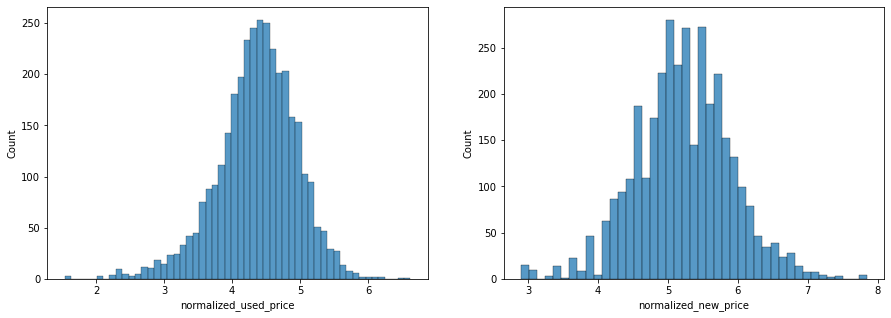

In [15]:
fig=plt.figure()

fig.add_subplot(1,2,1)
sns.histplot(data=cell,x=cell['normalized_used_price'])

fig.add_subplot(1,2,2)
sns.histplot(data=cell,x=cell['normalized_new_price']);

plt.gcf().set_size_inches(15,5)


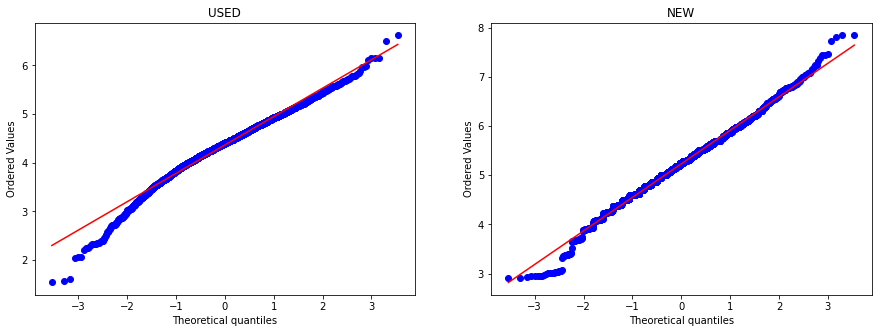

In [16]:
fig = plt.figure()

fig.add_subplot(1, 2, 1)
stats.probplot(cell['normalized_used_price'],dist='norm',plot=pylab)
plt.title('USED')

fig.add_subplot(1, 2, 2)
stats.probplot(cell['normalized_new_price'],dist='norm',plot=pylab)
plt.title('NEW')

plt.gcf().set_size_inches(15,5)

### It seems both of these price data columns are indeed normally distributed (enough to use them as normal).
    My early guess would be that these columns are both z-scores of the original prices offset so no values are negative.
    I did these first to simply confirm what was implied by the names of the columns.
    
    There are no missing values in either column.
---
## 2) Brand_Name

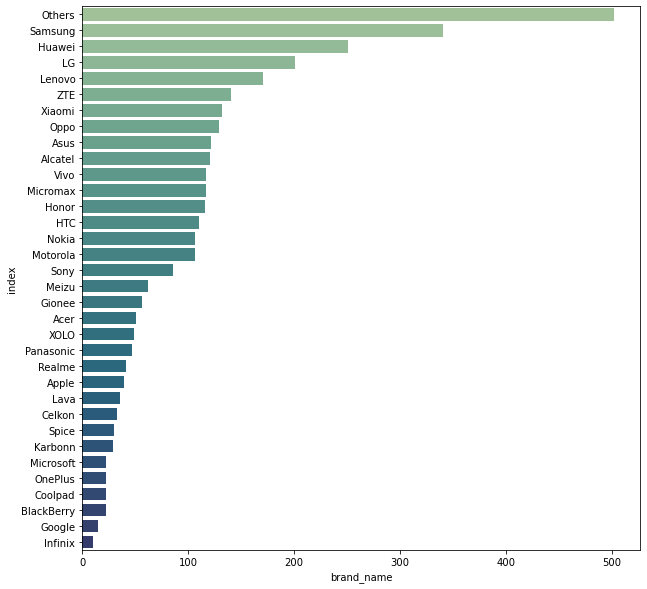

In [17]:
sns.barplot(data=cell['brand_name'].value_counts().reset_index(),y='index',x='brand_name',order=
           cell['brand_name'].value_counts().reset_index()['index'],palette='crest')
plt.gcf().set_size_inches(10,10)

### As previously stated, Apple has a much lower count in brand_name than expected. I'm curious to see the results of the bivariate analysis later.
    There are no missing values.
---
## 3) OS

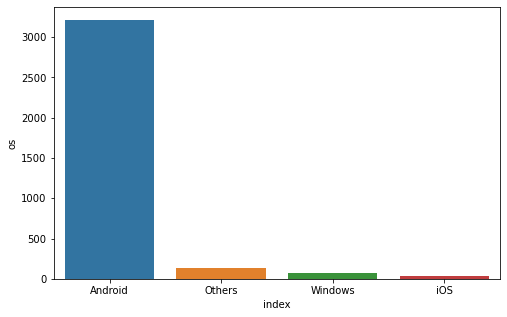

In [18]:
sns.barplot(data=cell['os'].value_counts().reset_index(),y='os',x='index',order=
            cell['os'].value_counts().reset_index()['index'])
plt.gcf().set_size_inches(8,5)

### Not much to see here that we haven't already covered. Android is the #1 OS here and iOS is greatly under-represented.
    This is likely because of the location of data sampling. This could be a global data sample.
    A quick Google search shows Apple phones occupied a majority of the American market in 2021.
    
    There are no missing values.

In [19]:
print('The percentage of Android devices in this market is {}%.'.format(round(100*cell[cell['os']=='Android'].shape[0]/cell.shape[0],2)))

The percentage of Android devices in this market is 93.05%.


---
## 4) Screen_Size

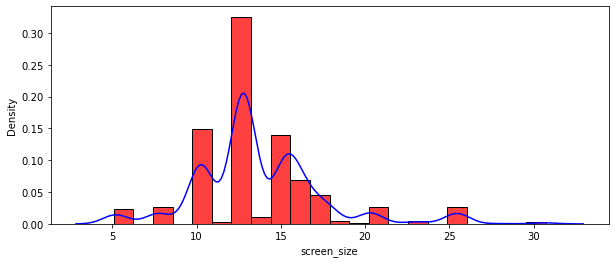

In [20]:
sns.histplot(data=cell,x='screen_size',stat='density',color='r',bins=22)
sns.kdeplot(data=cell,x='screen_size',color='blue')
plt.gcf().set_size_inches(10,4)

#this is the first candidate for binning.
#I want to find a good metric to distinguish between phone-sized devices and tablet-sized devices.

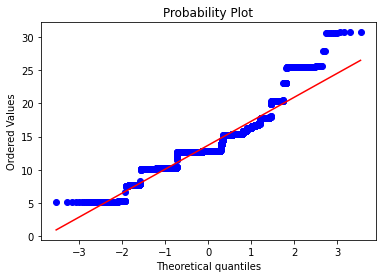

In [21]:
stats.probplot(cell['screen_size'],dist='norm',plot=pylab);
#Quick Q-Q plot

In [22]:
cell[['screen_size']].describe()

screen_size
count   3454.00000
mean      13.71312
std        3.80528
min        5.08000
25%       12.70000
50%       12.83000
75%       15.34000
max       30.71000

In [23]:
cell['screen_size'].isnull().sum()

0

### The screen_size data is right-skewed, with a mean of 13.7 and a median of 12.8. It is close to being normal, but it is not quite there.
### There are tablets mixed into this data. Generally, the maximum size of a phone screen would be around 16cm, and that would be a big phone. Anything larger would be a small tablet like an Ipad Mini.

### For now, we'll keep this in mind and move on. Weight may be another way to determine whether the device is a phone or a tablet.
    There are no missing values.
---
## 5) 4G and 5G

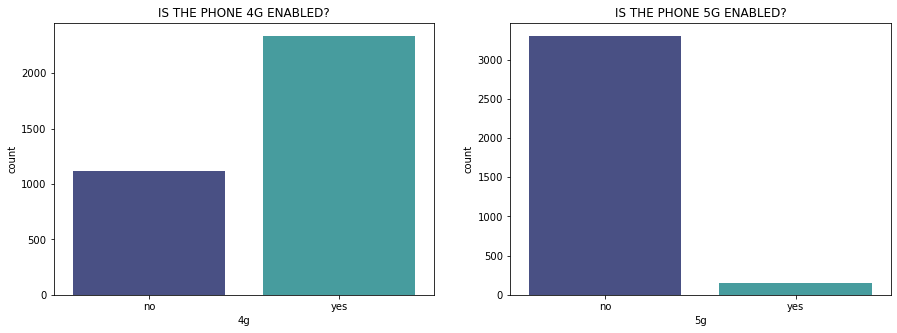

In [24]:
fig=plt.figure()

fig.add_subplot(1,2,1)
sns.countplot(data=cell,x=cell['4g'],palette='mako')
plt.title('IS THE PHONE 4G ENABLED?')

fig.add_subplot(1,2,2)
sns.countplot(data=cell,x=cell['5g'],palette='mako')
plt.title('IS THE PHONE 5G ENABLED?')

plt.gcf().set_size_inches(15,5)

### Not much to talk about here in Univariate analysis. I will have more to say in Bivariate about these two, as well as a way to connect these categories when I make dummy columns.
    There are about a third of devices that do not support 4G.
    About 4.5% of devices support 5G.
    
    There are no missing values.
---
## 6) Main_Camera_MP and Selfie_Camera_MP

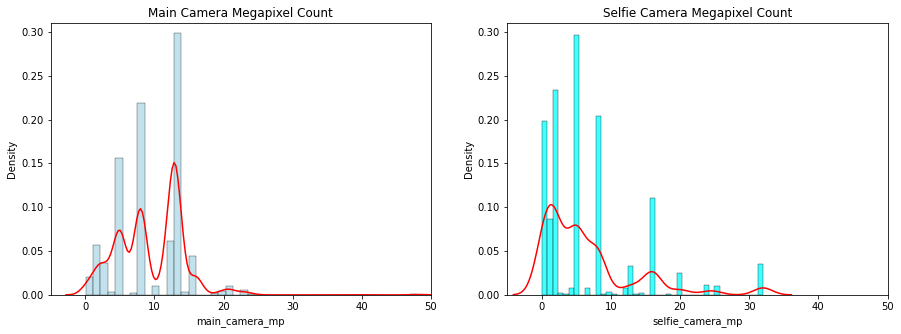

In [25]:
fig=plt.figure()

fig.add_subplot(1,2,1)
sns.histplot(data=cell,x=cell['main_camera_mp'],stat='density',color='lightblue')
sns.kdeplot(data=cell,x=cell['main_camera_mp'],color='r')
plt.xlim(-5,50)
plt.ylim(0, 0.31)
plt.title('Main Camera Megapixel Count')

fig.add_subplot(1,2,2)
sns.histplot(data=cell,x=cell['selfie_camera_mp'],stat='density',color='cyan')
sns.kdeplot(data=cell,x=cell['selfie_camera_mp'],color='r')
plt.xlim(-5,50)
plt.ylim(0, 0.31)
plt.title('Selfie Camera Megapixel Count')

plt.gcf().set_size_inches(15,5)

In [26]:
cell[['main_camera_mp','selfie_camera_mp']].describe()

main_camera_mp  selfie_camera_mp
count      3275.00000        3452.00000
mean          9.46021           6.55423
std           4.81546           6.97037
min           0.08000           0.00000
25%           5.00000           2.00000
50%           8.00000           5.00000
75%          13.00000           8.00000
max          48.00000          32.00000

### There is a bit more to go over with these columns in Univariate since they are numerical with NaN values.
#### We should compare some of the information between these columns while we have both sets of data in front of us.
    Main Camera MP has outliers that are higher than Selfie Camera's highest outliers.
    Main Camera MP also has higher mean and median than Selfie Camera, and a lower standard deviation.
    Both are right skewed, with higher means than medians.
    Generally speaking, main cameras are on average higher fidelity.
    
#### We'll save any ideas about correlation for Bivariate Analysis.

### A quick check on the NaN values of both columns:

In [27]:
print('The amount of NaNs in main camera MP is {}.'.format(cell['main_camera_mp'].isnull().sum()))

cell[cell['main_camera_mp'].isnull()].sample(5,random_state=1)

The amount of NaNs in main camera MP is 179.


brand_name       os  screen_size   4g   5g  main_camera_mp  \
3263     Realme  Android     15.39000  yes   no             NaN   
1786      Meizu  Android     15.29000  yes   no             NaN   
3223      Meizu  Android     15.39000  yes  yes             NaN   
3391       Oppo  Android     15.37000  yes  yes             NaN   
161        Vivo  Android     17.50000  yes  yes             NaN   

      selfie_camera_mp  int_memory      ram    battery    weight  \
3263           8.00000    64.00000  6.00000 4300.00000 202.00000   
1786          20.00000    64.00000  4.00000 4000.00000 170.00000   
3223          20.00000   128.00000  8.00000 4500.00000 219.00000   
3391          32.00000   256.00000 12.00000 4025.00000 171.00000   
161           16.00000   256.00000  8.00000 4500.00000 219.50000   

      release_year  days_used  normalized_used_price  normalized_new_price  
3263          2020        347                4.41860               5.35493  
1786          2019        295                4.85468               5.29611  
3223          2020        261                4.82213               6.39708  
3391          2020        348                5.63032               6.23274  
161           2020        226                5.46688               6.44729

In [28]:
print('The amount of NaNs in selfie camera MP is {}. Additionally, the only brand this applies to is Google.'.format(cell['selfie_camera_mp'].isnull().sum()))

cell[cell['selfie_camera_mp'].isnull()].head()

The amount of NaNs in selfie camera MP is 2. Additionally, the only brand this applies to is Google.


brand_name       os  screen_size   4g  5g  main_camera_mp  \
1080     Google  Android     15.32000  yes  no        12.20000   
1081     Google  Android     12.83000  yes  no        12.20000   

      selfie_camera_mp  int_memory     ram    battery    weight  release_year  \
1080               NaN    64.00000 4.00000 3430.00000 184.00000          2018   
1081               NaN    64.00000 4.00000 2915.00000 148.00000          2018   

      days_used  normalized_used_price  normalized_new_price  
1080        475                5.57383               6.86597  
1081        424                4.46499               6.74508

### Quick check on Google devices (dips into Bivariate, but I believe the best time to check this is now):

In [29]:
cell[cell['brand_name']=='Google'].shape

(15, 15)

### There are only 15 Google devices in our data, and 2 of them do not have data for the selfie camera. This may be useful later.
### One last check, I want to see the Modes for both columns.

In [30]:
print(f'The mode for Main_Camera_MP is {np.array(cell["main_camera_mp"].mode())[0]}, and the mode for Selfie_Camera_MP is {np.array(cell["selfie_camera_mp"].mode())[0]}.')

The mode for Main_Camera_MP is 13.0, and the mode for Selfie_Camera_MP is 5.0.


### Most Main Cameras have 13 megapixels, and most Selfie Cameras have 5 megapixels.
---
## 7) INT_MEMORY and RAM
    Warning: much longer section

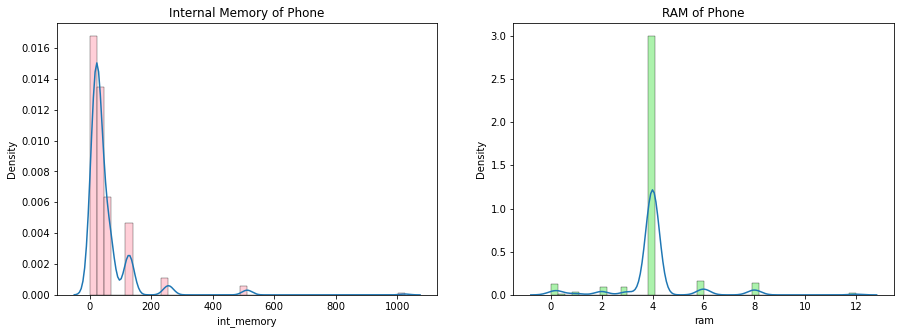

In [31]:
fig=plt.figure()

fig.add_subplot(1,2,1)
sns.histplot(data=cell,x=cell['int_memory'],stat='density',color='pink',bins=44)
sns.kdeplot(data=cell,x='int_memory')
plt.title('Internal Memory of Phone')

fig.add_subplot(1,2,2)
sns.histplot(data=cell,x=cell['ram'],stat='density',color='lightgreen',bins=44)
sns.kdeplot(data=cell,x='ram')
plt.title('RAM of Phone')

plt.gcf().set_size_inches(15,5)

#Both are right skewed, RAM is less skewed than int_memory. These will need transformation in the preprocessing section.

In [32]:
cell[['int_memory','ram']].describe()

# Interesting to note, RAM's IQR is entirely made up of 4GB values.

int_memory        ram
count  3450.00000 3450.00000
mean     54.57310    4.03612
std      84.97237    1.36510
min       0.01000    0.02000
25%      16.00000    4.00000
50%      32.00000    4.00000
75%      64.00000    4.00000
max    1024.00000   12.00000

In [33]:
print(f"The Mode of Int_Memory is {cell[['int_memory','ram']].mode().iloc[0,0]} and the Mode of RAM is {cell[['int_memory','ram']].mode().iloc[0,1]}.")

The Mode of Int_Memory is 16.0 and the Mode of RAM is 4.0.


### Something to point out right away:
### int_memory is defined as the "ROM" of a phone in this project. While ROM has become synonymous with 'internal storage' in modern lingo, ROM is Read-Only Memory, which is <i>never</i> 1024GB in a phone.
    ROM is usually used to store the instructions for the OS and boot operations,
    along with other stuff regular users can't overwrite. This is why your 128GB phone
    actually only comes with something like 118GB of storage, 10GB is partitioned as ROM
    to deal with OS activities that if the user overwrote, may brick the phone.
    
### If going by the original definition of ROM, this data makes zero sense, but if using the more loose modern interpretation, we can take internal memory as 'storage' (and hope all of the brands report ROM incorrectly). 
### I will be renaming this column to 'storage' for less confusion and easier typing.

In [34]:
cell.rename(columns={'int_memory':'storage'},inplace=True)
cell.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android     14.50000  yes   no        13.00000   
1      Honor  Android     17.30000  yes  yes        13.00000   
2      Honor  Android     16.69000  yes  yes        13.00000   
3      Honor  Android     25.50000  yes  yes        13.00000   
4      Honor  Android     15.32000  yes   no        13.00000   

   selfie_camera_mp   storage     ram    battery    weight  release_year  \
0           5.00000  64.00000 3.00000 3020.00000 146.00000          2020   
1          16.00000 128.00000 8.00000 4300.00000 213.00000          2020   
2           8.00000 128.00000 8.00000 4200.00000 213.00000          2020   
3           8.00000  64.00000 6.00000 7250.00000 480.00000          2020   
4           8.00000  64.00000 3.00000 5000.00000 185.00000          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127                4.30757               4.71510  
1        325                5.16210               5.51902  
2        162                5.11108               5.88463  
3        345                5.13539               5.63096  
4        293                4.38999               4.94784

### Next, the mode for RAM (4GB) is far beyond any other option. There are 4.4x as many 4GB devices as all other options combined, actually.

In [35]:
print(f"There are {round(cell[cell['ram']==4].shape[0]/cell[cell['ram']!=4].shape[0],1)}x more 4GB devices than any other option combined.")

# cell[cell['ram']==4].shape[0] = 2815 phones with 4GB of RAM
# cell[cell['ram']!=4].shape[0] = 639 phones with anything but 4GB of RAM
# 2815/639 = ~4.4

There are 4.4x more 4GB devices than any other option combined.


### Checking for NaN values.

In [36]:
cell[cell['storage'].isnull()]

brand_name      os  screen_size   4g  5g  main_camera_mp  \
117       Nokia  Others      5.18000  yes  no         0.30000   
2035      Nokia  Others      5.18000   no  no         5.00000   
2064      Nokia  Others      5.18000   no  no         0.30000   
2092      Nokia  Others      7.62000   no  no         5.00000   

      selfie_camera_mp  storage     ram    battery    weight  release_year  \
117            0.00000      NaN 0.02000 1200.00000  86.50000          2019   
2035           0.00000      NaN 0.03000 1020.00000 157.00000          2019   
2064           0.00000      NaN 0.02000 1100.00000  78.40000          2015   
2092           0.00000      NaN 0.02000 1010.00000 100.00000          2013   

      days_used  normalized_used_price  normalized_new_price  
117         234                2.72130               3.68838  
2035        501                2.34373               3.42035  
2064        559                2.58701               3.37861  
2092       1043                3.53573               4.37059

In [37]:
cell[cell['ram'].isnull()]

brand_name      os  screen_size  4g  5g  main_camera_mp  \
114       Nokia  Others      5.18000  no  no         0.30000   
335       Nokia  Others      5.18000  no  no         0.30000   
2059      Nokia  Others      5.18000  no  no         0.30000   
2090      Nokia  Others      7.62000  no  no         5.00000   

      selfie_camera_mp  storage  ram    battery    weight  release_year  \
114            0.00000  0.06000  NaN 1020.00000  91.30000          2020   
335            0.00000  0.10000  NaN 1200.00000  88.20000          2020   
2059           0.00000  0.06000  NaN        NaN  82.60000          2016   
2090           0.00000  0.06000  NaN 1200.00000 111.40000          2013   

      days_used  normalized_used_price  normalized_new_price  
114         288                2.72916               2.91126  
335         327                3.06292               3.68913  
2059       1023                2.76506               3.65790  
2090       1001                3.82777               4.60577

### Something extremely important to note here, is both columns' NaN values fall under the Nokia brand.
### As well as this, Nokia tablets and phones are generally a memory outlier, their storage and ram tends to be much lower on average.
    Nokia storage & ram averages are both ~1/2 of the rest of the brands' averages.
    Q1 Nokia storage is 0.1GB, while Q1 for the rest of the brands is 16GB.
### See below:

In [38]:
NokiaStuff=cell[cell['brand_name']=='Nokia'][['storage','ram']].describe()
NokiaStuff.rename(columns={'storage':'Nokia_Storage','ram':'Nokia_RAM'},inplace=True)
NokiaStuff['Non-Nokia_Storage']=cell[cell['brand_name']!='Nokia'][['storage','ram']].describe()['storage']
NokiaStuff['Non-Nokia_RAM']=cell[cell['brand_name']!='Nokia'][['storage','ram']].describe()['ram']
NokiaStuff

Nokia_Storage  Nokia_RAM  Non-Nokia_Storage  Non-Nokia_RAM
count      102.00000  102.00000         3348.00000     3348.00000
mean        25.59588    2.42029           55.45592        4.08535
std         29.09442    1.88933           85.95598        1.31552
min          0.06000    0.02000            0.01000        0.25000
25%          0.10000    0.03000           16.00000        4.00000
50%         16.00000    4.00000           32.00000        4.00000
75%         32.00000    4.00000           64.00000        4.00000
max        128.00000    6.00000         1024.00000       12.00000

In [39]:
del NokiaStuff


---

## 8) Battery

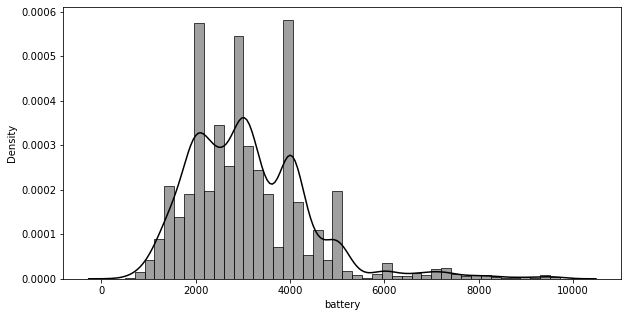

In [40]:
sns.histplot(data=cell,x=cell['battery'],stat='density',color='gray',bins=44)
sns.kdeplot(data=cell,x=cell['battery'],color='black')
plt.gcf().set_size_inches(10,5)

In [41]:
cell[['battery']].describe()

battery
count 3448.00000
mean  3133.40270
std   1299.68284
min    500.00000
25%   2100.00000
50%   3000.00000
75%   4000.00000
max   9720.00000

In [42]:
cell['battery'].mode()

0   4000.00000
dtype: float64

### The battery is a simple univariate analysis target. The mode is 4000 mAh, mean is ~3133, and the median is 3000.
### Like we've seen previously, this is another right-skewed data column.
### <sup>Many outliers tend to be higher, which makes sense as devices with more battery, storage, and ram tend to be rarer and more expensive.</sup>

In [43]:
cell[cell['battery'].isnull()]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
1829      Meizu  Android     12.83000  yes  no        13.00000   
1831      Meizu  Android     12.83000  yes  no        20.70000   
1832      Meizu  Android     13.61000  yes  no        20.70000   
1962  Microsoft  Windows     25.55000   no  no         5.00000   
2058      Nokia   Others      5.18000   no  no         0.30000   
2059      Nokia   Others      5.18000   no  no         0.30000   

      selfie_camera_mp  storage     ram  battery    weight  release_year  \
1829           5.00000 16.00000 4.00000      NaN 145.00000          2014   
1831           5.00000 16.00000 4.00000      NaN 158.00000          2014   
1832           2.00000 16.00000 4.00000      NaN 147.00000          2014   
1962           3.50000 32.00000 4.00000      NaN 675.90000          2013   
2058           0.00000  0.06000 0.02000      NaN  81.00000          2016   
2059           0.00000  0.06000     NaN      NaN  82.60000          2016   

      days_used  normalized_used_price  normalized_new_price  
1829        986                4.17792               4.86360  
1831       1043                4.87885               5.99064  
1832       1007                4.74232               5.82612  
1962        931                5.23057               5.80275  
2058        815                2.71866               3.37451  
2059       1023                2.76506               3.65790

### There is no clear pattern to the missing values as of right now. Multiple brands, screen sizes (one may be a tablet), and a wide spread of prices.
    One thing to note is a single row under Nokia has missing RAM and battery.
    It is very similar to the Nokia row above it, but that row has its ram at 0.02.
---
## 9) Weight
    Another long univariate analysis

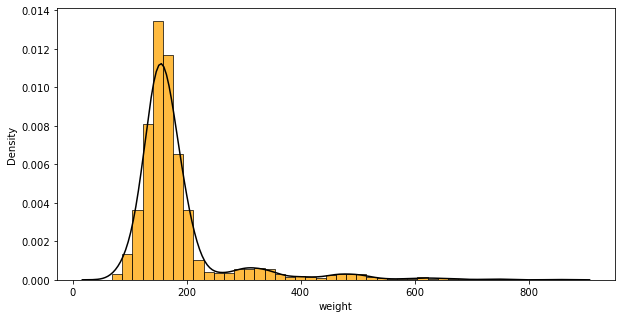

In [44]:
sns.histplot(data=cell,x=cell['weight'],stat='density',color='orange',bins=44)
sns.kdeplot(data=cell,x=cell['weight'],color='blacK')
plt.gcf().set_size_inches(10,5)

#another possible target for transformation.
#I will also be trying to cut this into phone-tablet bins, or at least cut this into much smaller categories.

In [45]:
cell[['weight']].describe()

weight
count 3447.00000
mean   182.75187
std     88.41323
min     69.00000
25%    142.00000
50%    160.00000
75%    185.00000
max    855.00000

In [46]:
cell['weight'].mode()

0   150.00000
dtype: float64

### Mode is 150 grams, mean is ~183 grams, and median is 160 grams. Another right-skewed plot.
### However, I am a little surprised about the low amount of heavy devices. There are tablets mixed in with this data.
### Let's look into the heavier devices to try and find a group of tablets.
    I'll be using 1.5xIQR for outliers.

In [47]:
cell[cell['weight']>185+(1.5*(185-142))].describe().T 

count       mean        std        min        25%  \
screen_size           365.00000   21.08838    3.99838    5.18000   17.78000   
main_camera_mp        364.00000    5.96566    3.66057    0.30000    3.15000   
selfie_camera_mp      365.00000    2.86507    3.01895    0.30000    1.20000   
storage               365.00000   43.25479   95.71003    4.00000   16.00000   
ram                   365.00000    3.89178    1.05152    0.50000    4.00000   
battery               364.00000 4995.75687 1868.67375 1200.00000 3822.50000   
weight                365.00000  399.23699  121.64231  250.00000  305.00000   
release_year          365.00000 2015.27671    2.18954 2013.00000 2014.00000   
days_used             365.00000  723.70959  227.68382  129.00000  584.00000   
normalized_used_price 365.00000    4.65617    0.44527    2.38324    4.35799   
normalized_new_price  365.00000    5.40093    0.63804    2.94969    4.95857   

                             50%        75%        max  
screen_size             20.32000   25.43000   30.71000  
main_camera_mp           5.00000    8.00000   16.30000  
selfie_camera_mp         2.00000    5.00000   20.00000  
storage                 32.00000   32.00000 1024.00000  
ram                      4.00000    4.00000   12.00000  
battery               4500.00000 6400.00000 9720.00000  
weight                 350.00000  475.00000  855.00000  
release_year          2014.00000 2017.00000 2020.00000  
days_used              727.00000  910.00000 1090.00000  
normalized_used_price    4.62840    4.93706    6.50045  
normalized_new_price     5.39585    5.77116    7.84784

### Unfortunately, even using Weight Q3+1.5xIQR doesn't guarantee us a tablet-sized device. The minimum screen size is 5.18 cm across.

In [48]:
# Just for future reference:
cell[cell['weight']<142-(1.5*(185-142))]
# Outliers on the low end are VERY sparse. They're all likely phones due to the small screen sizes.

brand_name       os  screen_size  4g  5g  main_camera_mp  \
898      Others   Others      5.08000  no  no         1.30000   
1437    Karbonn  Android     10.16000  no  no         3.15000   
2533    Samsung   Others      5.08000  no  no         8.00000   

      selfie_camera_mp   storage     ram    battery   weight  release_year  \
898            0.30000  64.00000 0.25000  620.00000 69.00000          2013   
1437           0.30000 256.00000 0.25000 1625.00000 75.00000          2013   
2533           2.00000  16.00000 4.00000  800.00000 75.00000          2014   

      days_used  normalized_used_price  normalized_new_price  
898         990                2.23645               3.00717  
1437        863                4.12423               4.26507  
2533        990                2.05284               3.05730

### Before we move on, let's check for null values.

In [49]:
cell[cell['weight'].isnull()]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3002       XOLO  Android     12.70000  yes  no        13.00000   
3003       XOLO  Android     12.83000  yes  no         8.00000   
3004       XOLO  Android     12.70000   no  no         8.00000   
3005       XOLO  Android     10.29000   no  no         5.00000   
3006       XOLO  Android     12.70000   no  no         5.00000   
3007       XOLO  Windows     12.70000   no  no         8.00000   
3008       XOLO  Android     12.70000   no  no         8.00000   

      selfie_camera_mp  storage     ram    battery  weight  release_year  \
3002           5.00000 32.00000 4.00000 2400.00000     NaN          2015   
3003           5.00000 16.00000 4.00000 3200.00000     NaN          2015   
3004           2.00000 32.00000 4.00000 2100.00000     NaN          2015   
3005           0.30000 32.00000 4.00000 1800.00000     NaN          2015   
3006           0.30000 16.00000 4.00000 2500.00000     NaN          2015   
3007           2.00000 32.00000 4.00000 2200.00000     NaN          2015   
3008           5.00000 32.00000 4.00000 2500.00000     NaN          2015   

      days_used  normalized_used_price  normalized_new_price  
3002        576                4.16589               4.93044  
3003        800                4.28207               5.18923  
3004        878                3.87971               4.08109  
3005       1036                3.82385               4.39605  
3006        679                3.83708               4.34718  
3007        838                3.70721               4.79173  
3008       1045                4.18464               4.78541

### They're all under a brand XOLO. Let's quickly check this brand for more information.

In [50]:
cell[cell['brand_name']=='XOLO'].describe().T

count       mean       std        min        25%  \
screen_size           49.00000   11.92612   2.25086    7.75000   10.29000   
main_camera_mp        49.00000    7.45510   3.02592    2.00000    5.00000   
selfie_camera_mp      49.00000    1.71837   1.63241    0.30000    0.30000   
storage               49.00000   22.20408   7.87660   16.00000   16.00000   
ram                   49.00000    4.00000   0.00000    4.00000    4.00000   
battery               49.00000 2220.00000 679.58934 1400.00000 1800.00000   
weight                42.00000  151.01905  69.19768  100.00000  120.00000   
release_year          49.00000 2013.65306   0.72316 2013.00000 2013.00000   
days_used             49.00000  823.24490 174.07261  551.00000  670.00000   
normalized_used_price 49.00000    3.93150   0.31387    3.34463    3.69013   
normalized_new_price  49.00000    4.82262   0.32617    4.08109    4.60846   

                             50%        75%        max  
screen_size             12.70000   12.70000   20.32000  
main_camera_mp           8.00000    8.00000   13.00000  
selfie_camera_mp         1.30000    2.00000    5.00000  
storage                 16.00000   32.00000   32.00000  
ram                      4.00000    4.00000    4.00000  
battery               2100.00000 2500.00000 4100.00000  
weight                 126.00000  148.85000  480.00000  
release_year          2014.00000 2014.00000 2015.00000  
days_used              842.00000  982.00000 1089.00000  
normalized_used_price    3.93711    4.18464    4.63628  
normalized_new_price     4.79521    5.08376    5.59646

### With a 20.3cm screen size max, they do seem to make tablets. However, all of the missing weights occur with 12cm screens or lower, which generally belong to phone sized devices. Average weight is ~151g.
### I'll quickly plot this data to check for large gaps where it's obvious which XOLO devices are tablets.

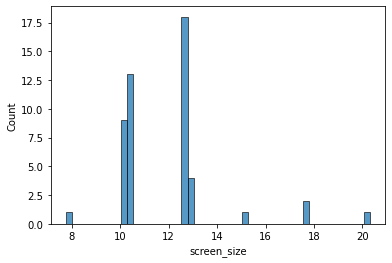

In [51]:
sns.histplot(data=cell[cell['brand_name']=='XOLO'],x='screen_size',bins=50);

In [52]:
cell[cell['brand_name']=='XOLO'][cell[cell['brand_name']=='XOLO']['screen_size']>14]

# Above 14cm, there are only 4 devices. We'll check the stats of all of them.

brand_name       os  screen_size  4g  5g  main_camera_mp  \
3022       XOLO  Android     15.24000  no  no         8.00000   
3030       XOLO  Android     17.78000  no  no         5.00000   
3039       XOLO  Android     17.78000  no  no         2.00000   
3040       XOLO  Android     20.32000  no  no         2.00000   

      selfie_camera_mp  storage     ram    battery    weight  release_year  \
3022           2.00000 16.00000 4.00000 3000.00000 120.00000          2014   
3030           0.30000 16.00000 4.00000 4100.00000 320.00000          2013   
3039           0.65000 32.00000 4.00000 4000.00000 338.00000          2013   
3040           0.30000 16.00000 4.00000 4000.00000 480.00000          2013   

      days_used  normalized_used_price  normalized_new_price  
3022        865                4.22552               5.13291  
3030        686                4.20767               5.24069  
3039       1039                4.27500               4.69199  
3040       1004                4.37789               4.78491

### The last 3 devices have a much higher weight and battery than the 15.24cm screen XOLO device, implying these 3 are the only XOLO tablets.
### Since it appears the 15cm device is either a very light tablet or a very large phone, we can safely say the null weight values with 10-12cm sized screens are phones.
### This will be used later when filling in the null values in preprocessing, I will be ignoring the XOLO tablet weights when considering replacement weights.

---

## 10) Release_Year

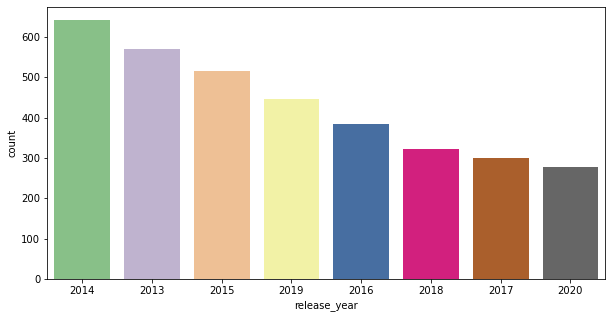

In [53]:
#changing the dtype to category temporarily because the bins do not line up as well in a histplot.
sns.countplot(data=cell[['release_year']].astype('category'),x='release_year',palette='Accent',order=
              cell['release_year'].value_counts().reset_index().sort_values('release_year',ascending=False)['index']);
plt.gcf().set_size_inches(10,5)

In [54]:
cell['release_year'].isnull().sum()

0

### The largest count of phones in the used space is from release year 2014. It makes sense that 2020 (the last complete year for the data at the time of collection) would have the fewest used phones in the market.
    There are no missing values.


---
## 11) Days_Used

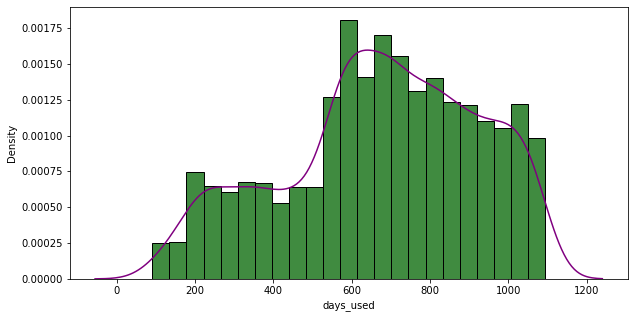

In [55]:
sns.histplot(data=cell,x=cell['days_used'],stat='density',color='darkgreen')
sns.kdeplot(data=cell,x=cell['days_used'],color='purple')
plt.gcf().set_size_inches(10,5)

In [56]:
cell[['days_used']].describe()

days_used
count 3454.00000
mean   674.86972
std    248.58017
min     91.00000
25%    533.50000
50%    690.50000
75%    868.75000
max   1094.00000

In [57]:
cell['days_used'].isnull().sum()

0

### A very rare left-skewed column. This means that more used devices on the market are older rather than newer, which makes sense when considering the popularity of 2014 phones and tablets.
    I would speculate an insanely high correlation between days used and release year.
    
    There are no null values.

---
---
---
# Bivariate/Multivariate Analysis
### Correlations I'm looking out for going into Bivariate Analysis:
Used vs New Price  (0.83 corr)  
Screen Size vs Weight  (0.83 corr)  
4G vs 5G  
Main Cam vs Selfie Cam  (0.43 corr)  
Storage vs RAM  (0.12 corr, very low, surprisingly)  
Battery vs Weight  (0.70 corr)  
Release Year vs Days Used  (-0.75 corr)  
### Correlations I didn't expect from the heatmap:
Screen Size vs Battery (0.81 corr, intuitive but I didn't consider it)  
Screen Size vs Used Price & New Price (0.61 corr & 0.46 corr)  
Selfie Cam vs Release Year (0.69 corr, especially crazy compared to the very low 0.35 for Main cam vs Release Year)  
Selfie Cam vs Days Used (-0.55 corr, probably related to Release Year)  
Selfie Cam vs RAM (0.48 corr)  
Main Cam and Selfie Cam vs Prices (from 0.48 to 0.61 corr)  
Storage has horrible correlation with EVERYTHING! Guess everyone uses SD cards...   
RAM vs Prices (0.52 used & 0.53 new corr)   
Battery vs Release Year (0.49 corr, intuitive but didn't consider it)  
Battery vs Prices (0.61 used 0.47 new corr)   
Release Year vs Used Price (0.51 corr, makes sense, newer = more relevant and higher price)  
Days Used has HORRIBLE correlation with everything except selfie cam and release year! It will likely be a redundant column. 



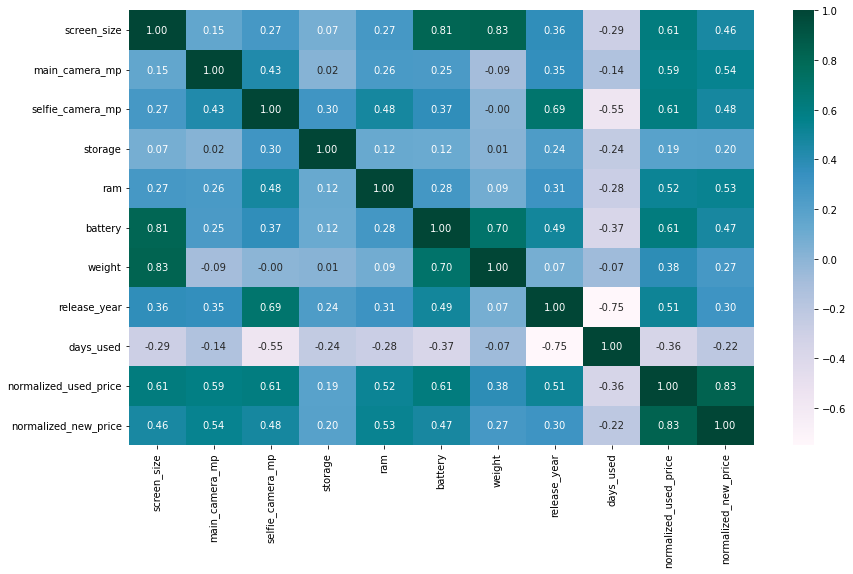

In [58]:
sns.heatmap(data=cell.corr(),annot=True,fmt='0.2f',cmap='PuBuGn')
plt.gcf().set_size_inches(14,8)

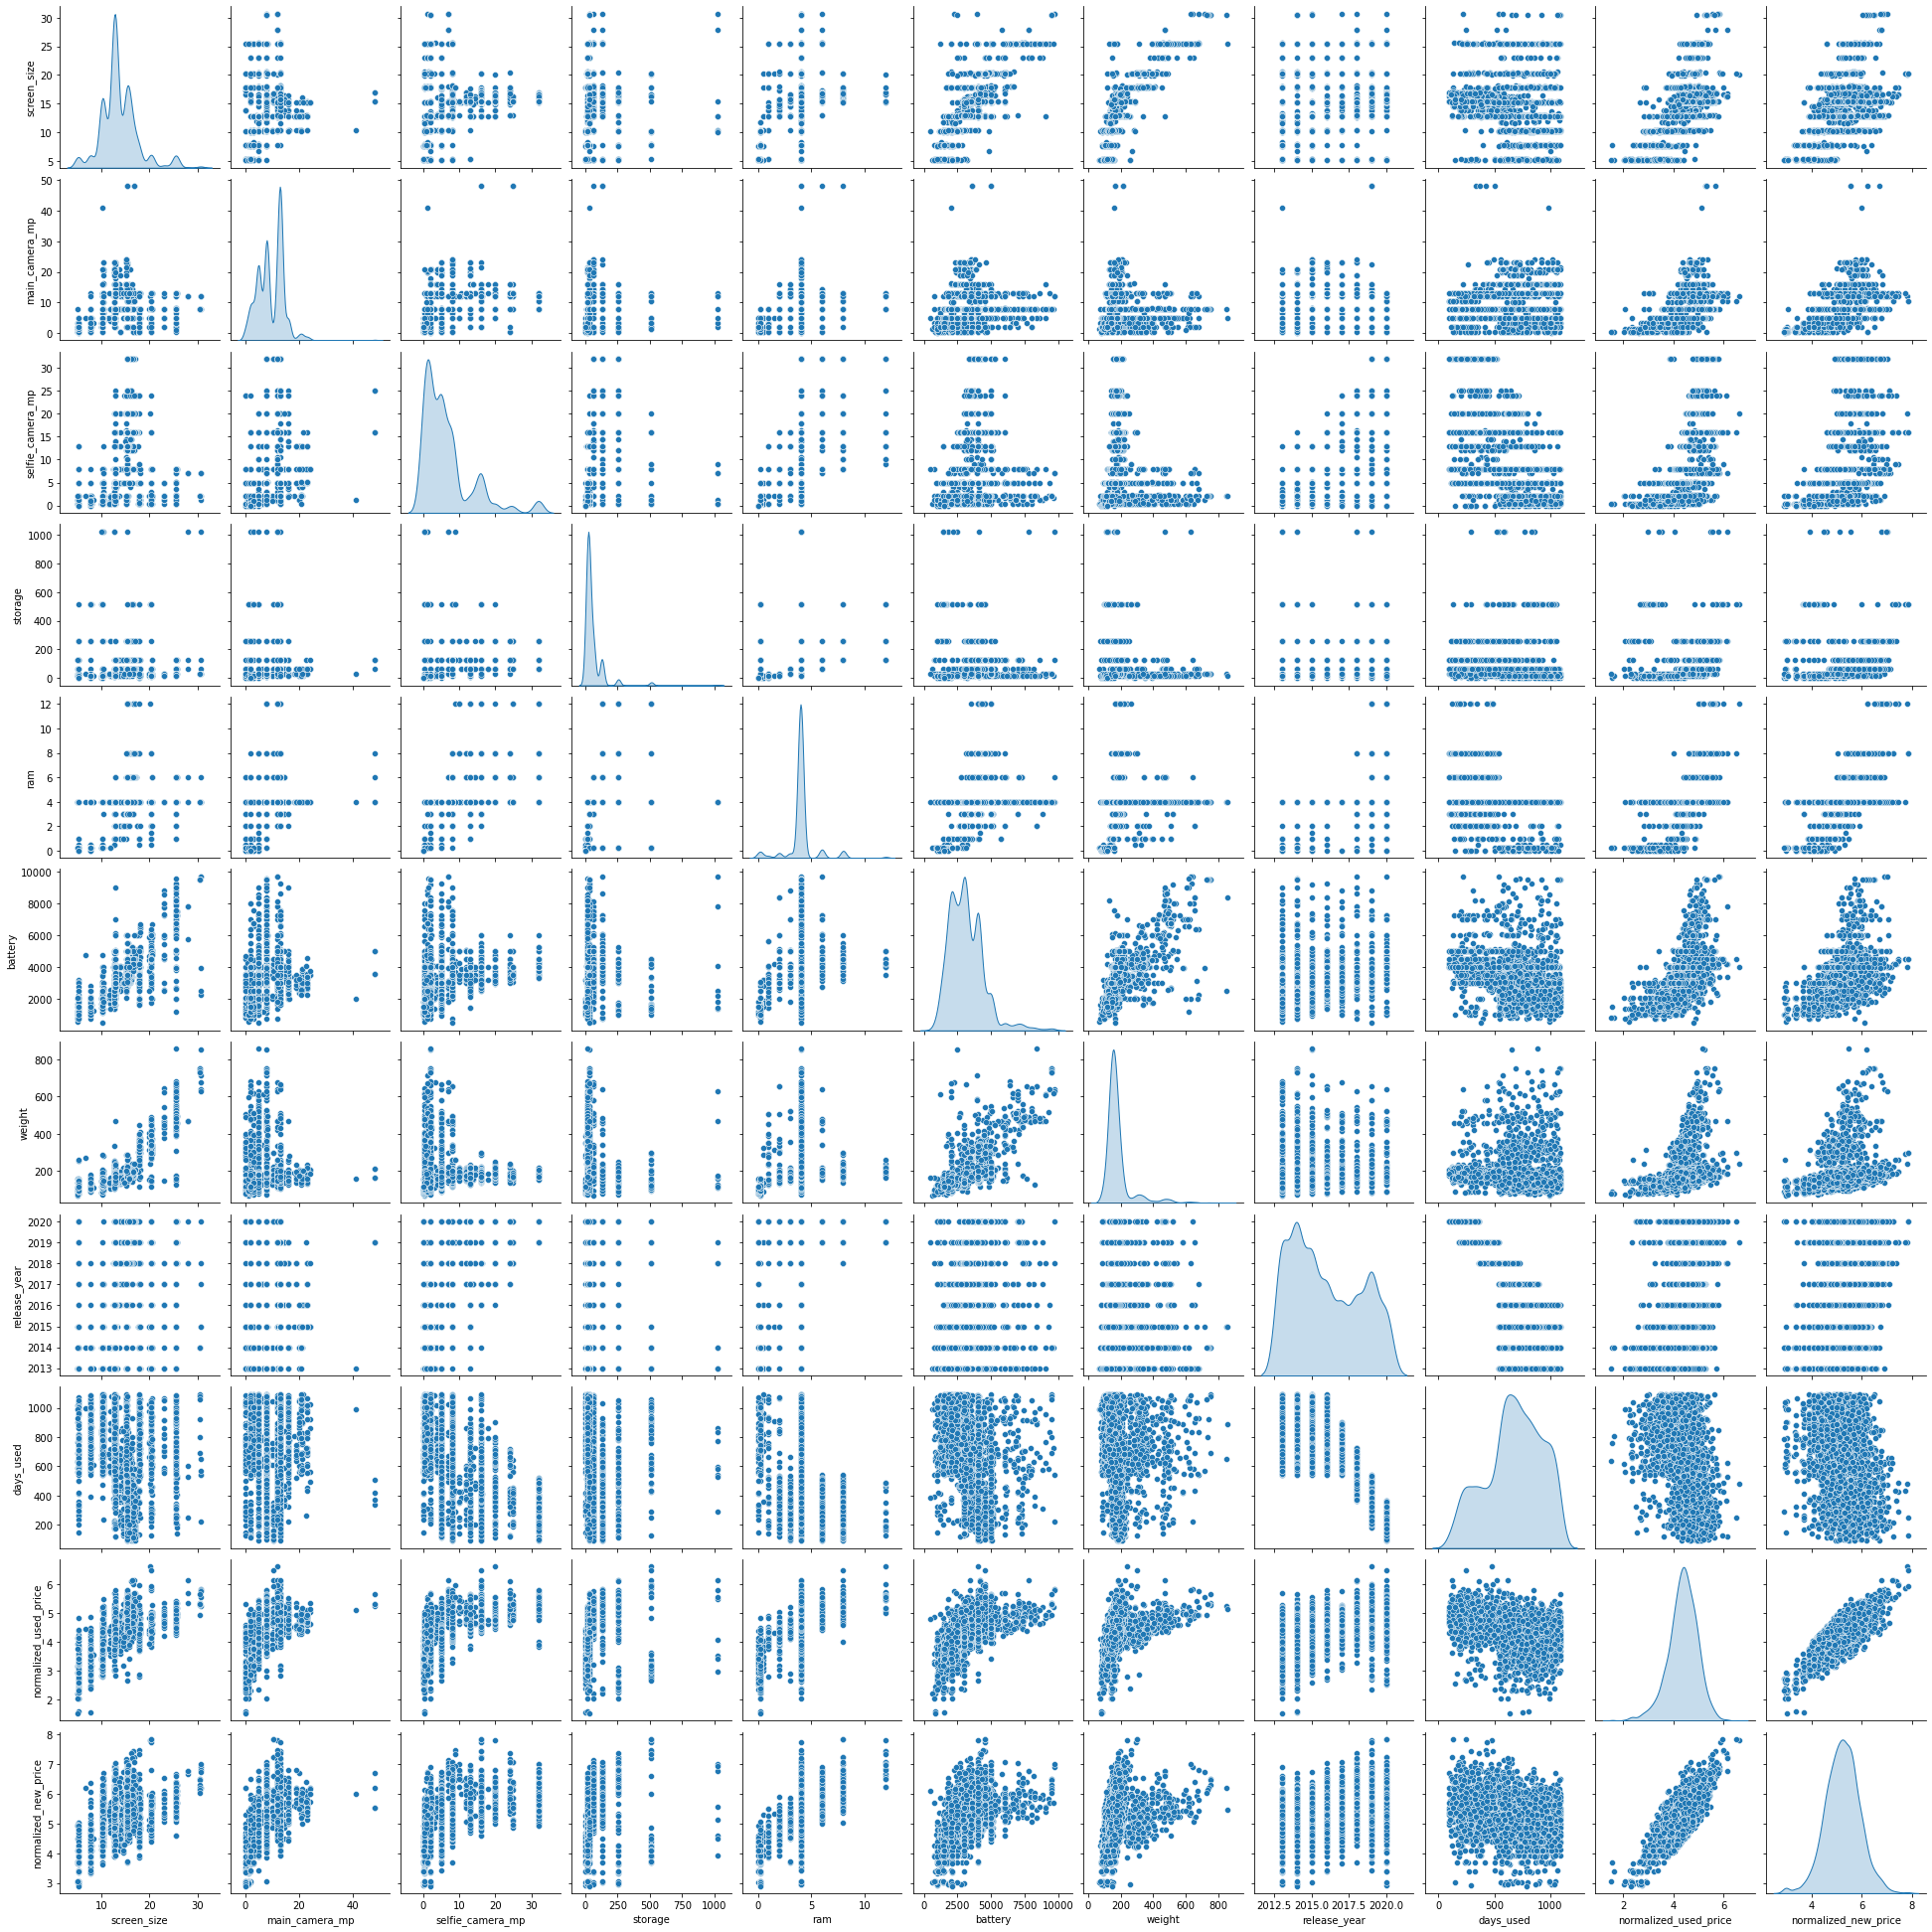

In [59]:
sns.pairplot(cell,diag_kind='kde');

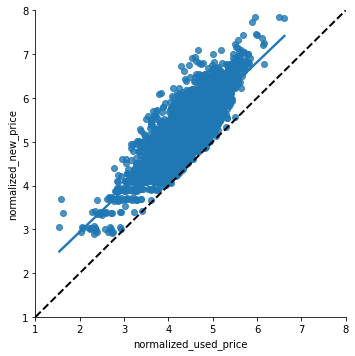

In [60]:
#The only plot in our pairplot with a close to y=x plot is New vs Used prices.
#Plotting this with lmplot and a y=x line for comparison.

sns.lmplot(data=cell,x='normalized_used_price',y='normalized_new_price')
plt.xlim(1,8)
plt.ylim(1,8)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=2, scalex=False, scaley=False);

### The closest we get to columns with the same data are normalized used and normalized new prices. However, the points are not clustered close enough, and one of the data points is our dependent variable.
    We are not dropping any columns from pairplot findings alone.

# I am going to start with all of the categorical variables.
---
# 1) Brand Name with all numericals
    For now, ignore the release_year. We will be doing a separate bivariate analysis between release_year and brand_name.

In [61]:
Brand=pd.DataFrame() #create a new dataframe, add the brand names as a column
Brand['brand_name']=(cell.groupby(['brand_name']).describe().reset_index()['brand_name'].copy())

# Next, add each of the numerical columns' medians and means from the groupby from cell.groupby([brand_name]).

for column in cell.describe().columns.drop('release_year'): #release_year mean and median will be useless to us
    for subcolumn in cell.describe().T.columns:
        if subcolumn=='mean':
            Brand[column+'_'+subcolumn]=(cell.groupby(['brand_name']).describe().reset_index()[column][subcolumn])
        elif subcolumn=='50%':
            Brand[column+'_median']=(cell.groupby(['brand_name']).describe().reset_index()[column][subcolumn])
Brand.head()

#The purpose of this is to get every numerical mean and median (minus release year) for each brand_name, for each column.
#See below.

brand_name  screen_size_mean  screen_size_median  main_camera_mp_mean  \
0        Acer          14.94961            12.83000              6.96765   
1     Alcatel          12.84793            12.70000              6.43223   
2       Apple          18.51026            18.01000              9.82051   
3        Asus          15.01090            12.83000             10.01822   
4  BlackBerry          10.81227            10.29000             10.33333   

   main_camera_mp_median  selfie_camera_mp_mean  selfie_camera_mp_median  \
0                5.00000                2.47451                  2.00000   
1                5.00000                2.29752                  1.30000   
2               12.00000                4.61538                  7.00000   
3               13.00000                4.54262                  5.00000   
4                8.00000                5.14091                  2.00000   

   storage_mean  storage_median  ram_mean  ram_median  battery_mean  \
0      23.21569        16.00000   3.90196     4.00000    2999.60784   
1      35.96694        16.00000   3.40702     4.00000    2452.97521   
2      95.17949        32.00000   4.00000     4.00000    4628.91026   
3      51.80328        32.00000   4.04918     4.00000    3499.83607   
4      57.45455        32.00000   3.82955     4.00000    2822.50000   

   battery_median  weight_mean  weight_median  days_used_mean  \
0      2700.00000    225.87255      155.00000       795.92157   
1      2500.00000    169.01033      149.00000       755.21488   
2      3937.00000    320.42308      299.00000       636.30769   
3      3300.00000    218.59754      170.00000       747.23770   
4      2840.00000    160.56818      167.50000       692.90909   

   days_used_median  normalized_used_price_mean  normalized_used_price_median  \
0         801.00000                     4.21741                       4.29442   
1         769.00000                     3.97026                       4.02642   
2         629.00000                     5.00455                       5.01190   
3         753.50000                     4.51072                       4.47204   
4         627.00000                     4.31416                       4.29317   

   normalized_new_price_mean  normalized_new_price_median  
0                    5.07733                      5.14575  
1                    4.80430                      4.85015  
2                    6.33955                      6.30908  
3                    5.38759                      5.40331  
4                    5.30442                      5.30034

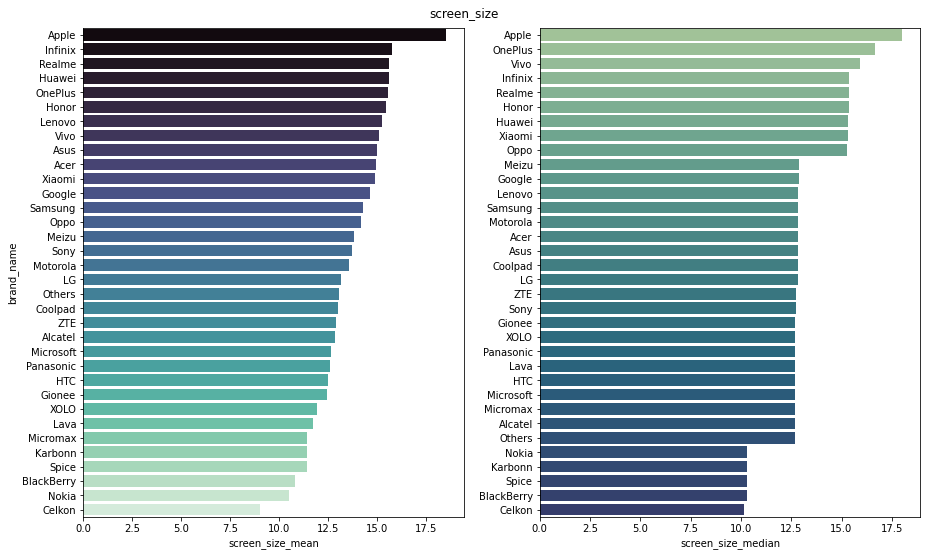

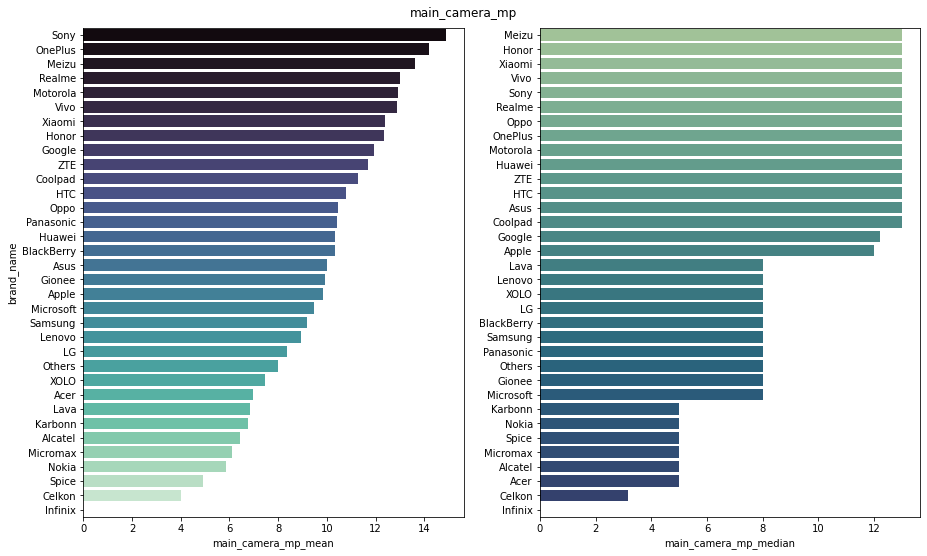

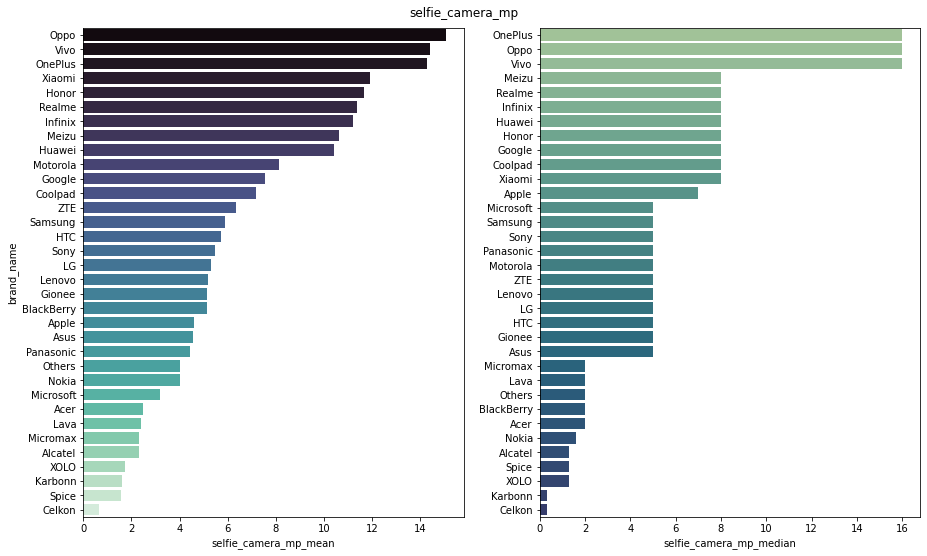

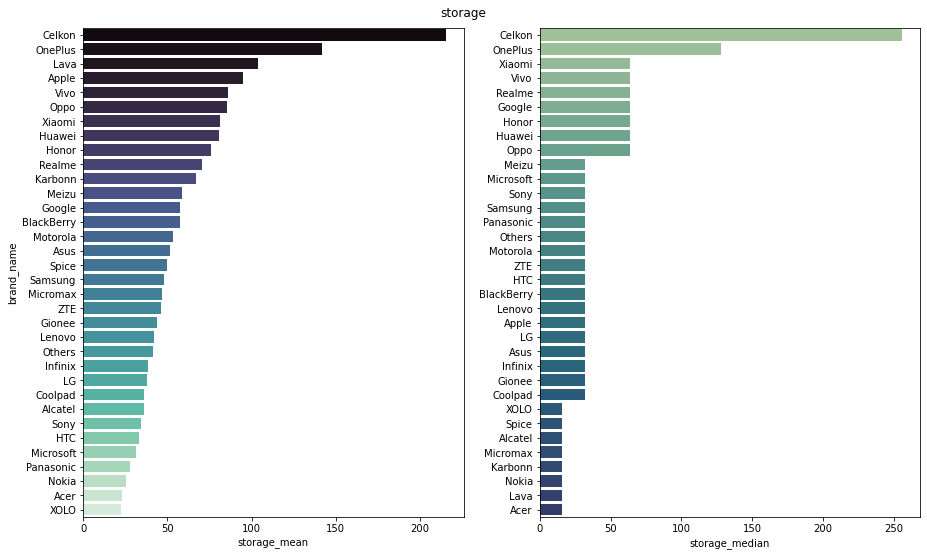

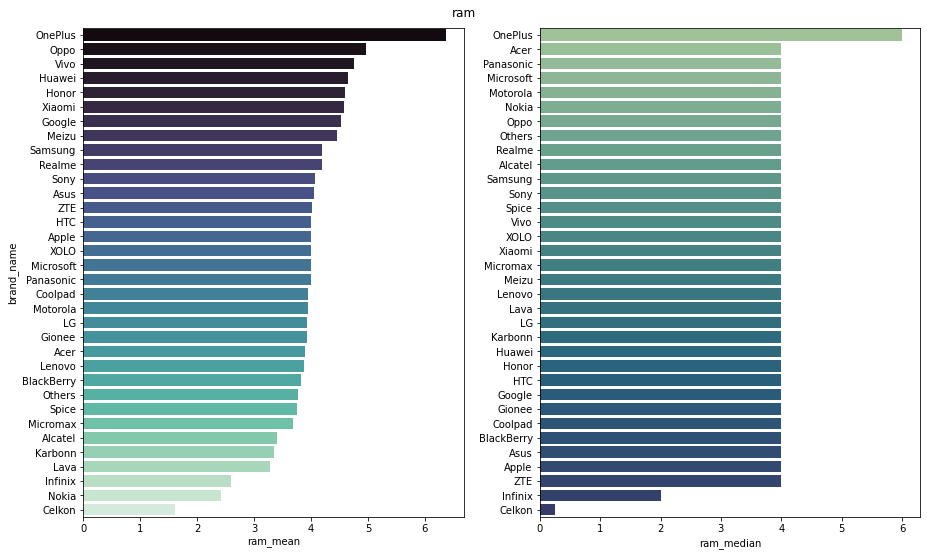

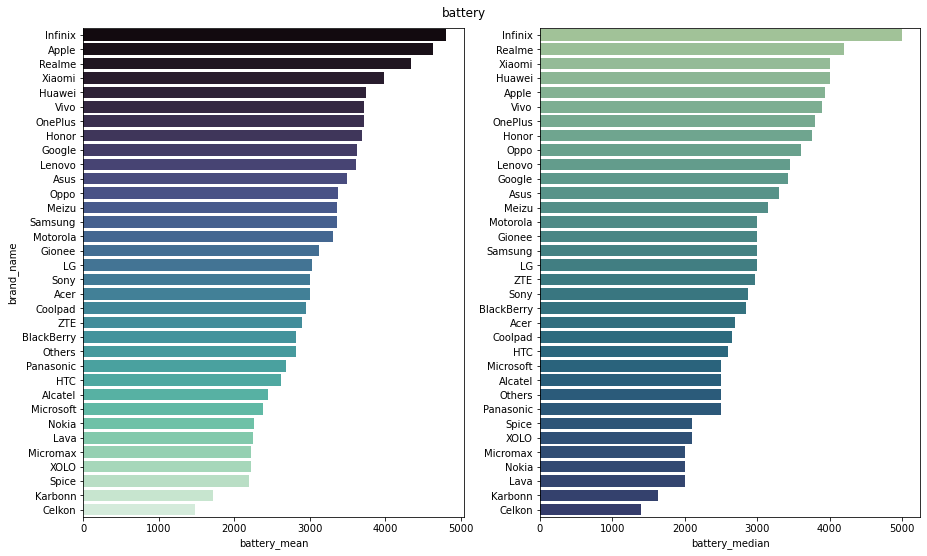

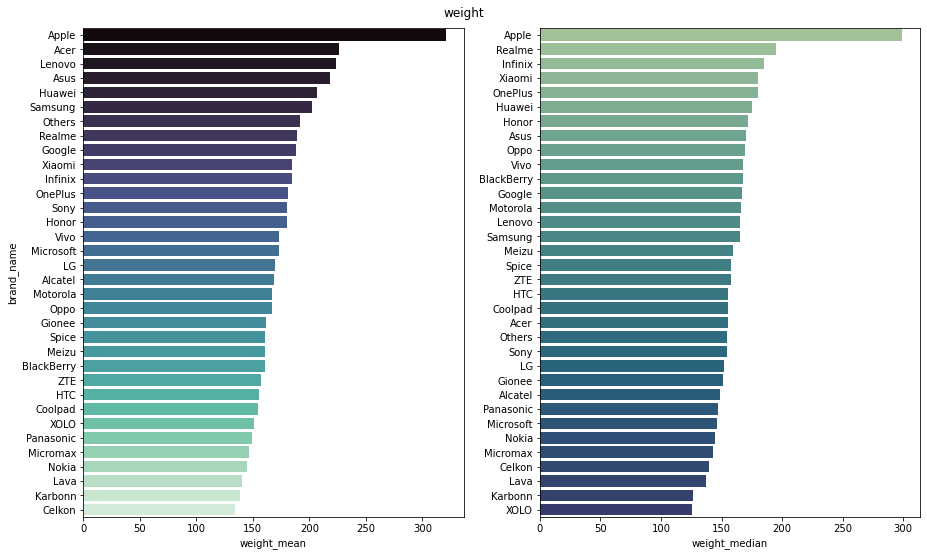

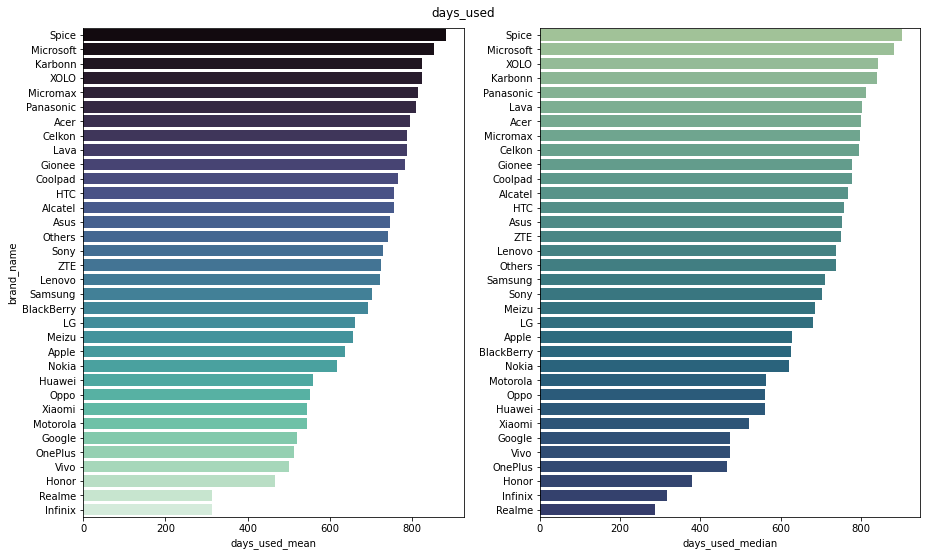

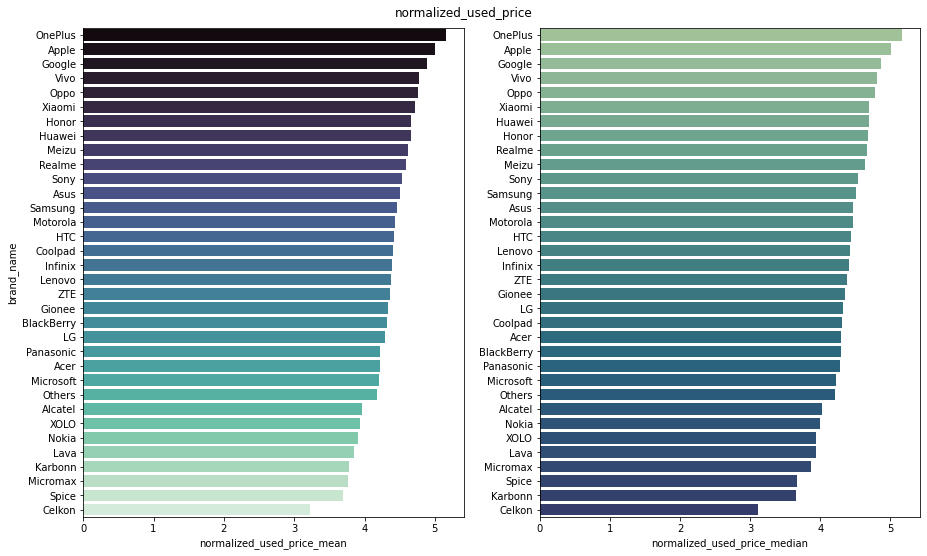

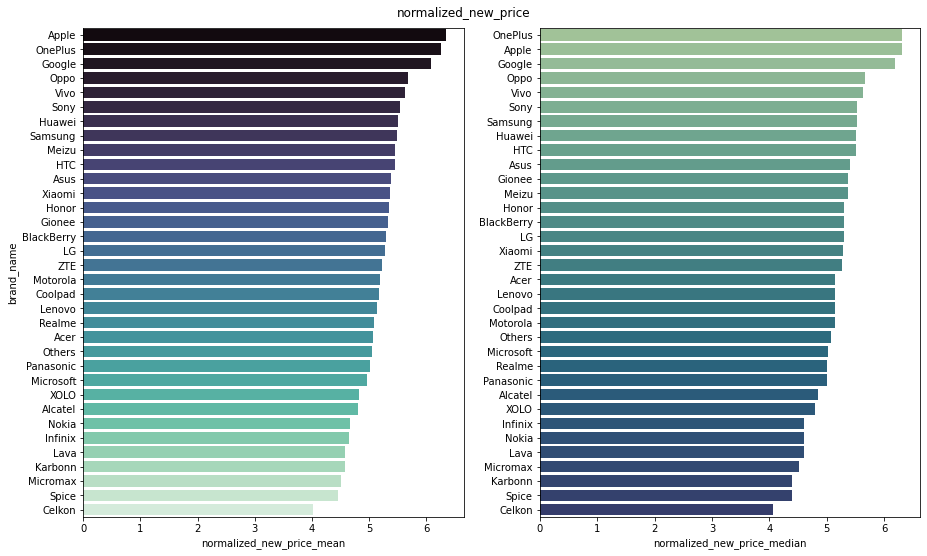

In [62]:
#next, loop plotting every column in Brand as a barplot with brand_name.
#Keep the screen_size mean and median together, as well as the other original columns.

columnlist=[]
for column in cell.describe().columns.drop('release_year'):
    columnlist=[]
    for brandcolumn in Brand.columns:
        if brandcolumn.startswith(column)==True:
            columnlist.append(brandcolumn)    
            
    fig=plt.figure()
    fig.add_subplot(1,2,1)
    sns.barplot(data=Brand.loc[:,['brand_name',columnlist[0]]],x=columnlist[0],y='brand_name',palette='mako',order=
            Brand.loc[:,['brand_name',columnlist[0]]].sort_values(columnlist[0],ascending=False).brand_name)
    fig.add_subplot(1,2,2)
    sns.barplot(data=Brand.loc[:,['brand_name',columnlist[1]]],x=columnlist[1],y='brand_name',palette='crest',order=
            Brand.loc[:,['brand_name',columnlist[1]]].sort_values(columnlist[1],ascending=False).brand_name).set(ylabel='')
    plt.title(column,x=-0.2,y=1.01)
    plt.gcf().set_size_inches(15,9)
del columnlist
del Brand

### For brand_name vs screen_size:
	Apple is the largest screen by mean and by median.
	Celkon is the smallest by mean and median.
### For brand_name vs main_camera_mp:
	Sony has the largest mean camera resolution, many brands share the highest median 13mp.
	Infinix does not have data for main camera.
	Celkon is the lowest by mean and median aside from Infinix.
### For brand_name vs selfie_camera_mp:
	Oppo holds the highest selfie cam resolution by mean and median, but median is shared by OnePlus and Vivo.
	Celkon is the lowest by mean and median.
### For brand_name vs storage:
	Celkon holds the highest storage by a landslide in both mean and median.
	XOLO holds the lowest mean storage, Acer holds the lowest median storage.
### For brand_name vs RAM:
	OnePlus holds the highest RAM by a lot, by mean and median.
	Celkon holds the lowest RAM by mean and median.
### For brand_name vs battery:
	Infinix has the highest capacity batteries by mean and median.
	Celkon holds the lowest capacity batteries by mean and median.
### For brand_name vs weight:
	Apple holds highest weight by a lot, by mean and median.
	Celkon holds the lowest weight by mean, XOLO holds the lowest weight by median.
### For brand_name vs days_used:
	Spice has been used the most on average and by median.
	Infinix has been used the least by mean, Realme has been used the least by median.
### For brand_name vs normalized_used_price:
	Used OnePlus devices are the most expensive by mean and median.
	Used Celkon devices are the least expensive by mean and median.
### For brand_name vs normalized_new_price:
	New Apple devices are the most expensive by mean, OnePlus by median.
	New Celkon devices are the least expensive by mean and median.
---
## Brand + RAM

In [63]:
cell.groupby('brand_name')['ram'].describe().sort_values('mean',ascending=False)

count    mean     std     min     25%     50%     75%      max
brand_name                                                                   
OnePlus     22.00000 6.36364 2.59203 4.00000 4.00000 6.00000 8.00000 12.00000
Oppo       129.00000 4.96124 2.12280 1.00000 4.00000 4.00000 6.00000 12.00000
Vivo       117.00000 4.75641 1.63820 0.50000 4.00000 4.00000 4.00000  8.00000
Huawei     251.00000 4.65538 1.59539 0.25000 4.00000 4.00000 4.00000 12.00000
Honor      116.00000 4.60345 1.62523 2.00000 4.00000 4.00000 6.00000  8.00000
Xiaomi     132.00000 4.58333 1.50846 2.00000 4.00000 4.00000 4.00000 12.00000
Google      15.00000 4.53333 0.91548 4.00000 4.00000 4.00000 5.00000  6.00000
Meizu       62.00000 4.45161 1.22377 2.00000 4.00000 4.00000 4.00000  8.00000
Samsung    341.00000 4.19941 1.37714 0.25000 4.00000 4.00000 4.00000 12.00000
Realme      41.00000 4.19512 1.32702 2.00000 3.00000 4.00000 6.00000  6.00000
Sony        86.00000 4.06977 0.47997 4.00000 4.00000 4.00000 4.00000  8.00000
Asus       122.00000 4.04918 0.60100 2.00000 4.00000 4.00000 4.00000  8.00000
ZTE        140.00000 4.02321 0.90953 0.25000 4.00000 4.00000 4.00000  8.00000
HTC        110.00000 4.00000 0.33180 3.00000 4.00000 4.00000 4.00000  6.00000
Apple       39.00000 4.00000 0.60698 2.00000 4.00000 4.00000 4.00000  6.00000
XOLO        49.00000 4.00000 0.00000 4.00000 4.00000 4.00000 4.00000  4.00000
Microsoft   22.00000 4.00000 0.00000 4.00000 4.00000 4.00000 4.00000  4.00000
Panasonic   47.00000 4.00000 0.00000 4.00000 4.00000 4.00000 4.00000  4.00000
Coolpad     22.00000 3.95455 0.21320 3.00000 4.00000 4.00000 4.00000  4.00000
Motorola   106.00000 3.94340 1.32973 2.00000 4.00000 4.00000 4.00000 12.00000
LG         201.00000 3.93657 1.07646 0.25000 4.00000 4.00000 4.00000  8.00000
Gionee      56.00000 3.93304 0.50111 0.25000 4.00000 4.00000 4.00000  4.00000
Acer        51.00000 3.90196 0.50020 1.00000 4.00000 4.00000 4.00000  4.00000
Lenovo     171.00000 3.88596 0.77422 0.25000 4.00000 4.00000 4.00000  6.00000
BlackBerry  22.00000 3.82955 0.79950 0.25000 4.00000 4.00000 4.00000  4.00000
Others     502.00000 3.77789 1.01583 0.25000 4.00000 4.00000 4.00000  8.00000
Spice       30.00000 3.75000 0.95141 0.25000 4.00000 4.00000 4.00000  4.00000
Micromax   117.00000 3.67949 1.05293 0.25000 4.00000 4.00000 4.00000  4.00000
Alcatel    121.00000 3.40702 1.26373 0.25000 4.00000 4.00000 4.00000  4.00000
Karbonn     29.00000 3.35345 1.44160 0.25000 4.00000 4.00000 4.00000  4.00000
Lava        36.00000 3.27778 1.41393 0.25000 4.00000 4.00000 4.00000  4.00000
Infinix     10.00000 2.60000 0.84327 2.00000 2.00000 2.00000 3.00000  4.00000
Nokia      102.00000 2.42029 1.88933 0.02000 0.03000 4.00000 4.00000  6.00000
Celkon      33.00000 1.61364 1.83189 0.25000 0.25000 0.25000 4.00000  4.00000

### The median and IQR are almost useless when it comes to Brand vs RAM. Most phones, as discussed previously, have 4GB of RAM. There isn't a single company with a phone or tablet below 4GB of RAM.
### When sorted by mean, there's a little more variation, and some phone companies fall below an average of 4GB of RAM. Generally speaking, 4GB is enough to do pretty much any basic task a phone does nowadays, but personally, I would try to get 6GB minimum.

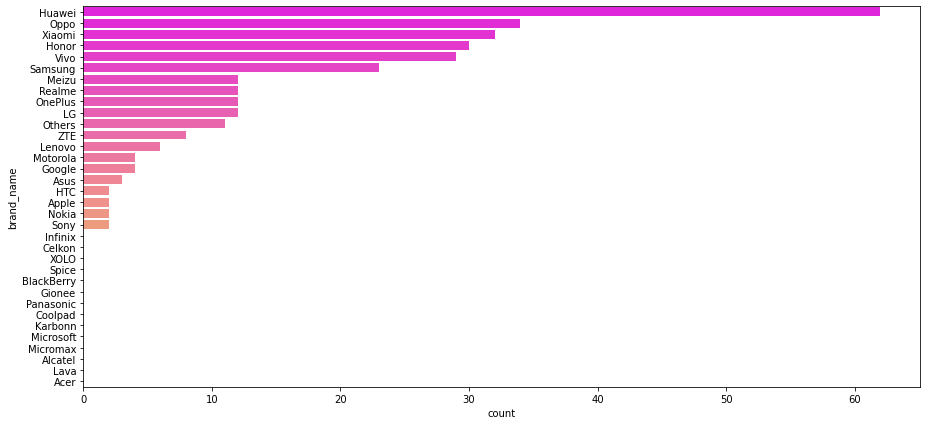

In [64]:
sns.countplot(data=cell[cell['ram']>=6],y='brand_name',palette='spring',order=
              cell[cell['ram']>=6]['brand_name'].value_counts().reset_index()['index'])
plt.gcf().set_size_inches(15,7)

### Huawei devices have the highest amount of devices with 6GB of RAM or greater.
---
## Brand + Screen Size

In [65]:
cell.groupby('brand_name')['screen_size'].describe().sort_values('mean',ascending=False)

count     mean     std      min      25%      50%      75%  \
brand_name                                                                  
Apple       39.00000 18.51026 7.10783 10.16000 12.83000 18.01000 24.24500   
Infinix     10.00000 15.75600 0.82531 15.29000 15.39000 15.39000 15.39000   
Realme      41.00000 15.62878 0.52592 15.24000 15.32000 15.37000 15.39000   
Huawei     251.00000 15.60056 3.86101  7.75000 12.79000 15.34000 16.74000   
OnePlus     22.00000 15.55045 1.76122 12.70000 13.44000 16.64000 16.86500   
Honor      116.00000 15.49147 2.65479 10.29000 13.65000 15.37000 16.59000   
Lenovo     171.00000 15.23942 4.27965  7.75000 12.70000 12.83000 17.78000   
Vivo       117.00000 15.11880 1.75355 10.29000 13.79000 15.90000 16.33000   
Asus       122.00000 15.01090 3.82984 10.16000 12.75000 12.83000 17.78000   
Acer        51.00000 14.94961 4.93598  7.75000 11.52000 12.83000 17.78000   
Xiaomi     132.00000 14.90485 2.24794 10.24000 12.83000 15.32000 16.37750   
Google      15.00000 14.64333 3.22940 12.70000 12.84000 12.88000 15.28000   
Samsung    341.00000 14.31683 4.93157  5.08000 10.36000 12.83000 15.37000   
Oppo       129.00000 14.17039 1.99585 10.16000 12.75000 15.29000 15.37000   
Meizu       62.00000 13.82677 1.18307 12.70000 12.83000 12.88000 15.29000   
Sony        86.00000 13.70640 3.68042 10.16000 12.70000 12.75000 15.24000   
Motorola   106.00000 13.56292 1.76894  7.75000 12.70000 12.83000 15.29000   
LG         201.00000 13.14612 3.65127  5.13000 10.34000 12.83000 15.29000   
Others     502.00000 13.05458 4.02048  5.08000 10.29000 12.70000 14.35000   
Coolpad     22.00000 13.01364 1.42991 10.34000 12.73250 12.83000 12.83000   
ZTE        140.00000 12.88857 1.79431  7.75000 12.70000 12.75000 12.84250   
Alcatel    121.00000 12.84793 3.87698  5.18000 10.29000 12.70000 15.24000   
Microsoft   22.00000 12.65318 3.10990 10.16000 10.93000 12.70000 12.88000   
Panasonic   47.00000 12.61255 1.14319 10.16000 12.70000 12.70000 12.83000   
HTC        110.00000 12.51127 1.70345  7.75000 12.70000 12.70000 12.83000   
Gionee      56.00000 12.42946 1.85594  7.75000 10.36000 12.70000 12.83000   
XOLO        49.00000 11.92612 2.25086  7.75000 10.29000 12.70000 12.70000   
Lava        36.00000 11.71500 1.63978  7.75000 10.25750 12.70000 12.70000   
Micromax   117.00000 11.43556 3.01373  5.13000 10.16000 12.70000 12.70000   
Karbonn     29.00000 11.42897 2.38059  7.67000 10.16000 10.29000 12.70000   
Spice       30.00000 11.41133 3.35096  7.75000 10.16000 10.29000 12.70000   
BlackBerry  22.00000 10.81227 2.67677  5.28000  8.36500 10.29000 12.78750   
Nokia      106.00000 10.49632 4.40422  5.18000  5.28000 10.29000 14.33500   
Celkon      33.00000  9.02273 2.65202  5.18000  7.75000 10.16000 10.29000   

                max  
brand_name           
Apple      30.71000  
Infinix    17.32000  
Realme     16.69000  
Huawei     25.60000  
OnePlus    16.94000  
Honor      25.50000  
Lenovo     25.43000  
Vivo       17.50000  
Asus       25.43000  
Acer       25.43000  
Xiaomi     25.43000  
Google     25.45000  
Samsung    30.53000  
Oppo       16.69000  
Meizu      15.39000  
Sony       25.43000  
Motorola   16.23000  
LG         25.43000  
Others     30.56000  
Coolpad    16.59000  
ZTE        16.89000  
Alcatel    25.43000  
Microsoft  25.55000  
Panasonic  15.72000  
HTC        20.55000  
Gionee     16.33000  
XOLO       20.32000  
Lava       14.50000  
Micromax   20.32000  
Karbonn    17.78000  
Spice      25.40000  
BlackBerry 15.21000  
Nokia      25.43000  
Celkon     12.70000

### Apple's mean screen sizes are much larger than average, and in median. However, this may be due to an overabundance of tablets compared to competitors.
    Checking the .describe above, Apple's Q2 is 18cm, which is definitely a tablet.
    So at least the upper 1/2 of the Apple devices here are tablets.

There are 1099 total devices with screen sizes greater than 15.24cm.


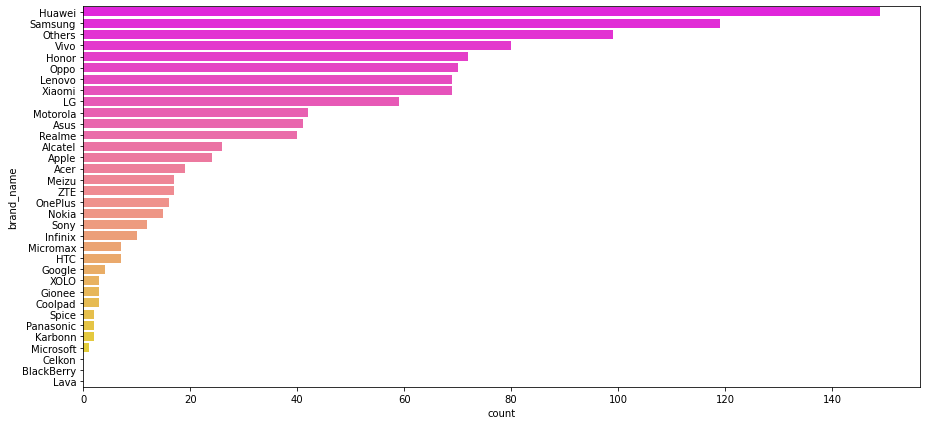

In [66]:
sns.countplot(data=cell[cell['screen_size']>15.24],y='brand_name',palette='spring',order=
              cell[cell['screen_size']>15.24]['brand_name'].value_counts().reset_index()['index'])
plt.gcf().set_size_inches(15,7)

print(f"There are {cell[cell['screen_size']>15.24].shape[0]} total devices with screen sizes greater than 15.24cm.")

### The highest count of devices with screen sizes above 15.24cm is Huawei. Again, they're at the top of the countplot.

In [67]:
Huawei=cell[cell['brand_name']=='Huawei'].describe().T['mean'].reset_index()
Huawei['AllDevicesMean']=(cell.describe().T['mean'].reset_index()['mean'])
Huawei.set_index('index',inplace=True)
Huawei.rename(columns={'index':'attributes','mean':'HuaweiMean'},inplace=True)
Huawei['Huawei/AllDevices_Ratio']=(Huawei['HuaweiMean']/Huawei['AllDevicesMean'])
Huawei

HuaweiMean  AllDevicesMean  Huawei/AllDevices_Ratio
index                                                                     
screen_size              15.60056        13.71312                  1.13764
main_camera_mp           10.34044         9.46021                  1.09305
selfie_camera_mp         10.40239         6.55423                  1.58713
storage                  80.76494        54.57310                  1.47994
ram                       4.65538         4.03612                  1.15343
battery                3745.15936      3133.40270                  1.19524
weight                  206.97888       182.75187                  1.13257
release_year           2017.14741      2015.96526                  1.00059
days_used               557.76494       674.86972                  0.82648
normalized_used_price     4.65457         4.36471                  1.06641
normalized_new_price      5.51508         5.23311                  1.05388

In [68]:
del Huawei

### Huawei tends to make higher quality phones and tablets, at slightly higher cost on average.
    Their phones also tend to be around 1 year newer on average, which implies they are a fairly new company.
---
## Brand vs Selfie Camera MP

In [69]:
cell.groupby(['brand_name'])['selfie_camera_mp'].describe().sort_values('mean',ascending=False)

count     mean      std     min      25%      50%      75%  \
brand_name                                                                  
Oppo       129.00000 15.05271 10.06367 0.30000  5.00000 16.00000 20.00000   
Vivo       117.00000 14.41282  7.96314 0.30000  8.00000 16.00000 16.00000   
OnePlus     22.00000 14.27273  3.80703 5.00000 16.00000 16.00000 16.00000   
Xiaomi     132.00000 11.93106  8.18373 1.30000  5.00000  8.00000 20.00000   
Honor      116.00000 11.64483  8.43549 1.30000  7.25000  8.00000 16.00000   
Realme      41.00000 11.36585  5.84276 5.00000  8.00000  8.00000 16.00000   
Infinix     10.00000 11.20000  4.13118 8.00000  8.00000  8.00000 16.00000   
Meizu       62.00000 10.62903  6.59666 2.00000  5.00000  8.00000 19.00000   
Huawei     251.00000 10.40239  8.95657 0.30000  5.00000  8.00000 16.00000   
Motorola   106.00000  8.14151  6.88384 0.30000  5.00000  5.00000  8.00000   
Google      13.00000  7.53846  1.66410 2.00000  8.00000  8.00000  8.00000   
Coolpad     22.00000  7.18182  3.40359 2.00000  5.00000  8.00000  8.00000   
ZTE        140.00000  6.36143  4.58852 0.30000  2.00000  5.00000  8.00000   
Samsung    341.00000  5.90147  6.99525 0.30000  2.00000  5.00000  8.00000   
HTC        110.00000  5.74091  4.50863 0.30000  2.10000  5.00000  8.00000   
Sony        86.00000  5.46163  4.35164 0.30000  2.00000  5.00000  8.00000   
LG         201.00000  5.30149  5.77081 0.30000  1.30000  5.00000  8.00000   
Lenovo     171.00000  5.17895  5.59909 0.30000  2.00000  5.00000  8.00000   
Gionee      56.00000  5.16071  4.20704 0.30000  2.00000  5.00000  8.00000   
BlackBerry  22.00000  5.14091  4.51333 1.10000  2.00000  2.00000  8.00000   
Apple       39.00000  4.61538  2.78545 1.20000  1.20000  7.00000  7.00000   
Asus       122.00000  4.54262  3.79351 0.30000  2.00000  5.00000  8.00000   
Panasonic   47.00000  4.45319  2.95516 0.30000  2.00000  5.00000  5.00000   
Others     502.00000  4.04024  4.28926 0.30000  1.00000  2.00000  5.00000   
Nokia      106.00000  4.03585  5.67449 0.00000  0.00000  1.60000  5.00000   
Microsoft   22.00000  3.18182  2.14889 0.30000  1.00000  5.00000  5.00000   
Acer        51.00000  2.47451  2.48828 0.30000  0.80000  2.00000  2.00000   
Lava        36.00000  2.41944  2.46111 0.30000  0.30000  2.00000  5.00000   
Micromax   117.00000  2.32222  2.46434 0.30000  0.30000  2.00000  5.00000   
Alcatel    121.00000  2.29752  2.47886 0.30000  0.30000  1.30000  5.00000   
XOLO        49.00000  1.71837  1.63241 0.30000  0.30000  1.30000  2.00000   
Karbonn     29.00000  1.61034  2.16718 0.30000  0.30000  0.30000  2.00000   
Spice       30.00000  1.57333  1.05860 0.30000  1.30000  1.30000  1.30000   
Celkon      33.00000  0.67576  0.65001 0.30000  0.30000  0.30000  1.30000   

                max  
brand_name           
Oppo       32.00000  
Vivo       32.00000  
OnePlus    16.00000  
Xiaomi     32.00000  
Honor      32.00000  
Realme     25.00000  
Infinix    16.00000  
Meizu      20.00000  
Huawei     32.00000  
Motorola   25.00000  
Google      8.00000  
Coolpad    16.00000  
ZTE        20.00000  
Samsung    32.00000  
HTC        16.00000  
Sony       16.00000  
LG         32.00000  
Lenovo     32.00000  
Gionee     20.00000  
BlackBerry 16.00000  
Apple       7.00000  
Asus       24.00000  
Panasonic  16.00000  
Others     24.00000  
Nokia      24.00000  
Microsoft   5.00000  
Acer       13.00000  
Lava        8.00000  
Micromax   13.00000  
Alcatel     8.00000  
XOLO        5.00000  
Karbonn     8.00000  
Spice       5.00000  
Celkon      3.00000

### As stated previously, Oppo has the highest fidelity selfie cameras on average.

In [70]:
print(f"The Oppo mean used price is: ${round(pd.DataFrame(cell.groupby(['brand_name'])['normalized_used_price'].mean().T).loc['Oppo',:][0],2)}.")
print(f"The mean used price for all other devices is: ${round(pd.DataFrame(cell.groupby(['brand_name'])['normalized_used_price'].mean().T).drop('Oppo',axis=0)['normalized_used_price'].mean(),2)}.")
print(f"Therefore, Oppo devices are {round(round(pd.DataFrame(cell.groupby(['brand_name'])['normalized_used_price'].mean().T).loc['Oppo',:][0],2)/round(pd.DataFrame(cell.groupby(['brand_name'])['normalized_used_price'].mean().T).drop('Oppo',axis=0)['normalized_used_price'].mean(),2),3)}x more expensive than all other devices in this dataset on average.\n")
print(f"There are {cell[cell['brand_name']=='Oppo'].shape[0]} Oppo devices in total in our dataset.")

df1=pd.DataFrame(cell['brand_name'].value_counts())
df1.rename(columns={'brand_name':'count'},inplace=True)
df1=df1.reset_index().rename(columns={'index':'Brand'}).reset_index()
df1['index']=df1['index']+1


print(f"This means that Oppo has the {int(pd.DataFrame(df1[df1['Brand']=='Oppo'])['index'].mean())}th largest count of devices within our data.")
del df1

The Oppo mean used price is: $4.76.
The mean used price for all other devices is: $4.33.
Therefore, Oppo devices are 1.099x more expensive than all other devices in this dataset on average.

There are 129 Oppo devices in total in our dataset.
This means that Oppo has the 8th largest count of devices within our data.


### It seems Oppo has a slightly higher price as well as better selfie cams.
### Let's check how many 8MP selfie-camera-equipped devices there are in each Brand.

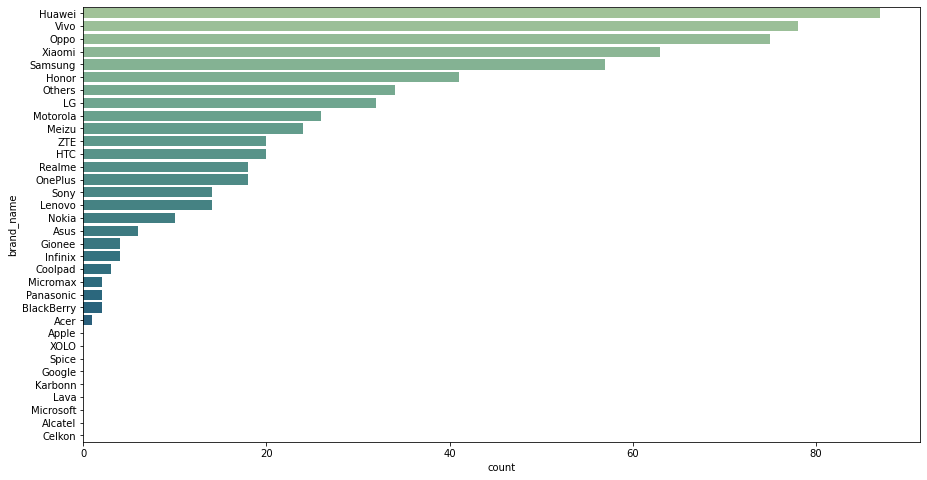

In [71]:
sns.countplot(data=cell[cell['selfie_camera_mp']>8],y='brand_name',palette='crest',order=
             cell[cell['selfie_camera_mp']>8]['brand_name'].value_counts().reset_index().sort_values(
                 'brand_name',ascending=False)['index']
)
plt.gcf().set_size_inches(15,8)

### Again, Apple is absent from this data with zero cameras over 8mp. Apple has been well known for having excellent camera quality. Even going two generations back to the IPhone 11, they had 12MP selfie cameras.

### Along with half of the devices in Apple's data being tablets, we may not be able to use this data to accurately predict Apple's used sales later in the analysis.

### Similarly, Google has zero phones/tablets with 8MP. They are another company known for having good phone cameras.

### Huawei, Vivo, and Oppo have the 3 highest counts of 8MP cameras in the data.
---
## Battery vs Main Camera MP
### Let's check the same >8MP stat, but for main cameras.

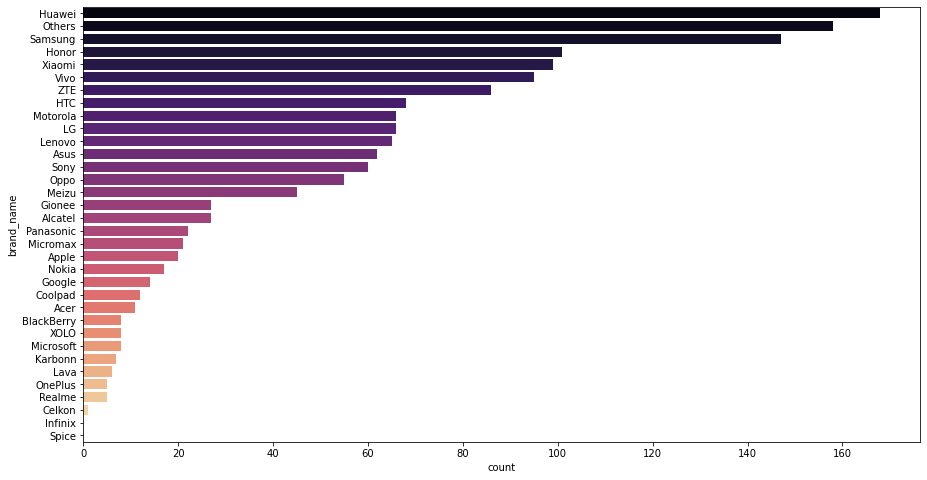

In [72]:
sns.countplot(data=cell[cell['main_camera_mp']>8],y='brand_name',palette='magma',order=
             cell[cell['main_camera_mp']>8]['brand_name'].value_counts().reset_index().sort_values(
                 'brand_name',ascending=False)['index']
)
plt.gcf().set_size_inches(15,8)

### Strangely, Apple is much better off here, with close to all of their devices having 8MP front cameras. The IPhone 11 was the first of their line to have above 8MP on the selfie camera, released in 2019. It's safe to say these devices are mostly from the time period between the IPhone 5 (2013, first 8MP main cam) and the IPhone 11 (2019).

### Samsung has been known to be a consistent performer in main camera fidelity, so it isn't surprising to see them in the top 3 here.
#### Something strange to note, 'Others' is the second-highest count for >8MP main camera equipped devices. This could be a case of quantity over quality, as Others was the highest-count brand when we checked back in univariate analysis.

In [73]:
print(f"The percentage of 'Other' brand devices with at least 8MP equipped main cameras is {round(pd.DataFrame(cell[cell['main_camera_mp']>8]['brand_name'].value_counts()).loc['Others'].mean()/cell[cell['brand_name']=='Others'].shape[0],3)*100}%,")
print(f"the percentage of all devices in our dataset with at least 8MP equipped main cameras is {round(cell[cell['main_camera_mp']>8].shape[0]/cell['main_camera_mp'].shape[0],3)*100}%.\n")

The percentage of 'Other' brand devices with at least 8MP equipped main cameras is 31.5%,
the percentage of all devices in our dataset with at least 8MP equipped main cameras is 45.2%.



### The high count of unknown-brand devices with good front cameras does seem to be a result of the quantity, rather than the quality.
### It may be a good idea to plot the ratios of good main cameras for each brand to see which brands tend to have the best ones.

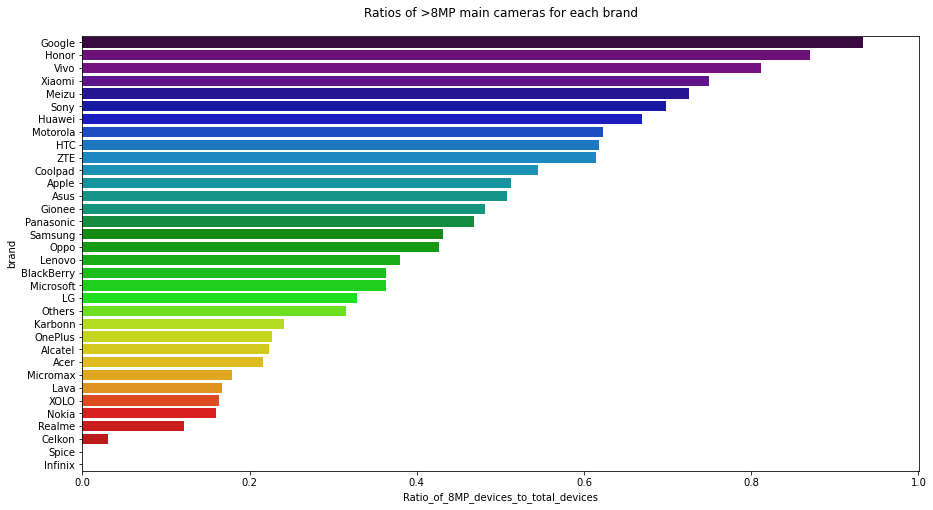

In [74]:
Ratios=cell[cell['main_camera_mp']>8]['brand_name'].value_counts().reset_index().sort_values('index',ascending=True).rename(columns={'index':'brand','brand_name':'Count_of_>8MP_cameras'}).set_index('brand')
Ratios['Count_of_all_devices']=cell['brand_name'].value_counts().reset_index().sort_values('index',ascending=True).set_index('index')['brand_name']
Ratios['Ratio_of_8MP_devices_to_total_devices']=Ratios['Count_of_>8MP_cameras']/Ratios['Count_of_all_devices']
Ratios.sort_values('Ratio_of_8MP_devices_to_total_devices',ascending=False,inplace=True)
Ratios.drop(['Count_of_>8MP_cameras','Count_of_all_devices'],axis=1,inplace=True)
Ratios=Ratios.reset_index()
sns.barplot(data=Ratios,y='brand',x='Ratio_of_8MP_devices_to_total_devices',order=Ratios.brand,palette='nipy_spectral')
plt.xlim(0,1.001)
plt.title('Ratios of >8MP main cameras for each brand',x=0.5,y=1.03)
plt.gcf().set_size_inches(15,8)

In [75]:
del Ratios

### Using ratios rather than pure counts, we can see what companies consistently create devices with good cameras.
### Google, Honor, and Vivo have the highest ratio of 8MP main cameras to total devices.

### Let's do the same but for the selfie cameras.

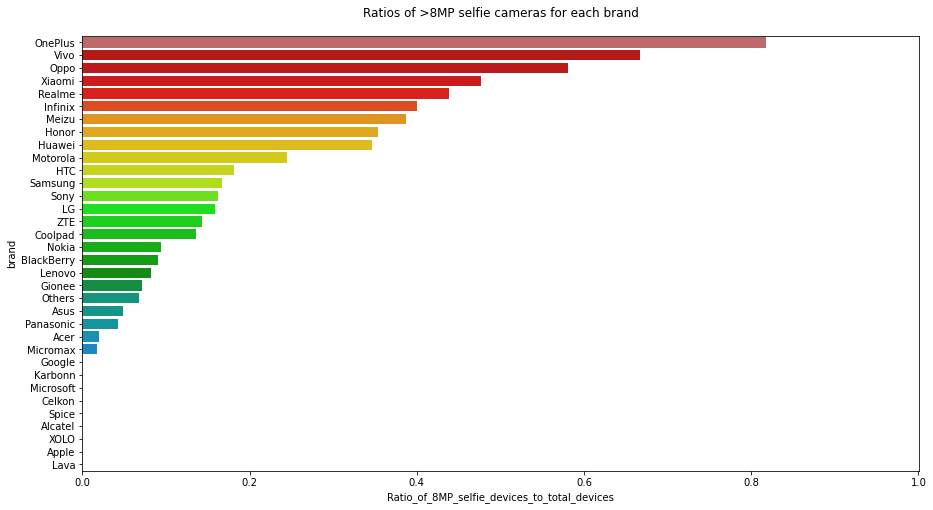

In [76]:
Ratios_Selfie=cell[cell['selfie_camera_mp']>8]['brand_name'].value_counts().reset_index().sort_values('index',ascending=True).rename(columns={'index':'brand','brand_name':'Count_of_>8MP_cameras'}).set_index('brand')
Ratios_Selfie['Count_of_all_devices']=cell['brand_name'].value_counts().reset_index().sort_values('index',ascending=True).set_index('index')['brand_name']
Ratios_Selfie['Ratio_of_8MP_selfie_devices_to_total_devices']=Ratios_Selfie['Count_of_>8MP_cameras']/Ratios_Selfie['Count_of_all_devices']
Ratios_Selfie.sort_values('Ratio_of_8MP_selfie_devices_to_total_devices',ascending=False,inplace=True)
Ratios_Selfie.drop(['Count_of_>8MP_cameras','Count_of_all_devices'],axis=1,inplace=True)
Ratios_Selfie=Ratios_Selfie.reset_index()
sns.barplot(data=Ratios_Selfie,y='brand',x='Ratio_of_8MP_selfie_devices_to_total_devices',order=Ratios_Selfie.brand,palette='nipy_spectral_r')
plt.xlim(0,1.001)
plt.title('Ratios of >8MP selfie cameras for each brand',x=0.5,y=1.03)
plt.gcf().set_size_inches(15,8)


In [77]:
del Ratios_Selfie

### OnePlus, Vivo, and Oppo have the best selfie cameras by ratio. Vivo is the only brand that appears to have top 3 selfie and main camera fidelity by ratio.
---
## Brand vs Release_Year
### This is less of a numerical deep dive, and more of a visual inspection of sorted data.
Lighter color bars = older tablets/phones in the market  
Darker color bars = newer tablets/phones in the market

### Sorted by brand with highest value_count:

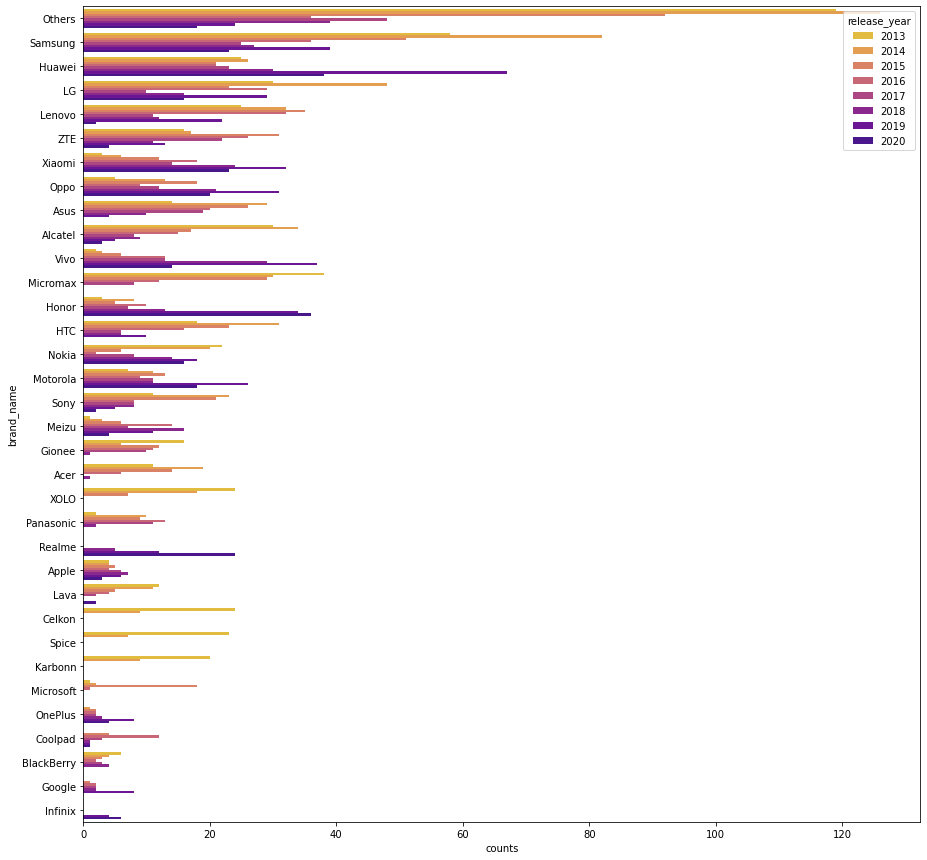

In [78]:
Counts=pd.DataFrame(cell.groupby('brand_name')['release_year'].value_counts()).rename(columns={'release_year':'counts'}).reset_index()
sns.barplot(data=Counts,y='brand_name',x='counts',hue='release_year',palette='plasma_r',order=
           pd.DataFrame(cell['brand_name'].value_counts()).sort_values('brand_name',ascending=False).reset_index()['index'])
plt.gcf().set_size_inches(15,15)
del Counts

### Most of the brands have noticeably more old devices than new ones on the used market.
##### Exceptions include:  
Huawei, Xiaomi, Oppo, Vivo, Honor, Motorola, Meizu, Realme, Oneplus, Google, Infinix  

# <sub>This could indicate that these brands are newer to the market than those like Samsung.</sub>
<sup>(Motorola is an exception, they were acquired by Lenovo in 2014, which brought them back into the mainstream.)</sup>


### Sorted by brand with the highest 2013 used device counts:

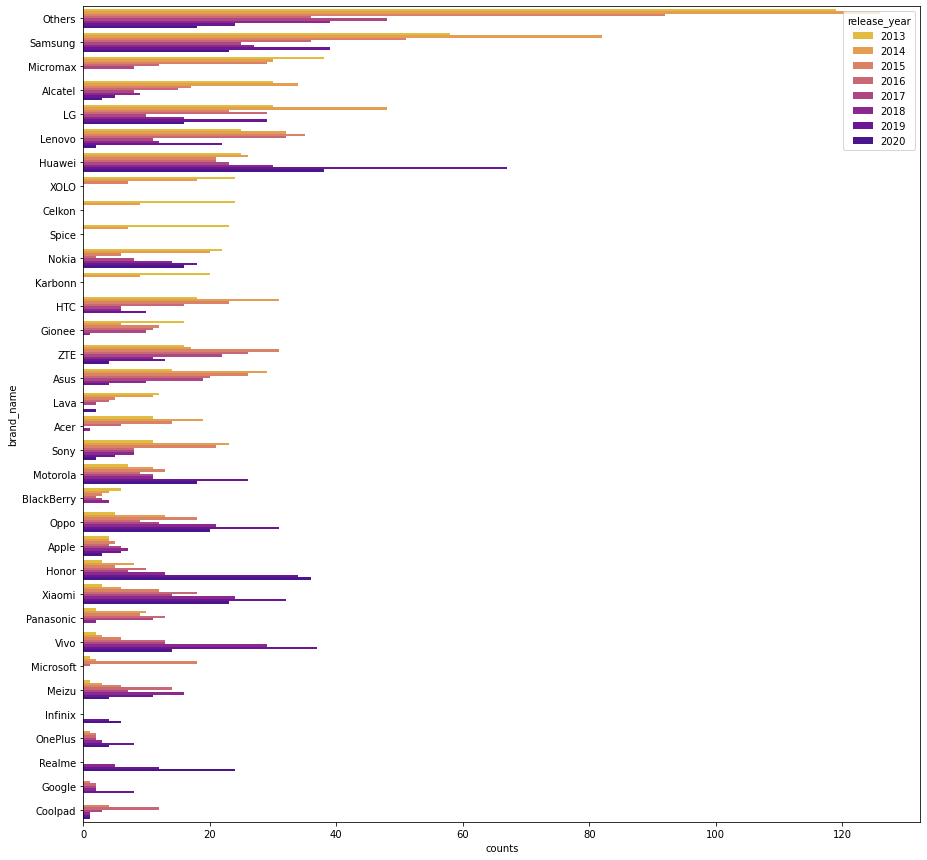

In [79]:
Counts=pd.DataFrame(cell.groupby('brand_name')['release_year'].value_counts()).rename(columns={'release_year':'counts'}).reset_index()
sns.barplot(data=Counts,y='brand_name',x='counts',hue='release_year',palette='plasma_r',order=
           pd.DataFrame(cell[cell['release_year']==2013]['brand_name'].value_counts()).reset_index().sort_values('brand_name',ascending=False)['index'])
plt.gcf().set_size_inches(15,15)
del Counts

### Something to note, 'Others' has by far the highest amount of older devices in the used market.
    This makes sense: Many of these old devices could have been made by now-defunct manufacturers,
    which makes the brand harder to trace and document. Another explanation of 'other' phone brands
    could just be small companies that don't have enough devices to add a category for.
    
### Sorted by brand with the highest 2020 used device counts:

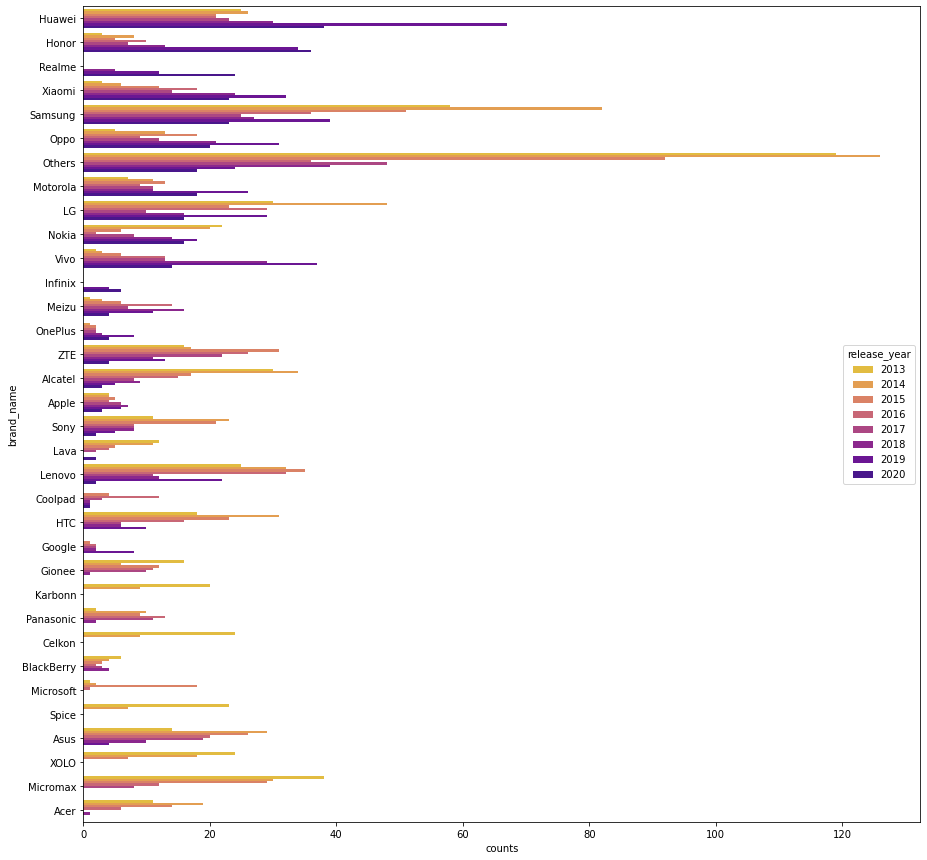

In [80]:
Counts=pd.DataFrame(cell.groupby('brand_name')['release_year'].value_counts()).rename(columns={'release_year':'counts'}).reset_index()
sns.barplot(data=Counts,y='brand_name',x='counts',hue='release_year',palette='plasma_r',order=
           pd.DataFrame(cell[cell['release_year']==2020]['brand_name'].value_counts()).reset_index().sort_values('brand_name',ascending=False)['index'])
plt.gcf().set_size_inches(15,15)
del Counts

### Something to note, Google does not have a single entry under 2020. They released the Pixel 5 and 4a in September 2020, so the absence of Google here is strange. It was the end of the year, but 3 months is plenty of time for scalpers to take advantage of the electronics market mid-Covid and put the devices up on the used market.

---
## Brand vs OS

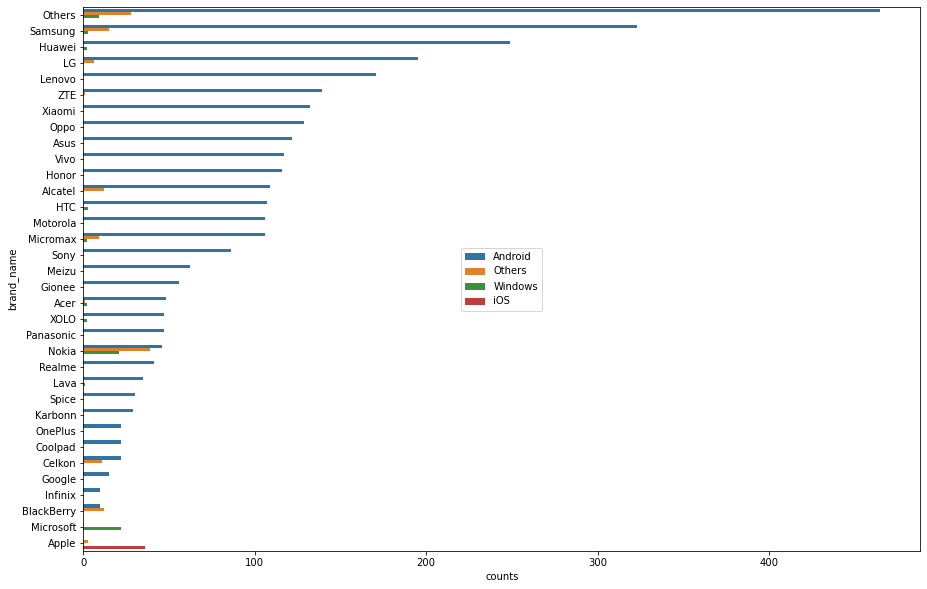

In [81]:
BrandOS=pd.DataFrame(cell.groupby('brand_name')['os'].value_counts()).rename(columns={'os':'counts'}).reset_index().rename(columns={'level_1':'OS'})
sns.barplot(data=BrandOS,y='brand_name',x='counts',hue='OS',order=
    cell[cell['os']=='Android']['brand_name'].value_counts(ascending=False).index.values
)
plt.legend(loc='center')
plt.gcf().set_size_inches(15,10)

### This doesn't tell us much, honestly. Most phones/tablets run on Android in this data set.
### Let's redo this without Android to see which brands run alternate OS's.

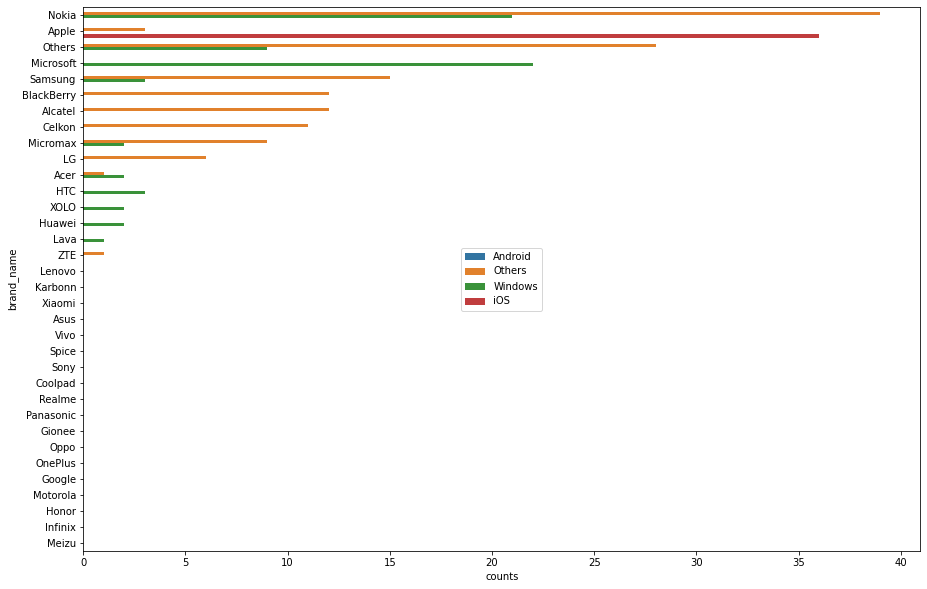

In [82]:
sns.barplot(data=BrandOS[BrandOS['OS']!='Android'],y='brand_name',x='counts',hue='OS',order=
    cell[cell['os']!='Android']['brand_name'].value_counts().index.values
)
plt.gcf().set_size_inches(15,10)
plt.legend(loc='center')
del BrandOS

### Nokia, Apple, and 'Others' have the highest count of non-Android OS's. MANY brands only run Android.

### Strangely, there are a few Apple products under the 'Others' OS. My best guess is that these devices are macOS, because Apple isn't known for branching out of their homebrewed operating systems.

### Microsoft is also strange. The Surface Duo was released in September of 2020, and that is a phone-tablet hybrid that runs Android. Seeing all Microsoft products running Windows tells me immediately that this particular phone is not part of the data.

---

## Brand vs 4G and 5G
### Let's start by creating a separate dataframe containing the 4g and 5g counts.

In [83]:
# Create a dataframe using the groupby of brand_name with 4g and 5g, with value counts for each of their results.

Brand4g5g=pd.DataFrame(cell.groupby('brand_name')['4g'].value_counts(sort=False)).rename(columns={'4g':'4g_counts'}).reset_index().rename(columns={'level_1':'4G?'}).copy()
Brand4g5g['5G?']=pd.DataFrame(cell.groupby('brand_name')['5g'].value_counts(sort=False)).rename(columns={'5g':'5g_counts'}).reset_index().rename(columns={'level_1':'5G?'}).iloc[:,1]
Brand4g5g['5g_counts']=pd.DataFrame(cell.groupby('brand_name')['5g'].value_counts(sort=False)).rename(columns={'5g':'5g_counts'}).reset_index().rename(columns={'level_1':'5G?'}).iloc[:,2]
Brand4g5g.head()

brand_name  4G?  4g_counts  5G?  5g_counts
0       Acer   no         35   no         51
1       Acer  yes         16  yes          0
2    Alcatel   no         63   no        121
3    Alcatel  yes         58  yes          0
4      Apple   no          0   no         39

In [84]:
#I want to get all of this information into a condensed dataframe.

Names=list(Brand4g5g['brand_name'].unique())
Names=Names*4
Names.sort() #preparing the Names list, 4x so there's a name for every tempYesNo outcome.

tempYesNo=[]
for i in range(len(list(Brand4g5g['brand_name'].unique()))):
    tempYesNo.append('no_4g')
    tempYesNo.append('no_5g')
    tempYesNo.append('yes_4g')
    tempYesNo.append('yes_5g') #preparing a set of no's and yes's for 4g and 5g.

tempCounts=[]
for entry in range(Brand4g5g[Brand4g5g['4G?']=='yes'].shape[0]):
    tempCounts.append(Brand4g5g['4g_counts'][2*entry])
    tempCounts.append(Brand4g5g['5g_counts'][2*entry])
    tempCounts.append(Brand4g5g['4g_counts'][2*entry+1])
    tempCounts.append(Brand4g5g['5g_counts'][2*entry+1]) #extracting all of the 4g and 5g counts.

Brand4g5g=pd.DataFrame(
    [Names,tempYesNo,tempCounts]
).T
Brand4g5g.rename(columns={0:'Brand',1:'4g/5g?',2:'counts'},inplace=True)
Brand4g5g.head(10) #overwriting Brand4g5g to create the new dataframe.

Brand  4g/5g? counts
0     Acer   no_4g     35
1     Acer   no_5g     51
2     Acer  yes_4g     16
3     Acer  yes_5g      0
4  Alcatel   no_4g     63
5  Alcatel   no_5g    121
6  Alcatel  yes_4g     58
7  Alcatel  yes_5g      0
8    Apple   no_4g      0
9    Apple   no_5g     39

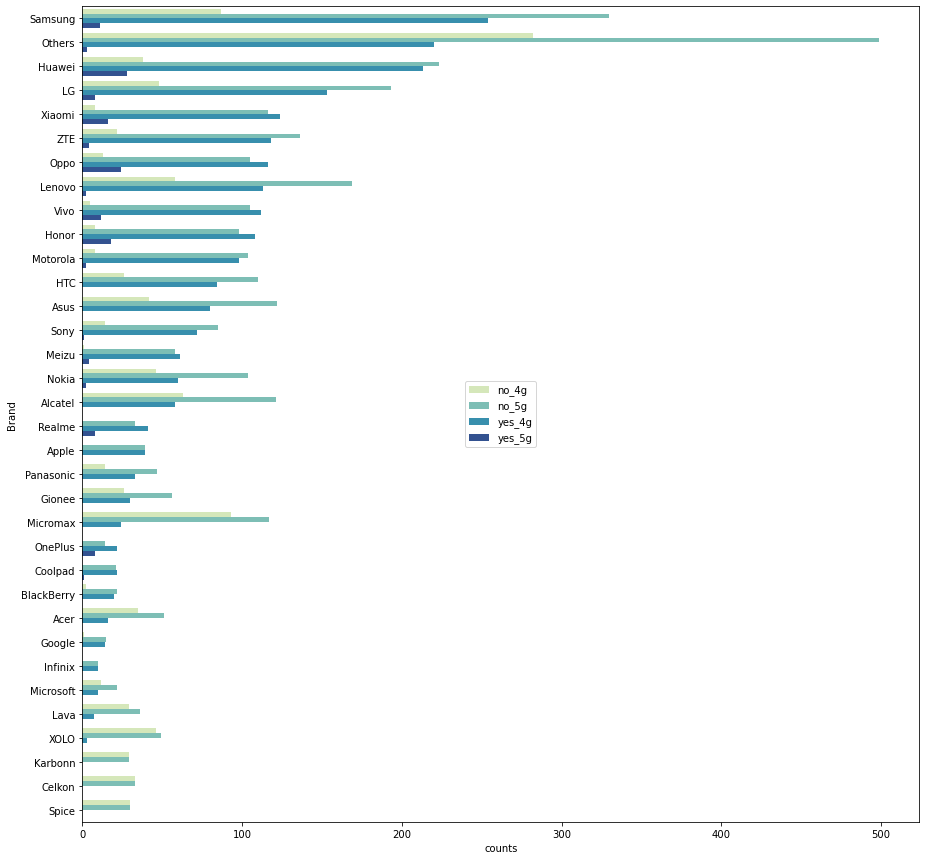

In [85]:
sns.barplot(data=Brand4g5g,y='Brand',x='counts',hue='4g/5g?',palette='YlGnBu',order=
           cell[cell['4g']=='yes']['brand_name'].value_counts(sort=True).index.values) #sorted by 4g=Yes for better visual
plt.legend(loc='center')
plt.gcf().set_size_inches(15,15)

In [86]:
del Brand4g5g

### The 'Others' brands *appear* to do well in this metric, but there aren't many brands that have less 4g supported devices than non-supported (as we discussed earlier, an overall majority of devices support 4g). The 'Others' category unfortunately contains a majority of non-4g phones and tablets.

### Huawei clearly has the highest count of 5g enabled devices, and it seems to hold up when comparing their relative 5g count to the data set as a whole.
    see below, the ratio of 5G Huawei phones is 3x higher than the dataset as a whole.
    Huawei phones seem to excel in most areas besides price.

In [87]:
print(f"The ratio of Huawei 5g-enabled devices to non-5g Huawei devices is {round((cell[cell['brand_name']=='Huawei']['5g']=='yes').sum()/(cell[cell['brand_name']=='Huawei']['5g']=='no').sum(),3)}, and")
print(f"The ratio of 5g enabled devices to non-5g devices overall is {round((cell['5g']=='yes').sum()/(cell['5g']=='no').sum(),3)}.")


The ratio of Huawei 5g-enabled devices to non-5g Huawei devices is 0.126, and
The ratio of 5g enabled devices to non-5g devices overall is 0.046.


---
# 2) OS vs all numericals
    Again, saving Release_Year for later.

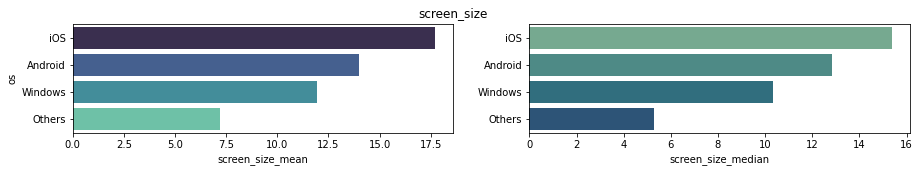

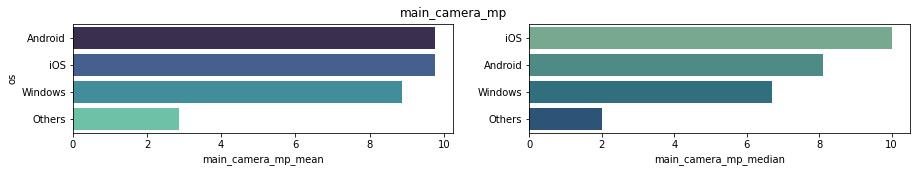

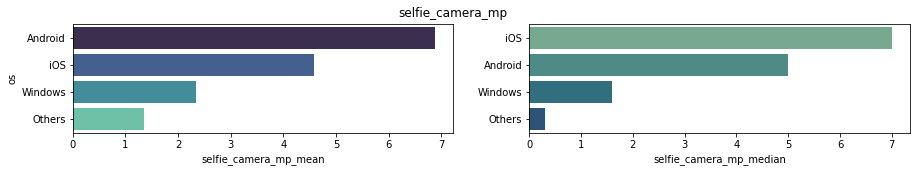

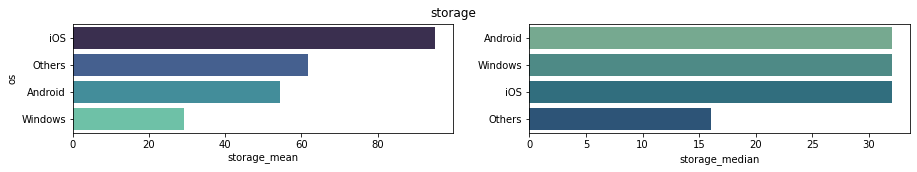

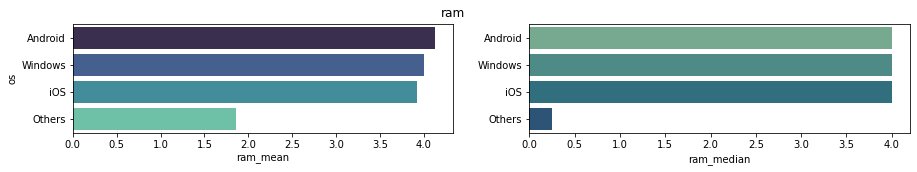

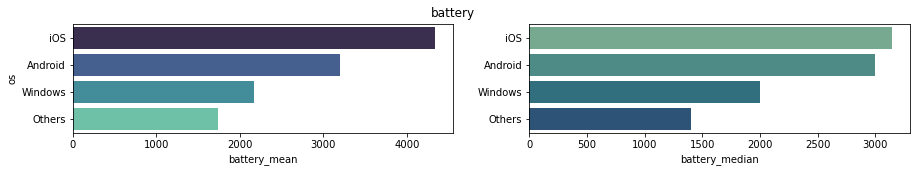

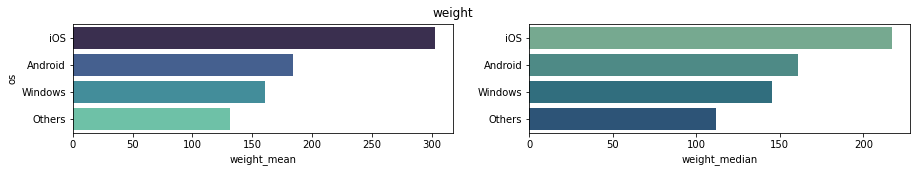

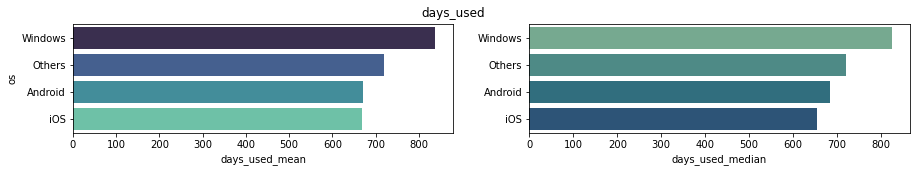

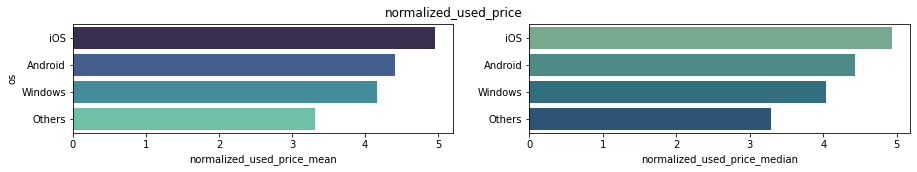

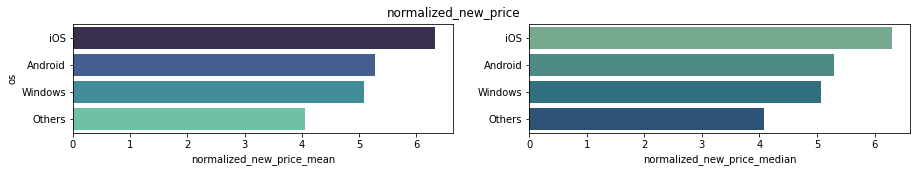

In [88]:
OS=pd.DataFrame() #create a new dataframe, add the OS names as a column
OS['os']=(cell.groupby(['os']).describe().reset_index()['os'].copy())

# Next, add each of the numerical columns' medians and means from the groupby from cell.groupby(['os']).

for column in cell.describe().columns.drop('release_year'):
    for subcolumn in cell.describe().T.columns:
        if subcolumn=='mean':
            OS[column+'_'+subcolumn]=(cell.groupby(['os']).describe().reset_index()[column][subcolumn])
        elif subcolumn=='50%':
            OS[column+'_median']=(cell.groupby(['os']).describe().reset_index()[column][subcolumn])

#same loop for plotting as before.
columnlist=[]
for column in cell.describe().columns.drop('release_year'):
    columnlist=[]
    for oscolumn in OS.columns:
        if oscolumn.startswith(column)==True:
            columnlist.append(oscolumn)    
            
    fig=plt.figure()
    fig.add_subplot(1,2,1)
    sns.barplot(data=OS.loc[:,['os',columnlist[0]]],x=columnlist[0],y='os',palette='mako',order=
            OS.loc[:,['os',columnlist[0]]].sort_values(columnlist[0],ascending=False).os)
    fig.add_subplot(1,2,2)
    sns.barplot(data=OS.loc[:,['os',columnlist[1]]],x=columnlist[1],y='os',palette='crest',order=
            OS.loc[:,['os',columnlist[1]]].sort_values(columnlist[1],ascending=False).os).set(ylabel='')
    plt.title(column,x=-0.2,y=1.01)
    plt.gcf().set_size_inches(15,2)
del columnlist
del OS

## For OS vs screen_size:
	iOS has the largest screens by mean and median.
	'Others' has the smallest by mean and median.
## For OS vs main_camera_mp:
	Android and iOS have the highest mean fidelity, iOS has the highest median fidelity.
	'Others' has the lowest fidelity by mean and median.
## For OS vs selfie_camera_mp:
	Android has the highest mean fidelity, iOS has the highest median fidelity.
	'Others' has the lowest fidelity again.
## For OS vs storage:
	iOS has the highest mean storage, all OS's except 'Others' share the same median 32GB.
	Windows has the lowest mean storage, 'Others' has the lowest median storage.
## For OS vs RAM:
	Android has the highest mean RAM (by a little), 4GB is the median for all but 'Others'.
	'Others' again has the lowest mean and median RAM.
## For OS vs Battery:
	iOS has the highest battery capacity by mean and median.
	'Others' has the lowest capacity.
## For OS vs weight:
	iOS has the highest weight by mean and median.
	'Others' has the lowest ('Others' first win!).
## For OS vs days_used:
	Windows has the highest mean and median days_used.
	iOS has the lowest mean and median days_used.
## For OS vs normalized_used_price:
	iOS has the highest price by mean and median.
	'Others' has the lowest price by mean and median (another win!).
## For OS vs normalized_new_price:
	iOS has the highest price by mean and median.
	'Others' maintains the lowest prices by mean and median.

---

### iOS having the largest average (and median) screen size & weight is, again, due to the large amount of Apple tablets in this data set.

### The storage median being equivalent across the board at exactly 32GB is partially due to the fact that computers have storage in powers of two: 32GB, 64GB, 128GB, 256GB, and 1024GB. There are lower amounts of storage, but they're likely in powers of 2MB, rather than GB.
    Most modern phones and tablets have storage in the Gigabytes, and are one of the above 5 options.
### The fact that most relevant OS's have their median storage at 32GB is very interesting (16GB is also possible, but is usually not enough for a modern phone).
    Reasoning: The very middle of the dataset for every OS being what I consider to be
    the bare minimum storage for a modern phone is odd. I have to attribute this
    to the average used-phone buyer using cloud storage or SD cards frequently.

---
## OS vs 4g and 5g
### I will use the same plot method as Brand vs 4G and 5G.

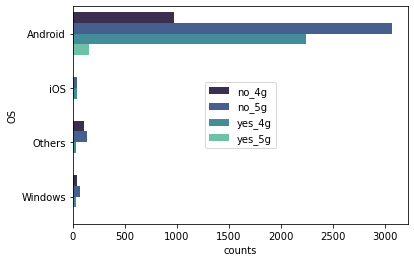

In [89]:
# Create a dataframe using the groupby of OS with 4g and 5g, with value counts for each of their results.

OS4g5g=pd.DataFrame(cell.groupby('os')['4g'].value_counts(sort=False)).rename(columns={'4g':'4g_counts'}).reset_index().rename(columns={'level_1':'4G?'}).copy()
OS4g5g['5G?']=pd.DataFrame(cell.groupby('os')['5g'].value_counts(sort=False)).rename(columns={'5g':'5g_counts'}).reset_index().rename(columns={'level_1':'5G?'}).iloc[:,1]
OS4g5g['5g_counts']=pd.DataFrame(cell.groupby('os')['5g'].value_counts(sort=False)).rename(columns={'5g':'5g_counts'}).reset_index().rename(columns={'level_1':'5G?'}).iloc[:,2]

Names=list(OS4g5g['os'].unique())
Names=Names*4
Names.sort() #preparing the Names list, 4x so there's a name for every tempYesNo outcome.

tempYesNo=[]
for i in range(len(list(OS4g5g['os'].unique()))):
    tempYesNo.append('no_4g')
    tempYesNo.append('no_5g')
    tempYesNo.append('yes_4g')
    tempYesNo.append('yes_5g') #preparing a set of no's and yes's for 4g and 5g.

tempCounts=[]
for entry in range(OS4g5g[OS4g5g['4G?']=='yes'].shape[0]):
    tempCounts.append(OS4g5g['4g_counts'][2*entry])
    tempCounts.append(OS4g5g['5g_counts'][2*entry])
    tempCounts.append(OS4g5g['4g_counts'][2*entry+1])
    tempCounts.append(OS4g5g['5g_counts'][2*entry+1]) #extracting all of the 4g and 5g counts.

OS4g5g=pd.DataFrame(
    [Names,tempYesNo,tempCounts]
).T
OS4g5g.rename(columns={0:'OS',1:'4g/5g?',2:'counts'},inplace=True) #overwriting OS4g5g to create the new dataframe.

sns.barplot(data=OS4g5g,y='OS',x='counts',hue='4g/5g?',palette='mako',order=
           cell[cell['4g']=='yes']['os'].value_counts(sort=True).index.values)
plt.legend(loc='center')
plt.gcf().set_size_inches(6,4)

del Names
del tempYesNo
del tempCounts

### We get a good look at the Android part of the plot, but the others are much lower. I'll replot this without Android.

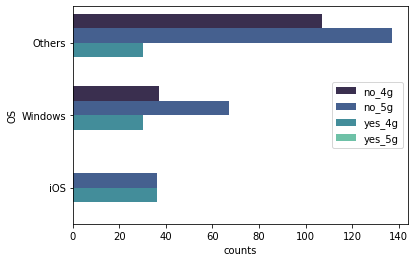

In [90]:
OS4g5g[OS4g5g['OS']!='Android']

sns.barplot(data=OS4g5g[OS4g5g['OS']!='Android'],y='OS',x='counts',hue='4g/5g?',palette='mako')
plt.legend(loc='center right')
plt.gcf().set_size_inches(6,4)
del OS4g5g

### A close to equal amount of 4G from the remaining OS's, but 'Others' has far more 4G-incapable devices.

### Interestingly, no used OS except Android has access to 5G as of the taking of this sample.
---
## OS vs Release_Year

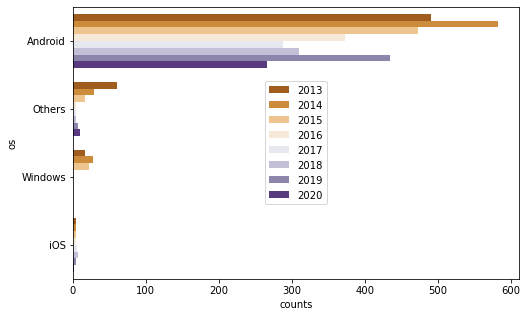

In [91]:
Counts=pd.DataFrame(cell.groupby('os')['release_year'].value_counts()).rename(columns={'release_year':'counts'}).reset_index()
sns.barplot(data=Counts,y='os',x='counts',hue='release_year',palette='PuOr',order=
           pd.DataFrame(cell['os'].value_counts()).sort_values('os',ascending=False).reset_index()['index'])
plt.legend(loc='center')
plt.gcf().set_size_inches(8,5)
del Counts

### For the most part, 'Others' contains a lot of older devices (which I expected from the 'Others' brand name as well).
### Windows drops off pretty hard after 2015. This is very strange, as Microsoft Surface tablets are pretty popular and almost all run on Windows OS.
### Android is all over the place, with a resurgance in 2019 used sales. I would guess this is probably the 'sweet spot' for used phone purchasers; a phone that isn't so old that it's outdated, but isn't so new that it's expensive.
---
# 3) 4G and 5G with all numericals
### I am going to transform 4G and 5G into binary categories. (Part of Preprocessing, but ultimately, the columns are almost in binary format already so not much changes).
A: 1 if 4G, 0 if not  
B: 1 if 5G AND 4G, 0 if not  
Neither: Device is neither 4G nor 5G

In [92]:
cell['5g']=pd.get_dummies(cell['5g'],drop_first=True, prefix='5G')

In [93]:
cell['4g']=pd.get_dummies(cell['4g'],drop_first=True, prefix='4G')

In [94]:
cell.rename(columns={'5g':'5g_and_4g'},inplace=True)
cell

brand_name       os  screen_size  4g  5g_and_4g  main_camera_mp  \
0         Honor  Android     14.50000   1          0        13.00000   
1         Honor  Android     17.30000   1          1        13.00000   
2         Honor  Android     16.69000   1          1        13.00000   
3         Honor  Android     25.50000   1          1        13.00000   
4         Honor  Android     15.32000   1          0        13.00000   
...         ...      ...          ...  ..        ...             ...   
3449       Asus  Android     15.34000   1          0             NaN   
3450       Asus  Android     15.24000   1          0        13.00000   
3451    Alcatel  Android     15.80000   1          0        13.00000   
3452    Alcatel  Android     15.80000   1          0        13.00000   
3453    Alcatel  Android     12.83000   1          0        13.00000   

      selfie_camera_mp   storage     ram    battery    weight  release_year  \
0              5.00000  64.00000 3.00000 3020.00000 146.00000          2020   
1             16.00000 128.00000 8.00000 4300.00000 213.00000          2020   
2              8.00000 128.00000 8.00000 4200.00000 213.00000          2020   
3              8.00000  64.00000 6.00000 7250.00000 480.00000          2020   
4              8.00000  64.00000 3.00000 5000.00000 185.00000          2020   
...                ...       ...     ...        ...       ...           ...   
3449           8.00000  64.00000 6.00000 5000.00000 190.00000          2019   
3450           8.00000 128.00000 8.00000 4000.00000 200.00000          2018   
3451           5.00000  32.00000 3.00000 4000.00000 165.00000          2020   
3452           5.00000  32.00000 2.00000 4000.00000 160.00000          2020   
3453           5.00000  16.00000 2.00000 4000.00000 168.00000          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127                4.30757               4.71510  
1           325                5.16210               5.51902  
2           162                5.11108               5.88463  
3           345                5.13539               5.63096  
4           293                4.38999               4.94784  
...         ...                    ...                   ...  
3449        232                4.49234               6.48387  
3450        541                5.03773               6.25154  
3451        201                4.35735               4.52883  
3452        149                4.34976               4.62419  
3453        176                4.13212               4.27999  

[3454 rows x 15 columns]

### Unfortunately, if I turn the '4g' column into 4g_only, I lose some information in the process. Although the combined info of 4g_only and 5g_and_4g would still contain everything, not being able to sum the 4g column to find the total amount of 4g devices would inevitably lead to avoidable mistakes later in the analysis.
    IE: If I made 4G into 4G_only so the two dummy columns were connected, I wouldn't be able
    to add up solely the 4G_only column to find the total of 4G enabled phones. I would have to
    add 4G and 5G together every time. This seems like a way to make the data look nicer, but it 
    would be functionally harder to work with.
### Let's create a spread of plots for 4G and 5G vs the numerical columns.
    Without release_year again.

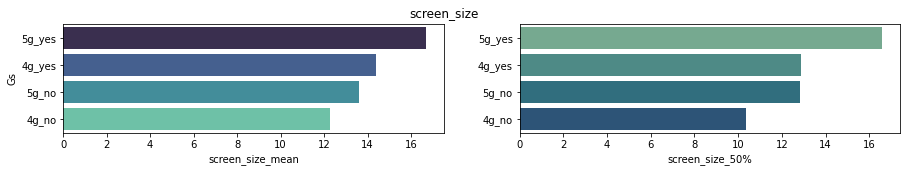

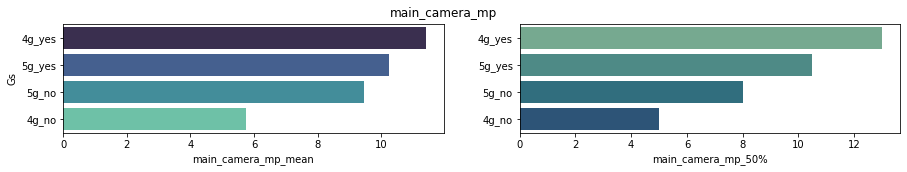

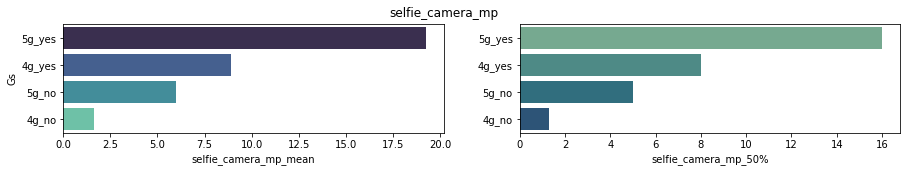

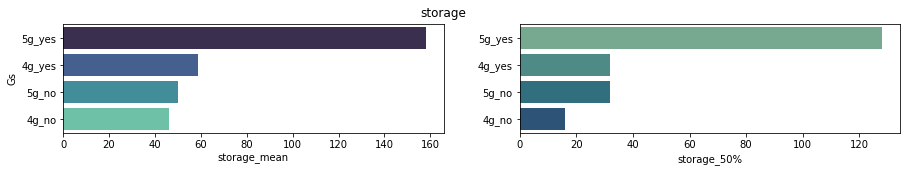

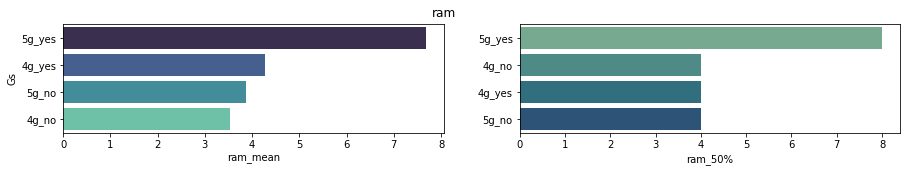

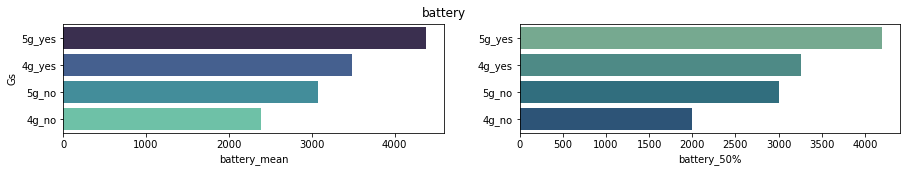

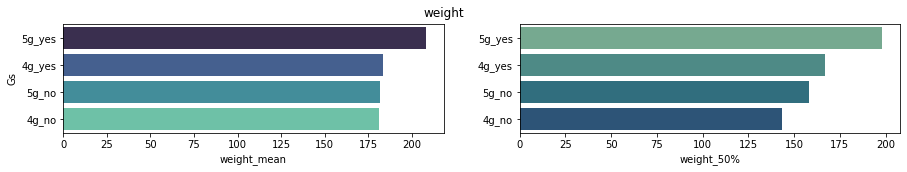

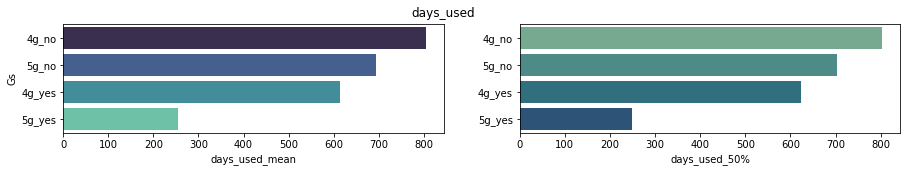

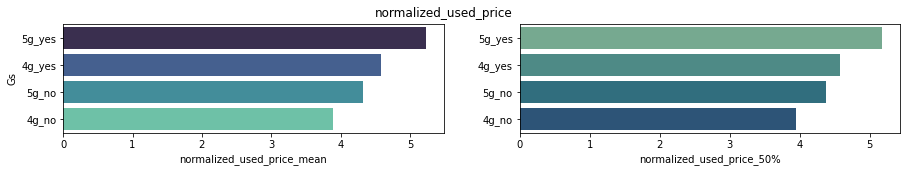

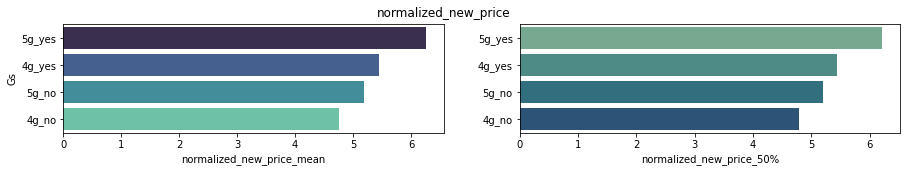

In [95]:
Geez=pd.DataFrame() #create a new dataframe, add the 4G and 5G options as a column
Geez['Gs']=['4g_no','4g_yes','5g_no','5g_yes']
templist=[]
for column in cell.describe().columns.drop(['release_year','4g','5g_and_4g']):
    for subcolumn in ['mean','50%']:
        if subcolumn=='mean':
            templist=[]
            for item in [list(cell.groupby('4g')[column].mean()),list(cell.groupby('5g_and_4g')[column].mean())]:
                for item2 in item:
                    templist.append(item2)    
            Geez[column+'_'+subcolumn]=templist
        elif subcolumn=='50%':
            templist=[]
            for item in [list(cell.groupby('4g')[column].median()),list(cell.groupby('5g_and_4g')[column].median())]:
                for item2 in item:
                    templist.append(item2)  
            Geez[column+'_'+subcolumn]=templist

columnlist=[]
for column in cell.describe().columns.drop(['release_year','4g','5g_and_4g']):
    columnlist=[]
    for Gcolumn in Geez.columns:
        if Gcolumn.startswith(column)==True:
            columnlist.append(Gcolumn)    
            
    fig=plt.figure()
    fig.add_subplot(1,2,1)
    sns.barplot(data=Geez.loc[:,['Gs',columnlist[0]]],x=columnlist[0],y='Gs',palette='mako',order=
            Geez.loc[:,['Gs',columnlist[0]]].sort_values(columnlist[0],ascending=False).Gs)
    fig.add_subplot(1,2,2)
    sns.barplot(data=Geez.loc[:,['Gs',columnlist[1]]],x=columnlist[1],y='Gs',palette='crest',order=
            Geez.loc[:,['Gs',columnlist[1]]].sort_values(columnlist[1],ascending=False).Gs).set(ylabel='')
    plt.title(column,x=-0.2,y=1.01)
    plt.gcf().set_size_inches(15,2)
del columnlist
del templist
del Geez

### 5G devices seem to top every numerical metric (except for Main Camera MP, which is strange since 5G enabled devices cost more on average).
### 5G enabled devices have MUCH better selfie cameras, RAM and storage than the competition, however.
### Devices without 4G capabilities are at the lowest position of each metric.
    days_used is an exception, but it's worse to be 1st in this metric anyways.
    RAM median is also a 3 way tie for lowest at 4GB.
    
### The only positives non-4G devices hold are lowest price (new and used) and lowest weight.

---
## 4G and 5G vs Release Year

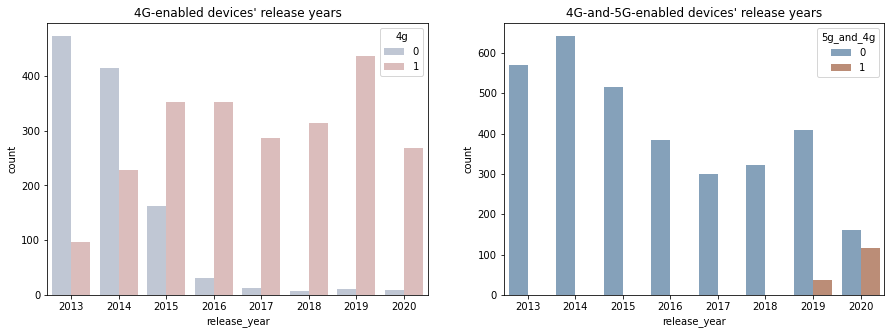

In [96]:
# Create a set of subplots for 4g and 5g_and_4g separately.

fig=plt.figure()

fig.add_subplot(1,2,1)
sns.barplot(data=
           pd.DataFrame(cell.groupby('release_year')['4g'].value_counts(sort=False)).rename(columns={'4g':'count'}).reset_index(),
           x='release_year',y='count',hue='4g',palette='vlag')
plt.title("4G-enabled devices' release years")

fig.add_subplot(1,2,2)
sns.barplot(data=
           pd.DataFrame(cell.groupby('release_year')['5g_and_4g'].value_counts(sort=False)).rename(columns={'5g_and_4g':'count'}).reset_index(),
           x='release_year',y='count',hue='5g_and_4g',palette='twilight_shifted')
plt.title("4G-and-5G-enabled devices' release years")

plt.gcf().set_size_inches(15,5)

### The only 5g devices are from 2019 and 2020, which makes sense.

### Let's see how the ratio of 4G-enabled phones changes from year to year.

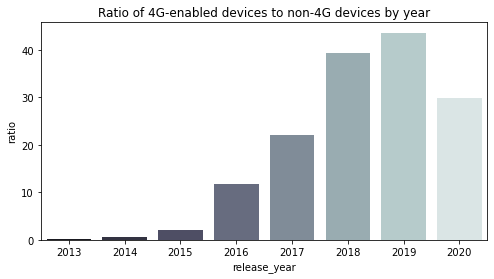

In [97]:
loop=pd.DataFrame(cell.groupby('release_year')['4g'].value_counts(sort=False)).rename(columns={'4g':'count'}).reset_index()
loop #counts of 4g disabled and 4g enabled devices by year. To be used in a loop.

years=list(cell['release_year'].unique())
years.sort() #list of all of the years in the dataset.

ratio={ #open dictionary to be turned into a pandas dataframe once we're done with the loop.
    
}

for year in years:
    ratio[year]=(loop[loop['release_year']==year]['count'].iloc[1]/loop[loop['release_year']==year]['count'].iloc[0])
ratio=pd.DataFrame().append(ratio,ignore_index=True).T
ratio=ratio.reset_index().rename(columns={'index':'release_year',0:'ratio'})
ratio

sns.barplot(data=ratio,x='release_year',y='ratio',palette='bone')
plt.title('Ratio of 4G-enabled devices to non-4G devices by year')
plt.gcf().set_size_inches(8,4)

del years
del loop
del ratio

### As year goes up, the ratio of 4G-enabled devices goes up.
### However, this changes in 2020, where it drops to 2017-2018 levels. This is strange, as this ratio includes 5G enabled devices<sup>1</sup>, so the drop can't be attributed to a transition to 5G devices<sup>2</sup>.
    1) All 5G devices are also 4G enabled, so a ratio of all 4G devices will include the 5g_and_4g phones as well.
    2) If there was a 1-to-1 transition of 4G to 5G devices, we would see a similar ratio to 2019 in 2020.
        This drop in ratio shows us more 4G devices were dropped than 5G devices added in 2020.
## Let's make a quick plot of the counts of non-4G devices, by brand, by year.

## Brand vs No4G vs Release_Year

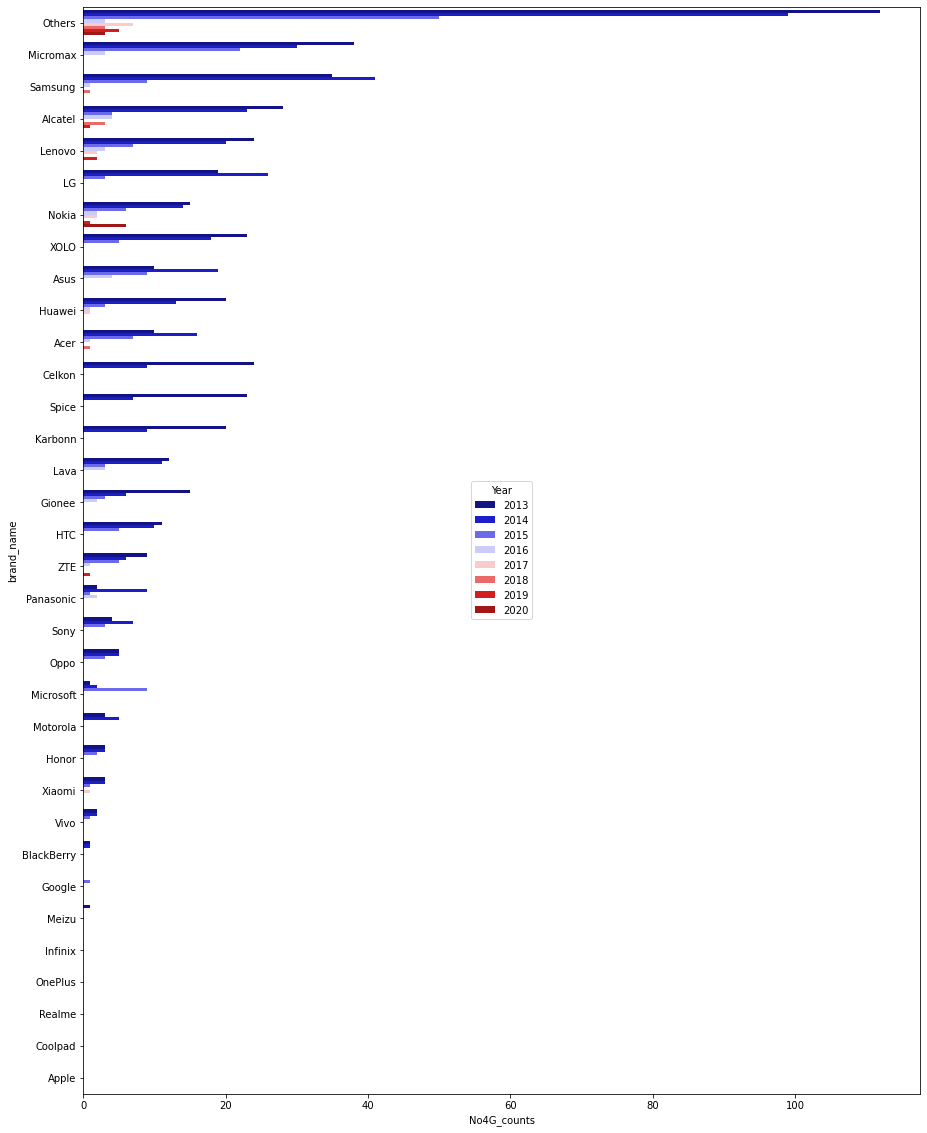

In [98]:
No4G=cell[cell['4g']==0].copy() #copy of the dataframe, but only non-4G devices.
No4G['release_year']=No4G['release_year'].astype('category') #change year to category to allow for a value_counts.
No4G=pd.DataFrame(No4G.groupby('brand_name')['release_year'].value_counts())
No4G=No4G.reset_index().rename(columns={'level_1':'release_year','release_year':'No4G_counts'})
No4G

sns.barplot(data=No4G,y='brand_name',x='No4G_counts',hue='release_year',palette='seismic',order=
    pd.DataFrame(cell[cell['4g']==0]['brand_name'].value_counts(sort=True)).index.values
)
plt.legend(loc='center',title='Year')
plt.gcf().set_size_inches(15,20)

In [99]:
No4G[No4G['release_year']==2020][No4G[No4G['release_year']==2020]['No4G_counts']>0]

brand_name release_year  No4G_counts
171      Nokia         2020            6
199     Others         2020            3

In [100]:
del No4G

### There is a sharp increase apparent in the plot of Nokia devices in 2020. No other brand has this sharp increase in non-4G devices in 2020.
### This is likely what causes the ratio of non-4G devices to decrease sharply in 2020.
---
### Now that we're done with the categorical variables, let's go back to numerical for a moment.
# 4) Weight vs Battery
    A quick lmplot.

weight  battery
weight  1.00000  0.70339
battery 0.70339  1.00000

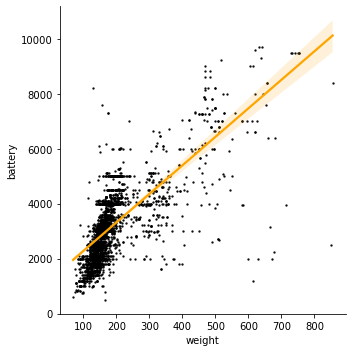

In [101]:
sns.lmplot(data=cell,x='weight',y='battery',line_kws={'color':'orange'},scatter_kws={"s": 2,'color':'black'})
cell[['weight','battery']].corr()

### Weight and battery have a decent 0.703 correlation.
### Let's check the higher ends of Weight and Battery, to see if the correlation becomes stronger.

weight  battery
weight  1.00000  0.75762
battery 0.75762  1.00000

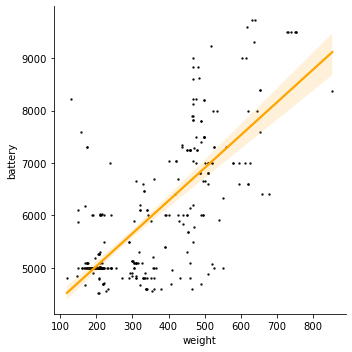

In [102]:
sns.lmplot(data=cell[cell['battery']>4500][['weight','battery']],x='weight',y='battery',line_kws={'color':'orange'},scatter_kws={"s": 2,'color':'black'})
cell[cell['battery']>4500][['weight','battery']].corr()

### Overall, the correlation increases to 0.758.

### Strangely enough, there are a few outliers with over 7000mAh and under 200g.

In [103]:
cell[cell['battery']>4500][cell[cell['battery']>4500]['weight']<200].sort_values('battery',ascending=False).head(10)

brand_name       os  screen_size  4g  5g_and_4g  main_camera_mp  \
2608    Samsung  Android     25.43000   1          0         8.00000   
2781      Spice  Android     25.40000   0          0         3.15000   
2376    Samsung  Android     25.53000   1          0         8.00000   
2375    Samsung  Android     25.53000   1          0        13.00000   
842      Others  Android     12.83000   1          0        13.00000   
423        Acer  Android     25.43000   0          0         5.00000   
3434    Samsung  Android     15.34000   1          0        12.00000   
3419    Samsung  Android     15.34000   1          0         8.00000   
2478    Samsung  Android     23.04000   1          0         8.00000   
1487     Lenovo  Android     17.65000   1          0        13.00000   

      selfie_camera_mp  storage     ram    battery    weight  release_year  \
2608           2.00000 16.00000 4.00000 8220.00000 130.40000          2013   
2781           0.30000 16.00000 4.00000 7600.00000 158.00000          2013   
2376           5.00000 32.00000 4.00000 7300.00000 175.00000          2018   
2375           8.00000 64.00000 4.00000 7300.00000 175.00000          2018   
842            8.00000 64.00000 4.00000 6180.00000 167.50000          2017   
423            2.00000 16.00000 4.00000 6100.00000 147.50000          2016   
3434          16.00000 64.00000 4.00000 6000.00000 188.00000          2019   
3419          32.00000 64.00000 6.00000 6000.00000 191.00000          2020   
2478           2.10000 32.00000 4.00000 5870.00000 150.00000          2015   
1487           5.00000 64.00000 4.00000 5180.00000 195.00000          2019   

      days_used  normalized_used_price  normalized_new_price  
2608        971                4.77382               5.91558  
2781        917                4.39173               5.18928  
2376        453                4.47495               5.63243  
2375        487                4.83644               6.36203  
842         720                4.42221               5.51524  
423         570                4.33768               5.43977  
3434        455                4.78164               5.10994  
3419        190                4.75497               5.27515  
2478        913                4.21641               5.98999  
1487        502                4.77424               5.52318

### The screen sizes indicate most of these products are tablets. This would make sense; Tablets have larger screen, and therefore use more power and need larger batteries.
### However, they are also lightweight, and looking up some of these products based on description and brand bring up mostly tablets labeled 'light'.
### For the most part, as battery capacity increases, weight increases as larger batteries tend to be heavier.
    While the range of weights doesn't change much above 4500mAh, the mean and median both nearly double.

In [104]:
#device weight across the board.

cell[['weight']].agg(['mean','median','min','max'])

weight
mean   182.75187
median 160.00000
min     69.00000
max    855.00000

In [105]:
#device weight above 4500mAh.

cell[cell['battery']>4500][['weight']].agg(['mean','median','min','max'])

weight
mean   332.27566
median 300.00000
min    118.00000
max    855.00000

### Something important to note before moving on, the used prices of the high battery/low weight devices aren't that far off of the average or median device price. This seems to indicate that people don't tend to spend more for weight-and-battery-optimized devices.
    IE: While the heatmap indicated there may be correlation between battery and used price,
    there doesn't seem to be any change when taking into account devices that have
    both high batteries and low weights.

In [106]:
print(f"The mean normalized used price for devices with >4500mAh batteries is {round(cell[cell['battery']>4500][cell[cell['battery']>4500]['weight']<200]['normalized_used_price'].mean(),2)}.")
print(f"The mean normalized used price for the 10 lightest devices with >4500mAh batteries is {round(cell[cell['battery']>4500][cell[cell['battery']>4500]['weight']<200].sort_values('battery',ascending=False).head(10)['normalized_used_price'].mean(),2)}.")
print(f"That's only an increase of {round(cell[cell['battery']>4500][cell[cell['battery']>4500]['weight']<200].sort_values('battery',ascending=False).head(10)['normalized_used_price'].mean()/cell[cell['battery']>4500][cell[cell['battery']>4500]['weight']<200]['normalized_used_price'].mean()-1,2)}%.")






The mean normalized used price for devices with >4500mAh batteries is 4.55.
The mean normalized used price for the 10 lightest devices with >4500mAh batteries is 4.58.
That's only an increase of 0.01%.


---
# 5) Normalized Used Price vs All Attributes

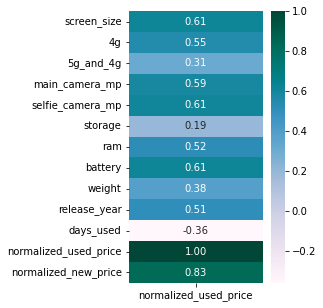

In [107]:
sns.heatmap(data=pd.DataFrame(cell.corr()['normalized_used_price']),annot=True,fmt='0.2f',cmap='PuBuGn')
plt.gcf().set_size_inches(3,5)

### The highest correlations here are normalized_new_price, battery, selfie_camera_mp, and screen_size.
#### Let's plot the normalized_new_price heatmap quickly to compare.

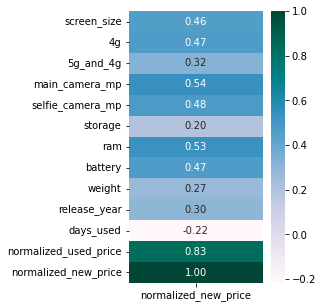

In [108]:
sns.heatmap(data=pd.DataFrame(cell.corr()['normalized_new_price']),annot=True,fmt='0.2f',cmap='PuBuGn')
plt.gcf().set_size_inches(3,5)

### Something interesting to note is that new prices correlate differently to the attributes than used prices.
- Main camera has higher correlation with new price than selfie cam, but that's the opposite with used devices.  
- Battery has much lower correlation with new price than used price.  
- Release year has a much higher correlation with used price.  
    ie: the price falls off harder in the used market when a phone gets older.  
- Screen Size is one of the lower correlations in New price, but is second highest with used price.  
- 4G has higher correlation in the used market.  
### Let's check the highest and lowest priced brands in the used markets.
---

In [109]:
pd.DataFrame(cell.groupby(['brand_name'])['normalized_used_price'].mean().sort_values(ascending=False)).head()

normalized_used_price
brand_name                       
OnePlus                   5.15217
Apple                     5.00455
Google                    4.88565
Vivo                      4.77815
Oppo                      4.75525

In [110]:
pd.DataFrame(cell.groupby(['brand_name'])['normalized_used_price'].mean().sort_values(ascending=False)).tail()

normalized_used_price
brand_name                       
Lava                      3.85453
Karbonn                   3.77496
Micromax                  3.76186
Spice                     3.69451
Celkon                    3.23089

### Celkon being at the bottom was expected, as they had the worst stats in the Brand/Numerical bivariate analysis.
### OnePlus, Apple, and Google have the most expensive phones and tablets on the market.
---
### Next, used prices and OS.

In [111]:
pd.DataFrame(cell.groupby(['os'])['normalized_used_price'].mean().sort_values(ascending=False))

normalized_used_price
os                            
iOS                    4.95651
Android                4.40757
Windows                4.15452
Others                 3.30656

### iOS is the most expensive operating system by far, followed by Android. 'Others' is far below the other 3, which tells me a large part of this section is probably made up of small businesses or defunct, old companies.
    Looking back at Brand vs OS, we can see a large part of this section is the 'Others' brands,
    but more well-known brands like Samsung are also a part of it.
---
# EDA Round 1 Conclusions:
1) Used Price is currently correlated with Battery life, New Price, Selfie Camera Fidelity, and Screen Size.  
    - All of these are fairly intuitive correlations, but we have yet to manipulate the data, so we will refrain from conclusions.  
2) Android is by far the most used operating system, iOS is by far the most expensive.  
3) Huawei is consistently the best brand in metrics, but also more expensive than average.  
4) There are more missing brands than any other single labeled brand.  
5) Popular brands sell more newer phones on the used market than 'Others'/no-name brands (see: Brand vs Release Year).  
6) By far the most common RAM quantity across the board is 4GB.  
7) 5G devices tend to perform better than 4G devices, and 4G devices tend to perform better non-4G devices.  
	- There are some exceptions to this, like 4G main cameras having highest average fidelity.  
8) Outside of a spike in Nokia phones without 4G in 2020, the newer the phone, the more likely it is to have 4G.  
9) While weight correlates well with battery, weight doesn't seem to correlate well to used price.  
---
---
---

# <span style="font-size:larger">Data Preprocessing</span>

- Missing value treatment ✓
- Feature engineering (if needed) ✓
- Outlier detection and treatment (if needed) ✓
- Preparing data for modeling 
- Any other preprocessing steps (if needed) ✓

## 1) Feature Engineering
### The only possible targets for feature engineering are main camera MP and selfie camera MP, as they are the only real-world related independent numerical columns.
#### To start, I will be filling in the NaN values (early missing value treatment) of both columns.
#### Selfie Camera MP only had missing values from Google, so I will fill in the NaNs for this column based off of Google's median selfie_camera_mp value.

In [112]:
cell['selfie_camera_mp'].fillna(cell[cell['brand_name']=='Google']['selfie_camera_mp'].median(),inplace=True)
cell['selfie_camera_mp'].isnull().sum()

0

### Main Camera MP had a much wider range of missing values, 129. We will be filling these null counts in with the Android median main_camera_mp value.
    All of the null values are in the Android OS.

In [113]:
cell[cell['main_camera_mp'].isnull()]['os'].value_counts()

Android    179
Others       0
Windows      0
iOS          0
Name: os, dtype: int64

In [114]:
cell['main_camera_mp'].fillna(cell[cell['os']=='Android']['main_camera_mp'].median(),inplace=True)
cell['main_camera_mp'].isnull().sum()

0

###  I do not believe we should combine the two columns, as Selfie_Camera_MP and Main_Camera_MP only share a 0.43 correlation. If they were more correlated, we could drop one or even combine them as an Average_Camera_MP column.
### Their correlations with the new vs the used prices being so different tells me that leaving them as separate columns will be beneficial to the Linear Regression Model.
---
## 2) Data Transformation
### The 3 candidates for data transformation are Storage, RAM, and Weight.

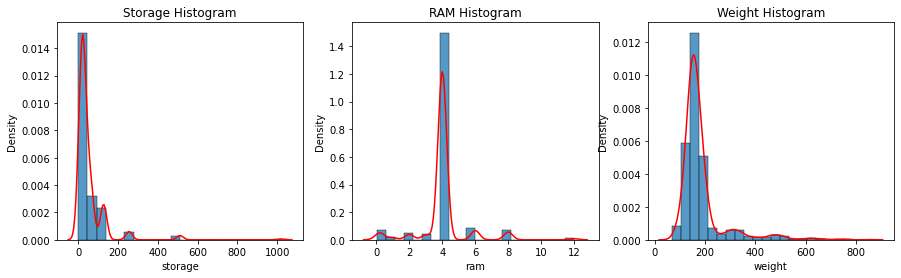

In [115]:
fig=plt.figure()

fig.add_subplot(1,3,1)
sns.histplot(data=cell,x='storage',stat="density",bins=22)
sns.kdeplot(data=cell,x='storage',color='r')
plt.title('Storage Histogram')

fig.add_subplot(1,3,2)
sns.histplot(data=cell,x='ram',stat="density",bins=22)
sns.kdeplot(data=cell,x='ram',color='r')
plt.title('RAM Histogram')

fig.add_subplot(1,3,3)
sns.histplot(data=cell,x='weight',stat="density",bins=22)
sns.kdeplot(data=cell,x='weight',color='r')
plt.title('Weight Histogram')

plt.gcf().set_size_inches(15,4)



### We will attempt to transform these variables with log.

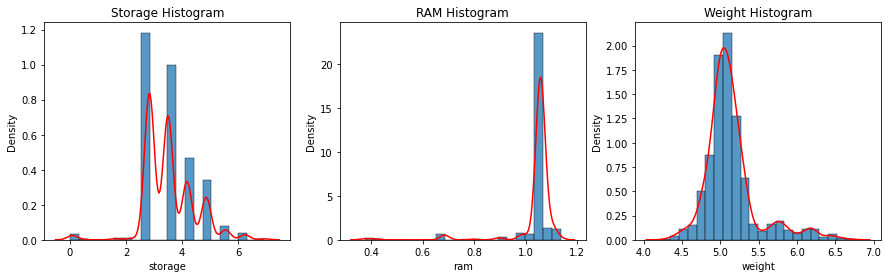

In [116]:
fig=plt.figure()

fig.add_subplot(1,3,1)
sns.histplot(data=cell,x=(cell['storage']+1).apply(np.log),stat="density",bins=22) # < +1 because some of the storage #s are
sns.kdeplot(data=cell,x=(cell['storage']+1).apply(np.log),color='r')               # very low decimals, spreads the data out
plt.title('Storage Histogram')                                                     # too much in the negative direction

fig.add_subplot(1,3,2)
sns.histplot(data=cell,x=(cell['ram']+1).apply(np.log).apply(np.arcsinh).apply(np.sqrt).apply(np.sqrt),stat="density",bins=22)
sns.kdeplot(data=cell,x=(cell['ram']+1).apply(np.log).apply(np.arcsinh).apply(np.sqrt).apply(np.sqrt),color='r')
plt.title('RAM Histogram')

fig.add_subplot(1,3,3)
sns.histplot(data=cell,x=cell['weight'].apply(np.log),stat="density",bins=22)
sns.kdeplot(data=cell,x=cell['weight'].apply(np.log),color='r')
plt.title('Weight Histogram')

plt.gcf().set_size_inches(15,4)

### The RAM plot is unfortunately, extremely resistant to all transformations I am aware of.

### Let's finish up with storage and weight and move on to Binning, the only solution I can think of to our RAM problem.

In [117]:
cell['storage_log+1']=(cell['storage']+1).apply(np.log)
cell['weight_log']=cell['weight'].apply(np.log)
cell.drop(['storage','weight'],axis=1,inplace=True)
cell

brand_name       os  screen_size  4g  5g_and_4g  main_camera_mp  \
0         Honor  Android     14.50000   1          0        13.00000   
1         Honor  Android     17.30000   1          1        13.00000   
2         Honor  Android     16.69000   1          1        13.00000   
3         Honor  Android     25.50000   1          1        13.00000   
4         Honor  Android     15.32000   1          0        13.00000   
...         ...      ...          ...  ..        ...             ...   
3449       Asus  Android     15.34000   1          0         8.10000   
3450       Asus  Android     15.24000   1          0        13.00000   
3451    Alcatel  Android     15.80000   1          0        13.00000   
3452    Alcatel  Android     15.80000   1          0        13.00000   
3453    Alcatel  Android     12.83000   1          0        13.00000   

      selfie_camera_mp     ram    battery  release_year  days_used  \
0              5.00000 3.00000 3020.00000          2020        127   
1             16.00000 8.00000 4300.00000          2020        325   
2              8.00000 8.00000 4200.00000          2020        162   
3              8.00000 6.00000 7250.00000          2020        345   
4              8.00000 3.00000 5000.00000          2020        293   
...                ...     ...        ...           ...        ...   
3449           8.00000 6.00000 5000.00000          2019        232   
3450           8.00000 8.00000 4000.00000          2018        541   
3451           5.00000 3.00000 4000.00000          2020        201   
3452           5.00000 2.00000 4000.00000          2020        149   
3453           5.00000 2.00000 4000.00000          2020        176   

      normalized_used_price  normalized_new_price  storage_log+1  weight_log  
0                   4.30757               4.71510        4.17439     4.98361  
1                   5.16210               5.51902        4.85981     5.36129  
2                   5.11108               5.88463        4.85981     5.36129  
3                   5.13539               5.63096        4.17439     6.17379  
4                   4.38999               4.94784        4.17439     5.22036  
...                     ...                   ...            ...         ...  
3449                4.49234               6.48387        4.17439     5.24702  
3450                5.03773               6.25154        4.85981     5.29832  
3451                4.35735               4.52883        3.49651     5.10595  
3452                4.34976               4.62419        3.49651     5.07517  
3453                4.13212               4.27999        2.83321     5.12396  

[3454 rows x 15 columns]

---
## 3) Binning
### We will be binning RAM in 3 bins:
1) Below 4GB  
2) 4GB  
3) Above 4GB

In [118]:
templist=[]
for i in range(cell.shape[0]):
    if cell['ram'][i] <4:
        templist.append('below_4gb_ram')
    elif cell['ram'][i] ==4:
        templist.append('4gb_ram')
    elif cell['ram'][i]>4:
        templist.append('above_4gb_ram')
    else:
        templist.append('unknown_ram')
cell['ram']=templist
del templist
cell

brand_name       os  screen_size  4g  5g_and_4g  main_camera_mp  \
0         Honor  Android     14.50000   1          0        13.00000   
1         Honor  Android     17.30000   1          1        13.00000   
2         Honor  Android     16.69000   1          1        13.00000   
3         Honor  Android     25.50000   1          1        13.00000   
4         Honor  Android     15.32000   1          0        13.00000   
...         ...      ...          ...  ..        ...             ...   
3449       Asus  Android     15.34000   1          0         8.10000   
3450       Asus  Android     15.24000   1          0        13.00000   
3451    Alcatel  Android     15.80000   1          0        13.00000   
3452    Alcatel  Android     15.80000   1          0        13.00000   
3453    Alcatel  Android     12.83000   1          0        13.00000   

      selfie_camera_mp            ram    battery  release_year  days_used  \
0              5.00000  below_4gb_ram 3020.00000          2020        127   
1             16.00000  above_4gb_ram 4300.00000          2020        325   
2              8.00000  above_4gb_ram 4200.00000          2020        162   
3              8.00000  above_4gb_ram 7250.00000          2020        345   
4              8.00000  below_4gb_ram 5000.00000          2020        293   
...                ...            ...        ...           ...        ...   
3449           8.00000  above_4gb_ram 5000.00000          2019        232   
3450           8.00000  above_4gb_ram 4000.00000          2018        541   
3451           5.00000  below_4gb_ram 4000.00000          2020        201   
3452           5.00000  below_4gb_ram 4000.00000          2020        149   
3453           5.00000  below_4gb_ram 4000.00000          2020        176   

      normalized_used_price  normalized_new_price  storage_log+1  weight_log  
0                   4.30757               4.71510        4.17439     4.98361  
1                   5.16210               5.51902        4.85981     5.36129  
2                   5.11108               5.88463        4.85981     5.36129  
3                   5.13539               5.63096        4.17439     6.17379  
4                   4.38999               4.94784        4.17439     5.22036  
...                     ...                   ...            ...         ...  
3449                4.49234               6.48387        4.17439     5.24702  
3450                5.03773               6.25154        4.85981     5.29832  
3451                4.35735               4.52883        3.49651     5.10595  
3452                4.34976               4.62419        3.49651     5.07517  
3453                4.13212               4.27999        2.83321     5.12396  

[3454 rows x 15 columns]

In [119]:
cell['ram'].value_counts()

4gb_ram          2815
below_4gb_ram     333
above_4gb_ram     302
unknown_ram         4
Name: ram, dtype: int64

In [120]:
cell.describe(include="all").T

count unique      top  freq       mean        std  \
brand_name                  3454     34   Others   502        NaN        NaN   
os                          3454      4  Android  3214        NaN        NaN   
screen_size           3454.00000    NaN      NaN   NaN   13.71312    3.80528   
4g                    3454.00000    NaN      NaN   NaN    0.67603    0.46806   
5g_and_4g             3454.00000    NaN      NaN   NaN    0.04401    0.20514   
main_camera_mp        3454.00000    NaN      NaN   NaN    9.38972    4.69867   
selfie_camera_mp      3454.00000    NaN      NaN   NaN    6.55507    6.96844   
ram                         3454      4  4gb_ram  2815        NaN        NaN   
battery               3448.00000    NaN      NaN   NaN 3133.40270 1299.68284   
release_year          3454.00000    NaN      NaN   NaN 2015.96526    2.29845   
days_used             3454.00000    NaN      NaN   NaN  674.86972  248.58017   
normalized_used_price 3454.00000    NaN      NaN   NaN    4.36471    0.58891   
normalized_new_price  3454.00000    NaN      NaN   NaN    5.23311    0.68364   
storage_log+1         3450.00000    NaN      NaN   NaN    3.53969    0.90247   
weight_log            3447.00000    NaN      NaN   NaN    5.13647    0.34231   

                             min        25%        50%        75%        max  
brand_name                   NaN        NaN        NaN        NaN        NaN  
os                           NaN        NaN        NaN        NaN        NaN  
screen_size              5.08000   12.70000   12.83000   15.34000   30.71000  
4g                       0.00000    0.00000    1.00000    1.00000    1.00000  
5g_and_4g                0.00000    0.00000    0.00000    0.00000    1.00000  
main_camera_mp           0.08000    5.00000    8.10000   13.00000   48.00000  
selfie_camera_mp         0.00000    2.00000    5.00000    8.00000   32.00000  
ram                          NaN        NaN        NaN        NaN        NaN  
battery                500.00000 2100.00000 3000.00000 4000.00000 9720.00000  
release_year          2013.00000 2014.00000 2015.50000 2018.00000 2020.00000  
days_used               91.00000  533.50000  690.50000  868.75000 1094.00000  
normalized_used_price    1.53687    4.03393    4.40513    4.75570    6.61943  
normalized_new_price     2.90142    4.79034    5.24589    5.67372    7.84784  
storage_log+1            0.00995    2.83321    3.49651    4.17439    6.93245  
weight_log               4.23411    4.95583    5.07517    5.22036    6.75110

### So far, so good. We will be making dummy columns for all of these new categoricals later.
----
## 4) Standardize Variables
### We will transform all continuous variables into standardized ones.
## Screen Size Standardization
#### Before we start, I need to fill weight_log's NaN values. It will be much harder to do after standardization.
#### The fill will be done with the XOLO brand's weight mean, but only with the phone-sized devices. More information about this decision back in Univariate Weight Analysis.

In [121]:
cell['weight_log'].fillna(cell[cell['brand_name']=='XOLO'][cell[cell['brand_name']=='XOLO']['screen_size']<15]['weight_log'].mean(),inplace=True)

0       0.20682
1       0.94274
2       0.78242
3       3.09796
4       0.42234
         ...   
3449    0.42760
3450    0.40131
3451    0.54850
3452    0.54850
3453   -0.23211
Name: screen_size, Length: 3454, dtype: float64

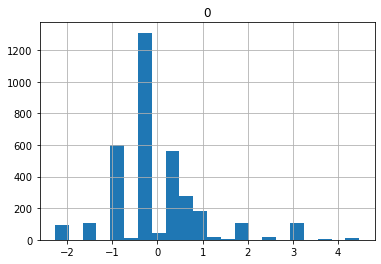

In [122]:
std_scaler=StandardScaler()

pd.DataFrame(std_scaler.fit_transform(cell[['screen_size']])).hist(bins=22)

cell['screen_size']=std_scaler.fit_transform(cell[['screen_size']])
cell['screen_size']

## Battery Standardization

0      -0.08727
1       0.89773
2       0.82078
3       3.16785
4       1.43640
         ...   
3449    1.43640
3450    0.66687
3451    0.66687
3452    0.66687
3453    0.66687
Name: battery, Length: 3454, dtype: float64

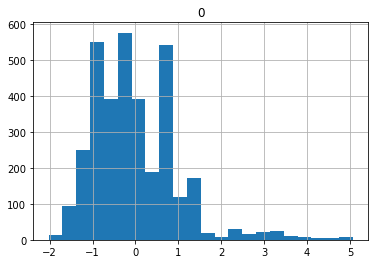

In [123]:
std_scaler=StandardScaler()

pd.DataFrame(std_scaler.fit_transform(cell[['battery']])).hist(bins=22)

cell['battery']=std_scaler.fit_transform(cell[['battery']])
cell['battery']

## Days Used Standardization

0      -2.20432
1      -1.40768
2      -2.06350
3      -1.32721
4      -1.53643
         ...   
3449   -1.78186
3450   -0.53862
3451   -1.90658
3452   -2.11580
3453   -2.00717
Name: days_used, Length: 3454, dtype: float64

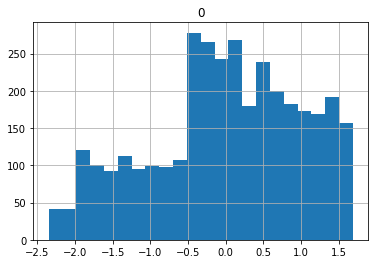

In [124]:
std_scaler=StandardScaler()

pd.DataFrame(std_scaler.fit_transform(cell[['days_used']])).hist(bins=22)

cell['days_used']=std_scaler.fit_transform(cell[['days_used']])
cell['days_used']

## Main Camera MP Standardization

0       0.76847
1       0.76847
2       0.76847
3       0.76847
4       0.76847
         ...   
3449   -0.27452
3450    0.76847
3451    0.76847
3452    0.76847
3453    0.76847
Name: main_camera_mp, Length: 3454, dtype: float64

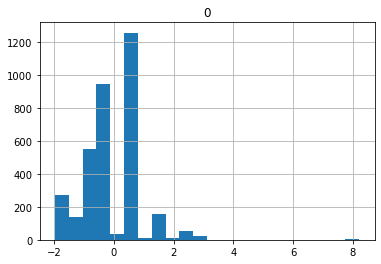

In [125]:
std_scaler=StandardScaler()

pd.DataFrame(std_scaler.fit_transform(cell[['main_camera_mp']])).hist(bins=22)

cell['main_camera_mp']=std_scaler.fit_transform(cell[['main_camera_mp']])
cell['main_camera_mp']

## Selfie Camera MP Standardization

0      -0.22319
1       1.35558
2       0.20738
3       0.20738
4       0.20738
         ...   
3449    0.20738
3450    0.20738
3451   -0.22319
3452   -0.22319
3453   -0.22319
Name: selfie_camera_mp, Length: 3454, dtype: float64

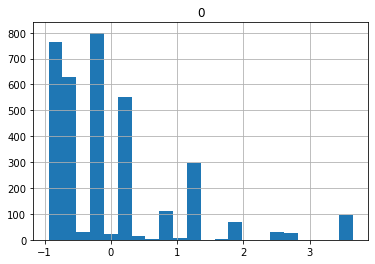

In [126]:
std_scaler=StandardScaler()

pd.DataFrame(std_scaler.fit_transform(cell[['selfie_camera_mp']])).hist(bins=22)

cell['selfie_camera_mp']=std_scaler.fit_transform(cell[['selfie_camera_mp']])
cell['selfie_camera_mp']

## Storage_log+1 Standardization

0       0.70338
1       1.46299
2       1.46299
3       0.70338
4       0.70338
         ...   
3449    0.70338
3450    1.46299
3451   -0.04786
3452   -0.04786
3453   -0.78294
Name: storage_log+1, Length: 3454, dtype: float64

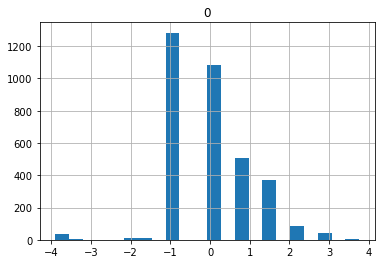

In [127]:
std_scaler=StandardScaler()

pd.DataFrame(std_scaler.fit_transform(cell[['storage_log+1']])).hist(bins=22)

cell['storage_log+1']=std_scaler.fit_transform(cell[['storage_log+1']])
cell['storage_log+1']

## Weight_log Standardization

0      -0.44538
1       0.65865
2       0.65865
3       3.03371
4       0.24667
         ...   
3449    0.32463
3450    0.47457
3451   -0.08777
3452   -0.17772
3453   -0.03510
Name: weight_log, Length: 3454, dtype: float64

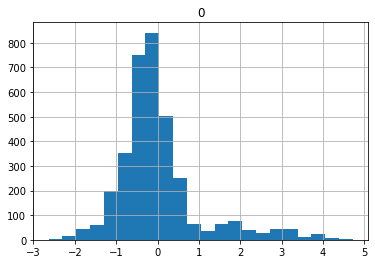

In [128]:
std_scaler=StandardScaler()

pd.DataFrame(std_scaler.fit_transform(cell[['weight_log']])).hist(bins=22)

cell['weight_log']=std_scaler.fit_transform(cell[['weight_log']])
cell['weight_log']

---
## 5) Missing Value Treatment
    Because there was no rhyme or reason to the battery nan values,
    I will fill it with the mean of the whole data set.

In [129]:
cell['battery'].fillna(cell['battery'].mean(),inplace=True)

In [130]:
#Filling storage_log+1's missing values with Nokia's mean storages
#because all of the missing values were Nokia brand.

cell['storage_log+1'].fillna((cell[cell['brand_name']=='Nokia'])['storage_log+1'].mean(),inplace=True)

### Like I discussed in int_memory and ram univariate analysis, all of the missing/unknown ram values are from Nokia, and they all appear to be very low-storage models.

In [131]:
cell[cell['brand_name']=='Nokia']['ram'].value_counts()

4gb_ram          51
below_4gb_ram    49
unknown_ram       4
above_4gb_ram     2
Name: ram, dtype: int64

### This one isn't as clear-cut. Let's sort by Nokia storage again, only including lower values.

In [132]:
cell[cell['brand_name']=='Nokia'][cell[cell['brand_name']=='Nokia']['storage_log+1']<-3.81].sort_values('ram',ascending=False)

brand_name      os  screen_size  4g  5g_and_4g  main_camera_mp  \
114       Nokia  Others     -2.24277   0          0        -1.93481   
2090      Nokia  Others     -1.60146   0          0        -0.93438   
335       Nokia  Others     -2.24277   0          0        -1.93481   
2059      Nokia  Others     -2.24277   0          0        -1.93481   
113       Nokia  Others     -2.24277   0          0        -1.93481   
2095      Nokia  Others     -2.24277   0          0        -0.93438   
2084      Nokia  Others     -2.24277   0          0        -1.57295   
2091      Nokia  Others     -1.60146   0          0        -0.93438   
2093      Nokia  Others     -2.21648   0          0        -1.57295   
2094      Nokia  Others     -2.21648   0          0        -1.57295   
2098      Nokia  Others     -2.24277   0          0        -1.72195   
2075      Nokia  Others     -2.21648   0          0        -1.57295   
2099      Nokia  Others     -2.24277   0          0        -0.93438   
2102      Nokia  Others     -1.60146   0          0        -1.32817   
2103      Nokia  Others     -2.24277   0          0        -1.57295   
2106      Nokia  Others     -2.24277   0          0        -1.32817   
2107      Nokia  Others     -1.60146   0          0        -1.57295   
3246      Nokia  Others     -2.21648   1          0        -1.57295   
2083      Nokia  Others     -2.21648   0          0        -1.72195   
2065      Nokia  Others     -2.24277   0          0        -1.93481   
2074      Nokia  Others     -2.21648   0          0        -1.57295   
2063      Nokia  Others     -2.24277   0          0        -1.57295   
2062      Nokia  Others     -2.24277   0          0        -1.57295   
2061      Nokia  Others     -2.21648   0          0        -1.57295   
2060      Nokia  Others     -2.21648   0          0        -1.57295   
2058      Nokia  Others     -2.24277   0          0        -1.93481   
2057      Nokia  Others     -2.24277   0          0        -1.57295   
2052      Nokia  Others     -2.24277   0          0        -1.57295   
2049      Nokia  Others     -2.24277   1          0        -1.57295   
2044      Nokia  Others     -2.24277   1          0        -1.57295   
336       Nokia  Others     -2.24277   1          0        -1.93481   
333       Nokia  Others     -2.24277   0          0        -1.93481   
332       Nokia  Others     -2.24277   0          0        -1.93481   
116       Nokia  Others     -2.24277   0          0        -1.93481   
3387      Nokia  Others     -2.21648   1          0        -1.57295   

      selfie_camera_mp            ram  battery  release_year  days_used  \
114           -0.94082    unknown_ram -1.62633          2020   -1.55654   
2090          -0.94082    unknown_ram -1.48781          2013    1.31216   
335           -0.94082    unknown_ram -1.48781          2020   -1.39963   
2059          -0.94082    unknown_ram -0.00000          2016    1.40068   
113           -0.94082  below_4gb_ram -1.62633          2020   -1.62092   
2095          -0.94082  below_4gb_ram -1.48781          2013    0.75693   
2084          -0.94082  below_4gb_ram -1.00301          2014   -0.44205   
2091          -0.94082  below_4gb_ram -1.48781          2013    1.25583   
2093          -0.94082  below_4gb_ram -1.48781          2013    0.87763   
2094          -0.94082  below_4gb_ram -1.48781          2013    0.43103   
2098          -0.94082  below_4gb_ram -1.62633          2013    1.12708   
2075          -0.94082  below_4gb_ram -1.48781          2014   -0.08397   
2099          -0.94082  below_4gb_ram -1.62633          2013    1.58978   
2102          -0.94082  below_4gb_ram -1.48781          2013   -0.02764   
2103          -0.94082  below_4gb_ram -1.48781          2013    0.15341   
2106          -0.94082  below_4gb_ram -1.55707          2013    1.33228   
2107          -0.94082  below_4gb_ram -1.55707          2013   -0.05983   
3246          -0.94082  below_4gb_ram -1.25695          2019   -1.35135   
2083          -0.94082 

### Below -3.81 standardized storage_log+1, there are zero Nokia phones with 4GB of ram or higher. Therefore, it is a safe assumption that the unknown ram values, which all fall on rows with lower storage than this, are all below_4gb_ram.

In [133]:
for i in range(cell.shape[0]):
    if cell['ram'][i]=='unknown_ram':
        cell.at[i,'ram']='below_4gb_ram'
cell['ram'].unique()

array(['below_4gb_ram', 'above_4gb_ram', '4gb_ram'], dtype=object)

In [134]:
cell.describe(include='all').T

count unique      top  freq       mean     std  \
brand_name                  3454     34   Others   502        NaN     NaN   
os                          3454      4  Android  3214        NaN     NaN   
screen_size           3454.00000    NaN      NaN   NaN   -0.00000 1.00014   
4g                    3454.00000    NaN      NaN   NaN    0.67603 0.46806   
5g_and_4g             3454.00000    NaN      NaN   NaN    0.04401 0.20514   
main_camera_mp        3454.00000    NaN      NaN   NaN   -0.00000 1.00014   
selfie_camera_mp      3454.00000    NaN      NaN   NaN    0.00000 1.00014   
ram                         3454      3  4gb_ram  2815        NaN     NaN   
battery               3454.00000    NaN      NaN   NaN   -0.00000 0.99928   
release_year          3454.00000    NaN      NaN   NaN 2015.96526 2.29845   
days_used             3454.00000    NaN      NaN   NaN   -0.00000 1.00014   
normalized_used_price 3454.00000    NaN      NaN   NaN    4.36471 0.58891   
normalized_new_price  3454.00000    NaN      NaN   NaN    5.23311 0.68364   
storage_log+1         3454.00000    NaN      NaN   NaN   -0.00155 1.00060   
weight_log            3454.00000    NaN      NaN   NaN   -0.00000 1.00014   

                             min        25%        50%        75%        max  
brand_name                   NaN        NaN        NaN        NaN        NaN  
os                           NaN        NaN        NaN        NaN        NaN  
screen_size             -2.26905   -0.26628   -0.23211    0.42760    4.46731  
4g                       0.00000    0.00000    1.00000    1.00000    1.00000  
5g_and_4g                0.00000    0.00000    0.00000    0.00000    1.00000  
main_camera_mp          -1.98164   -0.93438   -0.27452    0.76847    8.21846  
selfie_camera_mp        -0.94082   -0.65377   -0.22319    0.20738    3.65198  
ram                          NaN        NaN        NaN        NaN        NaN  
battery                 -2.02648   -0.79523   -0.10266    0.66687    5.06858  
release_year          2013.00000 2014.00000 2015.50000 2018.00000 2020.00000  
days_used               -2.34916   -0.56879    0.06289    0.78006    1.68634  
normalized_used_price    1.53687    4.03393    4.40513    4.75570    6.61943  
normalized_new_price     2.90142    4.79034    5.24589    5.67372    7.84784  
storage_log+1           -3.91175   -0.78294   -0.04786    0.70338    3.75994  
weight_log              -2.63630   -0.52659   -0.17772    0.24667    4.72129

---

## 6) Encode Categoricals
    We have to change both of the 'Others' in the brand and os categories.

In [135]:
cell['brand_name']=cell['brand_name'].astype('O')
for i in range(cell.shape[0]):
    if cell.at[i,'brand_name']=='Others':
        cell.at[i,'brand_name']='Other_brand'
cell['brand_name']=cell['brand_name'].astype('category')

cell['os']=cell['os'].astype('O')
for i in range(cell.shape[0]):
    if cell.at[i,'os']=='Others':
        cell.at[i,'os']='Other_os'
cell['os']=cell['os'].astype('category')

In [136]:
cell=pd.concat([cell,pd.get_dummies(cell['brand_name'],drop_first=True)],axis=1)


cell=pd.concat([cell,pd.get_dummies(cell['os'],drop_first=True)],axis=1)
cell=pd.concat([cell,pd.get_dummies(cell['ram'],drop_first=True)],axis=1)
cell.drop(['brand_name','os','ram'],axis=1,inplace=True)
cell

screen_size  4g  5g_and_4g  main_camera_mp  selfie_camera_mp  battery  \
0         0.20682   1          0         0.76847          -0.22319 -0.08727   
1         0.94274   1          1         0.76847           1.35558  0.89773   
2         0.78242   1          1         0.76847           0.20738  0.82078   
3         3.09796   1          1         0.76847           0.20738  3.16785   
4         0.42234   1          0         0.76847           0.20738  1.43640   
...           ...  ..        ...             ...               ...      ...   
3449      0.42760   1          0        -0.27452           0.20738  1.43640   
3450      0.40131   1          0         0.76847           0.20738  0.66687   
3451      0.54850   1          0         0.76847          -0.22319  0.66687   
3452      0.54850   1          0         0.76847          -0.22319  0.66687   
3453     -0.23211   1          0         0.76847          -0.22319  0.66687   

      release_year  days_used  normalized_used_price  normalized_new_price  \
0             2020   -2.20432                4.30757               4.71510   
1             2020   -1.40768                5.16210               5.51902   
2             2020   -2.06350                5.11108               5.88463   
3             2020   -1.32721                5.13539               5.63096   
4             2020   -1.53643                4.38999               4.94784   
...            ...        ...                    ...                   ...   
3449          2019   -1.78186                4.49234               6.48387   
3450          2018   -0.53862                5.03773               6.25154   
3451          2020   -1.90658                4.35735               4.52883   
3452          2020   -2.11580                4.34976               4.62419   
3453          2020   -2.00717                4.13212               4.27999   

      storage_log+1  weight_log  Alcatel  Apple  Asus  BlackBerry  Celkon  \
0           0.70338    -0.44538        0      0     0           0       0   
1           1.46299     0.65865        0      0     0           0       0   
2           1.46299     0.65865        0      0     0           0       0   
3           0.70338     3.03371        0      0     0           0       0   
4           0.70338     0.24667        0      0     0           0       0   
...             ...         ...      ...    ...   ...         ...     ...   
3449        0.70338     0.32463        0      0     1           0       0   
3450        1.46299     0.47457        0      0     1           0       0   
3451       -0.04786    -0.08777        1      0     0           0       0   
3452       -0.04786    -0.17772        1      0     0           0       0   
3453       -0.78294    -0.03510        1      0     0           0       0   

      Coolpad  Gionee  Google  HTC  Honor  Huawei  Infinix  Karbonn  LG  Lava  \
0           0       0       0    0      1       0        0        0   0     0   
1           0       0       0    0      1       0        0        0   0     0   
2           0       0       0    0      1       0        0        0   0     0   
3           0       0       0    0      1       0        0        0   0     0   
4           0       0       0    0      1       0        0        0   0     0   
...       ...     ...     ...  ...    ...     ...      ...      ...  ..   ...   
3449        0       0       0    0      0       0        0        0   0     0   
3450        0       0       0    0      0       0        0        0   0     0   
3451        0       0       0    0      0       0        0        0   0     0   
3452        0       0       0    0      0       0        0        0   0     0   
3453        0       0       0    0      0       0        0        0   0     0   

      Lenovo  Meizu  Micromax  Microsoft  Motorola  Nokia  OnePlus  Oppo  \
0          0      0         0          0         0      0        0     0   
1          0      0         0          0         0      0        0    

In [137]:
cell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3454 non-null   float64
 1   4g                     3454 non-null   uint8  
 2   5g_and_4g              3454 non-null   uint8  
 3   main_camera_mp         3454 non-null   float64
 4   selfie_camera_mp       3454 non-null   float64
 5   battery                3454 non-null   float64
 6   release_year           3454 non-null   int64  
 7   days_used              3454 non-null   float64
 8   normalized_used_price  3454 non-null   float64
 9   normalized_new_price   3454 non-null   float64
 10  storage_log+1          3454 non-null   float64
 11  weight_log             3454 non-null   float64
 12  Alcatel                3454 non-null   uint8  
 13  Apple                  3454 non-null   uint8  
 14  Asus                   3454 non-null   uint8  
 15  Blac

---
## 7) Outliers
    Check all non-binary numerical columns for outliers, and if there are any that are massive, deal with them!

In [138]:
def ratio_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x,[.25,.75]))
    return np.mean(np.abs(x-np.median(x))>length)

In [139]:
for columns in list(cell.columns):
    if cell[columns].dtype!='uint8':
       print(f"{columns}'s ratio of outliers is {ratio_outside_1pt5_IQR(list(cell[columns]))}.\n")

screen_size's ratio of outliers is 0.18268674001158078.

main_camera_mp's ratio of outliers is 0.020555877243775333.

selfie_camera_mp's ratio of outliers is 0.1519976838448176.

battery's ratio of outliers is 0.038506079907353795.

release_year's ratio of outliers is 0.0.

days_used's ratio of outliers is 0.026635784597568036.

normalized_used_price's ratio of outliers is 0.0677475390851187.

normalized_new_price's ratio of outliers is 0.056745801968731906.

storage_log+1's ratio of outliers is 0.05211349160393746.

weight_log's ratio of outliers is 0.14302258251302838.



## The ratios that stand out the most are Screen_size, Selfie_camera_mp, and weight_log.
### Screen Size Outliers:

In [140]:
quartiles= np.quantile(cell['screen_size'][cell['screen_size'].notnull()],[.25,.75])
Sixiqr=6*(quartiles[1]-quartiles[0])

print(f'Q1={quartiles[0]}, Q3={quartiles[1]}, 6*IQR={Sixiqr}')
outliers=cell.loc[np.abs(cell['screen_size']-cell['screen_size'].median())>Sixiqr,'screen_size']
outliers

Q1=-0.2662779153991613, Q3=0.42759547306200923, 6*IQR=4.163240330767023


388    4.46731
644    4.46731
653    4.46731
662    4.46731
1141   4.42788
2581   4.42000
2582   4.42000
2583   4.42000
2584   4.42000
2585   4.42000
2586   4.42000
Name: screen_size, dtype: float64

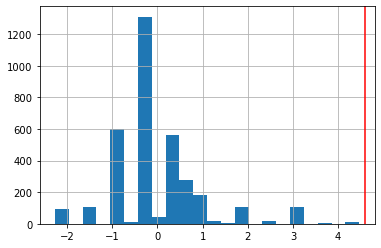

In [141]:
cell['screen_size'].hist(bins=22);
plt.axvline(x=quartiles[1]+Sixiqr,color='r');
    #The outliers are on the high end.

In [142]:
for i in range(cell.shape[0]):
    if cell.at[i,'screen_size']>Sixiqr:
        cell.at[i,'screen_size']=np.NaN
cell['screen_size'].isnull().sum()

11

### Selfie Camera MP Outliers:

In [143]:
quartiles= np.quantile(cell['selfie_camera_mp'][cell['selfie_camera_mp'].notnull()],[.25,.75])
Sixiqr=6*(quartiles[1]-quartiles[0])

print(f'Q1={quartiles[0]}, Q3={quartiles[1]}, 6*IQR={Sixiqr}')
outliers=cell.loc[np.abs(cell['selfie_camera_mp']-cell['selfie_camera_mp'].median())>Sixiqr,'selfie_camera_mp']
outliers

Q1=-0.6537655847094879, Q3=0.2073839575018505, 6*IQR=5.166897253268031


Series([], Name: selfie_camera_mp, dtype: float64)

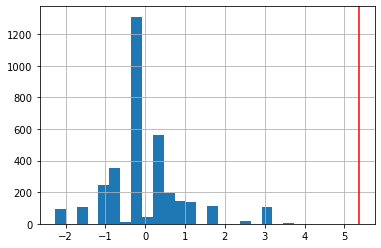

In [144]:
cell['screen_size'].hist(bins=22);
plt.axvline(x=quartiles[1]+Sixiqr,color='r')
    #There are no outliers high enough to skew the data.

### Weight Log outliers:

In [145]:
quartiles= np.quantile(cell['weight_log'][cell['weight_log'].notnull()],[.25,.75])
Sixiqr=6*(quartiles[1]-quartiles[0])

print(f'Q1={quartiles[0]}, Q3={quartiles[1]}, 6*IQR={Sixiqr}')
outliers=cell.loc[np.abs(cell['weight_log']-cell['weight_log'].median())>Sixiqr,'weight_log']
outliers

Q1=-0.5265879376241435, Q3=0.24667312273779218, 6*IQR=4.639566362171614


1141   4.70415
1142   4.72129
Name: weight_log, dtype: float64

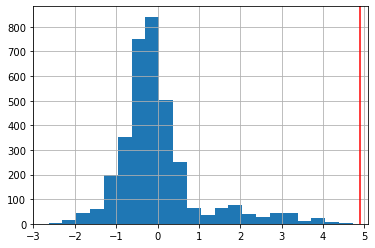

In [146]:
cell['weight_log'].hist(bins=22);
plt.axvline(x=quartiles[1]+Sixiqr,color='r')
    #In my opinion, the outliers are not far enough from other points to warrant Nan's.

In [147]:
cell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3443 non-null   float64
 1   4g                     3454 non-null   uint8  
 2   5g_and_4g              3454 non-null   uint8  
 3   main_camera_mp         3454 non-null   float64
 4   selfie_camera_mp       3454 non-null   float64
 5   battery                3454 non-null   float64
 6   release_year           3454 non-null   int64  
 7   days_used              3454 non-null   float64
 8   normalized_used_price  3454 non-null   float64
 9   normalized_new_price   3454 non-null   float64
 10  storage_log+1          3454 non-null   float64
 11  weight_log             3454 non-null   float64
 12  Alcatel                3454 non-null   uint8  
 13  Apple                  3454 non-null   uint8  
 14  Asus                   3454 non-null   uint8  
 15  Blac

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [148]:
pd.DataFrame(cell.corr()['normalized_used_price']).sort_values('normalized_used_price',ascending=False).head(15)

normalized_used_price
normalized_used_price                1.00000
normalized_new_price                 0.83450
battery                              0.61196
screen_size                          0.61132
selfie_camera_mp                     0.60783
main_camera_mp                       0.55354
4g                                   0.55066
release_year                         0.50979
weight_log                           0.48969
storage_log+1                        0.46265
above_4gb_ram                        0.40032
5g_and_4g                            0.31364
Huawei                               0.13780
Vivo                                 0.13147
Oppo                                 0.13064

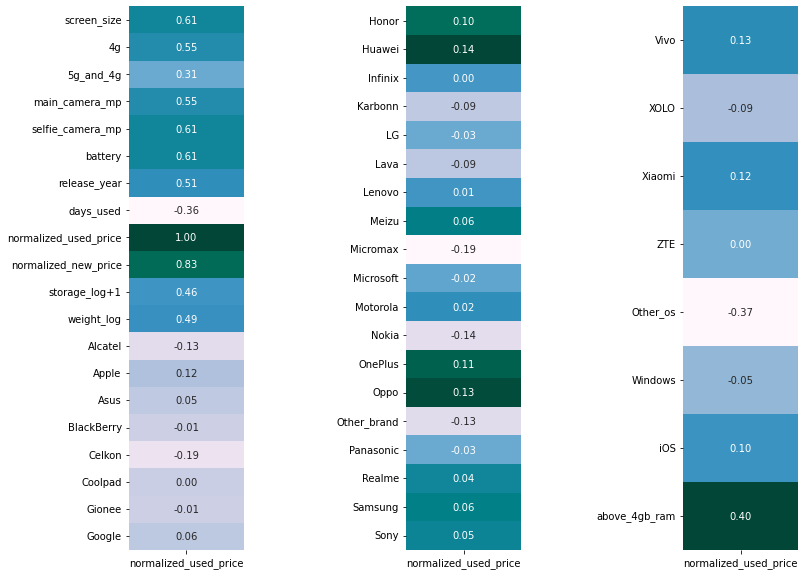

In [149]:
fig=plt.figure()

fig.add_subplot(1,5,1)
sns.heatmap(data=pd.DataFrame(cell.corr()['normalized_used_price']).iloc[:20,:],annot=True,fmt='0.2f',cmap='PuBuGn',cbar=False)

fig.add_subplot(1,5,3)
sns.heatmap(data=pd.DataFrame(cell.corr()['normalized_used_price']).iloc[21:40,:],annot=True,fmt='0.2f',cmap='PuBuGn',cbar=False)

fig.add_subplot(1,5,5)
sns.heatmap(data=pd.DataFrame(cell.corr()['normalized_used_price']).iloc[41:49,:],annot=True,fmt='0.2f',cmap='PuBuGn',cbar=False)

plt.gcf().set_size_inches(12,10)

#The heatmap is too large, and it gets cut off.

### Post preprocessing, the highest correlations to used_price are still:
1) New Price = 0.834  
2) battery = 0.611  
3) screen size = 0.611  
4) selfie_camera_mp = 0.608
### However, above_4gb_ram has a surprisingly high 0.40 for a binary column. As ram goes above the standard 4gb, there seems to be a correlation with increase in price.
### There is also an absolutely terrible -0.37 'Other_os' correlation, which implies any OS besides Android, Windows and iOS is very unpopular.

---
---
---

# <span style="font-size:larger">Building a Linear Regression model</span>

In [150]:
import warnings
warnings.filterwarnings('ignore')


cell=cell.dropna() #dropping the outlier nan's 
X=cell.drop(['normalized_used_price'],axis=1)
y=cell[['normalized_used_price']]

X=sm.add_constant(X) #Add constant is convenient but depreciated in current builds of python. I need to filter the warning.

In [151]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.30,random_state=1)

In [152]:
olsmod=sm.OLS(y_train,X_train)
olsres=olsmod.fit()
print(olsres.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.848
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     268.2
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:25   Log-Likelihood:                 120.84
No. Observations:                   2410   AIC:                            -141.7
Df Residuals:                       2360   BIC:                             147.7
Df Model:                             49                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

## Let's start by checking VIFs for multicollinearity.

In [153]:
vif_series1=pd.Series(
    [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])],
    index=X_train.columns,
)
pd.DataFrame(vif_series1).sort_values(0,ascending=False).head()

0
const       3975952.73505
Apple            16.69622
iOS              15.65961
Other_brand       9.37344
Samsung           7.08571

## Let's try dropping Apple first.

In [154]:
X_train2=X_train.drop(['Apple'],axis=1)
olsmod_2=sm.OLS(y_train,X_train2)
olsres_2=olsmod_2.fit()
print(f"R Squared: {olsres_2.rsquared}")
print(f"Adj R Squared: {olsres_2.rsquared_adj}")

R Squared: 0.847758319919553
Adj R Squared: 0.844663190464296


## Not much has changed. Check VIFs again:

In [155]:
vif_series2=pd.Series(
    [variance_inflation_factor(X_train2.values,i) for i in range (X_train2.shape[1])],
    index=X_train2.columns,
)
pd.DataFrame(vif_series2).sort_values(0,ascending=False).head()
#iOS is no longer in the top 5 because we dropped Apple.

0
const       3972104.26065
Other_brand       8.96629
Samsung           6.76369
screen_size       6.25321
Huawei            5.50784

### Drop Other_brand.

In [156]:
X_train3=X_train2.drop(['Other_brand'],axis=1)
olsmod_3=sm.OLS(y_train,X_train3)
olsres_3=olsmod_3.fit()
print(f"R Squared: {olsres_3.rsquared}")
print(f"Adj R Squared: {olsres_3.rsquared_adj}")

R Squared: 0.8476997821357666
Adj R Squared: 0.8446692528217874


#### Minor changes!
## Again, check VIFs:

In [157]:
vif_series3=pd.Series(
    [variance_inflation_factor(X_train3.values,i) for i in range (X_train3.shape[1])],
    index=X_train3.columns,
)
pd.DataFrame(vif_series3).sort_values(0,ascending=False).head()

0
const        3971541.33019
screen_size        6.20898
release_year       5.07948
weight_log         4.88451
battery            4.13754

### Drop screen_size.

In [158]:
X_train4=X_train3.drop(['screen_size'],axis=1)
olsmod_4=sm.OLS(y_train,X_train4)
olsres_4=olsmod_4.fit()
print(f"R Squared: {olsres_4.rsquared}")
print(f"Adj R Squared: {olsres_4.rsquared_adj}")

R Squared: 0.844513950596612
Adj R Squared: 0.8414871379548194


### Another minor change in R Squared.
## VIFs:
    I'm aiming for the highest non-constant column to be 5 or below.

In [159]:
vif_series4=pd.Series(
    [variance_inflation_factor(X_train4.values,i) for i in range (X_train4.shape[1])],
    index=X_train4.columns,
)
pd.DataFrame(vif_series4).sort_values(0,ascending=False).head()

0
const                3927817.10416
release_year               5.02426
battery                    3.65568
selfie_camera_mp           3.08099
normalized_new_price       3.03538

## This might be the last one I drop. Drop release_year:

In [160]:
X_train5=X_train4.drop(['release_year'],axis=1)
olsmod_5=sm.OLS(y_train,X_train5)
olsres_5=olsmod_5.fit()
print(f"R Squared: {olsres_5.rsquared}")
print(f"Adj R Squared: {olsres_5.rsquared_adj}")

R Squared: 0.8421620537106596
Adj R Squared: 0.8391575242762178


In [161]:
vif_series5=pd.Series(
    [variance_inflation_factor(X_train5.values,i) for i in range (X_train5.shape[1])],
    index=X_train5.columns,
)
pd.DataFrame(vif_series5).sort_values(0,ascending=False).head()

0
const                172.78505
battery                3.50859
normalized_new_price   2.85801
weight_log             2.79472
selfie_camera_mp       2.77640

## The R-Squared and Adjusted R-Squared have dropped by a total of 0.006. Let's look at the P-Values of the summary:

In [162]:
olsres_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     280.3
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:26   Log-Likelihood:                 77.293
No. Observations:                   2410   AIC:                            -62.59
Df Residuals:                       2364   BIC:                             203.6
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1321      0.063     33.655      0.000       2.008       2.256
4g                       0.0723      0.015      4.908      0.000       0.043       0.101
5g_and_4g                0.0177      0.034      0.523      0.601      -0.049       0.084
main_camera_mp           0.0984      0.007     14.486      0.000       0.085       0.112
selfie_camera_mp         0.1061      0.008     13.307      0.000       0.090       0.122
battery                  0.0051      0.009      0.542      0.588      -0.013       0.024
days_used               -0.0231      0.007     -3.401      0.001      -0.036      -0.010
normalized_new_price     0.4181      0.012     35.010      0.000       0.395       0.441
storage_log+1            0.0266      0.007      3.957      0.000       0.013       0.040
weight_log               0.1579      0.008     18.649      0.000       0.141       0.175
Alcatel                  0.0139      0.029      0.485      0.628      -0.042       0.070
Asus                     0.0447      0.029      1.552      0.121      -0.012       0.101
BlackBerry              -0.0186      0.058     -0.321      0.749      -0.132       0.095
Celkon                  -0.2450      0.056     -4.382      0.000      -0.355      -0.135
Coolpad                  0.0749      0.061      1.228      0.220      -0.045       0.194
Gionee                   0.0289      0.044      0.657      0.511      -0.057       0.115
Google                   0.0832      0.091      0.913      0.361      -0.096       0.262
HTC                      0.0260      0.030      0.857      0.392      -0.033       0.085
Honor                    0.0401      0.031      1.299      0.194      -0.020       0.101
Huawei                  -0.0012      0.023     -0.053      0.958      -0.046       0.043
Infinix                  0.1680      0.087      1.939      0.053      -0.002       0.338
Karbonn                  0.0052      0.054      0.097      0.923      -0.100       0.110
LG                      -0.0341      0.024     -1.434      0.152      -0.081       0.013
Lava                    -0.0237      0.053     -0.452      0.651      -0.127       0.079
Lenovo                   0.0235      0.025      0.947      0.344      -0.025       0.072
Meizu                    0.0193      0.040      0.479      0.632      -0.060       0.098
Micromax                 0.0066      0.029      0.226      0.821      -0.050       0.063
Microsoft                0.1371      0.078      1.755      0.079      -0.016       0.290
Motorola                -0.0168      0.032     -0.530      0.596      -0.079       0.045
Nokia                    0.1224      0.035      3.546      0.000       0.055       0.190
OnePlus                  0.1593      0.067      2.393      0.017       0.029       0.290
Oppo                    

## Plenty of P-Values above 0.05. Here's a list of everything above 0.50:

In [163]:
pd.DataFrame([['5g_and_4g' ,  0.601],
['battery' ,  0.588],
['Alcatel' ,   0.628],
['Blackberry' ,  0.749],
['Gionee'  , 0.511],
['Google' , 0.935],
['Huawei', 0.958],
['Karbonn',0.923],
['Lava',0.651],
['Meizu',0.632],
['Micromax',0.821],
['Motorola',0.596],
['Samsung',0.787],
['Spice',0.535],
['Vivo',0.973],
['XOLO',0.946],
['ZTE',0.752],
['above_4gb_ram',0.846]]).sort_values(1,ascending=False)

0       1
14           Vivo 0.97300
6          Huawei 0.95800
15           XOLO 0.94600
5          Google 0.93500
7         Karbonn 0.92300
17  above_4gb_ram 0.84600
10       Micromax 0.82100
12        Samsung 0.78700
16            ZTE 0.75200
3      Blackberry 0.74900
8            Lava 0.65100
9           Meizu 0.63200
2         Alcatel 0.62800
0       5g_and_4g 0.60100
11       Motorola 0.59600
1         battery 0.58800
13          Spice 0.53500
4          Gionee 0.51100

## Let's start by dropping Vivo.

In [164]:
X_train6=X_train5.drop(['Vivo'],axis=1)
olsmod_6=sm.OLS(y_train,X_train6)
olsres_6=olsmod_6.fit()
print(f"R Squared: {olsres_6.rsquared}")
print(f"Adj R Squared: {olsres_6.rsquared_adj}")




R Squared: 0.8421619750408404
Adj R Squared: 0.8392254536462515


In [165]:
vif_series6=pd.Series(
    [variance_inflation_factor(X_train6.values,i) for i in range (X_train6.shape[1])],
    index=X_train6.columns,
)
pd.DataFrame(vif_series6).sort_values(0,ascending=False).head()

0
const                172.06661
battery                3.49976
normalized_new_price   2.85697
weight_log             2.78142
selfie_camera_mp       2.72286

In [166]:
olsres_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     286.8
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:26   Log-Likelihood:                 77.293
No. Observations:                   2410   AIC:                            -64.59
Df Residuals:                       2365   BIC:                             195.8
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1323      0.063     33.735      0.000       2.008       2.256
4g                       0.0723      0.015      4.921      0.000       0.044       0.101
5g_and_4g                0.0177      0.034      0.523      0.601      -0.049       0.084
main_camera_mp           0.0984      0.007     14.493      0.000       0.085       0.112
selfie_camera_mp         0.1061      0.008     13.445      0.000       0.091       0.122
battery                  0.0051      0.009      0.545      0.586      -0.013       0.024
days_used               -0.0231      0.007     -3.403      0.001      -0.036      -0.010
normalized_new_price     0.4181      0.012     35.025      0.000       0.395       0.441
storage_log+1            0.0266      0.007      3.958      0.000       0.013       0.040
weight_log               0.1579      0.008     18.695      0.000       0.141       0.174
Alcatel                  0.0137      0.028      0.486      0.627      -0.042       0.069
Asus                     0.0445      0.028      1.574      0.116      -0.011       0.100
BlackBerry              -0.0188      0.058     -0.325      0.745      -0.132       0.094
Celkon                  -0.2452      0.056     -4.394      0.000      -0.355      -0.136
Coolpad                  0.0746      0.061      1.231      0.218      -0.044       0.193
Gionee                   0.0287      0.044      0.658      0.510      -0.057       0.114
Google                   0.0830      0.091      0.913      0.361      -0.095       0.261
HTC                      0.0258      0.030      0.867      0.386      -0.033       0.084
Honor                    0.0398      0.030      1.331      0.183      -0.019       0.099
Huawei                  -0.0014      0.022     -0.067      0.947      -0.044       0.041
Infinix                  0.1678      0.086      1.944      0.052      -0.001       0.337
Karbonn                  0.0051      0.054      0.095      0.925      -0.100       0.110
LG                      -0.0343      0.023     -1.488      0.137      -0.079       0.011
Lava                    -0.0239      0.052     -0.457      0.648      -0.127       0.079
Lenovo                   0.0233      0.024      0.964      0.335      -0.024       0.071
Meizu                    0.0190      0.040      0.481      0.630      -0.059       0.097
Micromax                 0.0064      0.029      0.224      0.823      -0.050       0.063
Microsoft                0.1370      0.078      1.756      0.079      -0.016       0.290
Motorola                -0.0170      0.031     -0.551      0.582      -0.078       0.044
Nokia                    0.1222      0.034      3.579      0.000       0.055       0.189
OnePlus                  0.1591      0.066      2.409      0.016       0.030       0.289
Oppo                    

## The highest P-value is now Huawei.

In [167]:
X_train7=X_train6.drop(['Huawei'],axis=1)
olsmod_7=sm.OLS(y_train,X_train7)
olsres_7=olsmod_7.fit()
print(f"R Squared: {olsres_7.rsquared}")
print(f"Adj R Squared: {olsres_7.rsquared_adj}")

R Squared: 0.842161679420214
Adj R Squared: 0.8392931047013084


In [168]:
vif_series7=pd.Series(
    [variance_inflation_factor(X_train7.values,i) for i in range (X_train7.shape[1])],
    index=X_train7.columns,
)
pd.DataFrame(vif_series7).sort_values(0,ascending=False).head()

0
const                171.00444
battery                3.49411
normalized_new_price   2.85697
weight_log             2.78115
selfie_camera_mp       2.72125

In [169]:
olsres_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     293.6
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:27   Log-Likelihood:                 77.290
No. Observations:                   2410   AIC:                            -66.58
Df Residuals:                       2366   BIC:                             188.1
Df Model:                             43                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1319      0.063     33.841      0.000       2.008       2.255
4g                       0.0723      0.015      4.935      0.000       0.044       0.101
5g_and_4g                0.0177      0.034      0.523      0.601      -0.049       0.084
main_camera_mp           0.0984      0.007     14.498      0.000       0.085       0.112
selfie_camera_mp         0.1061      0.008     13.450      0.000       0.091       0.122
battery                  0.0051      0.009      0.542      0.588      -0.013       0.024
days_used               -0.0231      0.007     -3.404      0.001      -0.036      -0.010
normalized_new_price     0.4181      0.012     35.032      0.000       0.395       0.441
storage_log+1            0.0266      0.007      3.958      0.000       0.013       0.040
weight_log               0.1579      0.008     18.701      0.000       0.141       0.174
Alcatel                  0.0140      0.028      0.506      0.613      -0.040       0.068
Asus                     0.0449      0.028      1.622      0.105      -0.009       0.099
BlackBerry              -0.0184      0.057     -0.321      0.749      -0.131       0.094
Celkon                  -0.2449      0.056     -4.402      0.000      -0.354      -0.136
Coolpad                  0.0750      0.060      1.245      0.213      -0.043       0.193
Gionee                   0.0290      0.043      0.672      0.501      -0.056       0.114
Google                   0.0834      0.091      0.921      0.357      -0.094       0.261
HTC                      0.0262      0.029      0.897      0.370      -0.031       0.083
Honor                    0.0403      0.029      1.380      0.168      -0.017       0.097
Infinix                  0.1682      0.086      1.956      0.051      -0.000       0.337
Karbonn                  0.0054      0.053      0.100      0.920      -0.099       0.110
LG                      -0.0339      0.022     -1.520      0.129      -0.078       0.010
Lava                    -0.0236      0.052     -0.453      0.651      -0.126       0.079
Lenovo                   0.0237      0.023      1.009      0.313      -0.022       0.070
Meizu                    0.0195      0.039      0.500      0.617      -0.057       0.096
Micromax                 0.0067      0.028      0.238      0.812      -0.049       0.062
Microsoft                0.1373      0.078      1.762      0.078      -0.015       0.290
Motorola                -0.0166      0.030     -0.549      0.583      -0.076       0.043
Nokia                    0.1225      0.034      3.621      0.000       0.056       0.189
OnePlus                  0.1596      0.066      2.435      0.015       0.031       0.288
Oppo                     0.0270      0.027      0.995      0.320      -0.026       0.080
Panasonic               

## Next highest is XOLO.

In [170]:
X_train8=X_train7.drop(['XOLO'],axis=1)
olsmod_8=sm.OLS(y_train,X_train8)
olsres_8=olsmod_8.fit()
print(f"R Squared: {olsres_8.rsquared}")
print(f"Adj R Squared: {olsres_8.rsquared_adj}\n")


vif_series8=pd.Series(
    [variance_inflation_factor(X_train8.values,i) for i in range (X_train8.shape[1])],
    index=X_train8.columns,
)
print(pd.DataFrame(vif_series8).sort_values(0,ascending=False).head())

olsres_8.summary()

R Squared: 0.8421613986848118
Adj R Squared: 0.8393607137438579

                             0
const                169.56703
battery                3.49279
normalized_new_price   2.85239
weight_log             2.77212
selfie_camera_mp       2.72051


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     300.7
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:27   Log-Likelihood:                 77.288
No. Observations:                   2410   AIC:                            -68.58
Df Residuals:                       2367   BIC:                             180.3
Df Model:                             42                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1316      0.063     33.985      0.000       2.009       2.255
4g                       0.0724      0.015      4.980      0.000       0.044       0.101
5g_and_4g                0.0177      0.034      0.522      0.601      -0.049       0.084
main_camera_mp           0.0984      0.007     14.502      0.000       0.085       0.112
selfie_camera_mp         0.1061      0.008     13.456      0.000       0.091       0.122
battery                  0.0051      0.009      0.541      0.588      -0.013       0.024
days_used               -0.0231      0.007     -3.406      0.001      -0.036      -0.010
normalized_new_price     0.4181      0.012     35.070      0.000       0.395       0.441
storage_log+1            0.0266      0.007      3.960      0.000       0.013       0.040
weight_log               0.1580      0.008     18.739      0.000       0.141       0.174
Alcatel                  0.0142      0.028      0.513      0.608      -0.040       0.068
Asus                     0.0450      0.028      1.631      0.103      -0.009       0.099
BlackBerry              -0.0184      0.057     -0.320      0.749      -0.131       0.094
Celkon                  -0.2447      0.056     -4.405      0.000      -0.354      -0.136
Coolpad                  0.0751      0.060      1.247      0.212      -0.043       0.193
Gionee                   0.0292      0.043      0.677      0.498      -0.055       0.114
Google                   0.0835      0.091      0.922      0.357      -0.094       0.261
HTC                      0.0263      0.029      0.903      0.367      -0.031       0.083
Honor                    0.0404      0.029      1.386      0.166      -0.017       0.097
Infinix                  0.1683      0.086      1.957      0.050      -0.000       0.337
Karbonn                  0.0056      0.053      0.105      0.916      -0.099       0.110
LG                      -0.0338      0.022     -1.520      0.129      -0.077       0.010
Lava                    -0.0234      0.052     -0.450      0.653      -0.125       0.079
Lenovo                   0.0238      0.023      1.019      0.308      -0.022       0.070
Meizu                    0.0196      0.039      0.503      0.615      -0.057       0.096
Micromax                 0.0069      0.028      0.248      0.804      -0.048       0.062
Microsoft                0.1375      0.078      1.768      0.077      -0.015       0.290
Motorola                -0.0165      0.030     -0.547      0.585      -0.076       0.043
Nokia                    0.1226      0.034      3.633      0.000       0.056       0.189
OnePlus                  0.1596      0.066      2.437      0.015       0.031       0.288
Oppo                     0.0271      0.027      1.000      0.317      -0.026       0.080
Panasonic               

## Karbonn is now the highest.

In [171]:
X_train9=X_train8.drop(['Karbonn'],axis=1)
olsmod_9=sm.OLS(y_train,X_train9)
olsres_9=olsmod_9.fit()
print(f"R Squared: {olsres_9.rsquared}")
print(f"Adj R Squared: {olsres_9.rsquared_adj}\n")


vif_series9=pd.Series(
    [variance_inflation_factor(X_train9.values,i) for i in range (X_train9.shape[1])],
    index=X_train9.columns,
)
print(pd.DataFrame(vif_series9).sort_values(0,ascending=False).head())

olsres_9.summary()

R Squared: 0.8421606595513995
Adj R Squared: 0.8394277993493756

                             0
const                168.57302
battery                3.49037
normalized_new_price   2.84804
weight_log             2.77107
selfie_camera_mp       2.72049


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     308.2
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:27   Log-Likelihood:                 77.283
No. Observations:                   2410   AIC:                            -70.57
Df Residuals:                       2368   BIC:                             172.5
Df Model:                             41                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1321      0.063     34.101      0.000       2.009       2.255
4g                       0.0722      0.014      4.992      0.000       0.044       0.101
5g_and_4g                0.0177      0.034      0.524      0.600      -0.049       0.084
main_camera_mp           0.0985      0.007     14.514      0.000       0.085       0.112
selfie_camera_mp         0.1061      0.008     13.459      0.000       0.091       0.122
battery                  0.0051      0.009      0.539      0.590      -0.013       0.024
days_used               -0.0231      0.007     -3.405      0.001      -0.036      -0.010
normalized_new_price     0.4181      0.012     35.100      0.000       0.395       0.441
storage_log+1            0.0266      0.007      3.960      0.000       0.013       0.040
weight_log               0.1579      0.008     18.744      0.000       0.141       0.174
Alcatel                  0.0140      0.028      0.507      0.612      -0.040       0.068
Asus                     0.0449      0.028      1.629      0.104      -0.009       0.099
BlackBerry              -0.0184      0.057     -0.320      0.749      -0.131       0.094
Celkon                  -0.2450      0.055     -4.417      0.000      -0.354      -0.136
Coolpad                  0.0750      0.060      1.245      0.213      -0.043       0.193
Gionee                   0.0290      0.043      0.674      0.501      -0.055       0.113
Google                   0.0834      0.091      0.921      0.357      -0.094       0.261
HTC                      0.0261      0.029      0.899      0.369      -0.031       0.083
Honor                    0.0402      0.029      1.383      0.167      -0.017       0.097
Infinix                  0.1682      0.086      1.956      0.051      -0.000       0.337
LG                      -0.0339      0.022     -1.531      0.126      -0.077       0.010
Lava                    -0.0237      0.052     -0.456      0.648      -0.125       0.078
Lenovo                   0.0236      0.023      1.015      0.310      -0.022       0.069
Meizu                    0.0195      0.039      0.500      0.617      -0.057       0.096
Micromax                 0.0067      0.028      0.239      0.811      -0.048       0.061
Microsoft                0.1374      0.078      1.768      0.077      -0.015       0.290
Motorola                -0.0166      0.030     -0.552      0.581      -0.076       0.042
Nokia                    0.1225      0.034      3.633      0.000       0.056       0.189
OnePlus                  0.1596      0.065      2.437      0.015       0.031       0.288
Oppo                     0.0270      0.027      0.997      0.319      -0.026       0.080
Panasonic                0.0734      0.039      1.872      0.061      -0.003       0.150
Realme                  

## Above_4gb_ram is next:

In [172]:
X_train10=X_train9.drop(['above_4gb_ram'],axis=1)
olsmod_10=sm.OLS(y_train,X_train10)
olsres_10=olsmod_10.fit()
print(f"R Squared: {olsres_10.rsquared}")
print(f"Adj R Squared: {olsres_10.rsquared_adj}\n")


vif_series10=pd.Series(
    [variance_inflation_factor(X_train10.values,i) for i in range (X_train10.shape[1])],
    index=X_train10.columns,
)
print(pd.DataFrame(vif_series10).sort_values(0,ascending=False).head())

olsres_10.summary()

R Squared: 0.8421581934815012
Adj R Squared: 0.8394930722232741

                             0
const                168.25889
battery                3.48751
normalized_new_price   2.82806
weight_log             2.77034
selfie_camera_mp       2.50481


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     316.0
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:27   Log-Likelihood:                 77.264
No. Observations:                   2410   AIC:                            -72.53
Df Residuals:                       2369   BIC:                             164.8
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1316      0.062     34.131      0.000       2.009       2.254
4g                       0.0721      0.014      4.991      0.000       0.044       0.100
5g_and_4g                0.0211      0.029      0.729      0.466      -0.036       0.078
main_camera_mp           0.0983      0.007     14.600      0.000       0.085       0.111
selfie_camera_mp         0.1066      0.008     14.086      0.000       0.092       0.121
battery                  0.0051      0.009      0.545      0.586      -0.013       0.024
days_used               -0.0233      0.007     -3.479      0.001      -0.036      -0.010
normalized_new_price     0.4182      0.012     35.247      0.000       0.395       0.442
storage_log+1            0.0267      0.007      3.988      0.000       0.014       0.040
weight_log               0.1579      0.008     18.748      0.000       0.141       0.174
Alcatel                  0.0140      0.028      0.508      0.611      -0.040       0.068
Asus                     0.0448      0.028      1.626      0.104      -0.009       0.099
BlackBerry              -0.0188      0.057     -0.327      0.744      -0.131       0.094
Celkon                  -0.2450      0.055     -4.419      0.000      -0.354      -0.136
Coolpad                  0.0746      0.060      1.239      0.215      -0.043       0.193
Gionee                   0.0288      0.043      0.669      0.504      -0.056       0.113
Google                   0.0842      0.090      0.931      0.352      -0.093       0.262
HTC                      0.0261      0.029      0.897      0.370      -0.031       0.083
Honor                    0.0402      0.029      1.384      0.167      -0.017       0.097
Infinix                  0.1675      0.086      1.950      0.051      -0.001       0.336
LG                      -0.0341      0.022     -1.539      0.124      -0.078       0.009
Lava                    -0.0236      0.052     -0.456      0.649      -0.125       0.078
Lenovo                   0.0235      0.023      1.011      0.312      -0.022       0.069
Meizu                    0.0197      0.039      0.506      0.613      -0.057       0.096
Micromax                 0.0067      0.028      0.240      0.810      -0.048       0.061
Microsoft                0.1373      0.078      1.767      0.077      -0.015       0.290
Motorola                -0.0170      0.030     -0.565      0.572      -0.076       0.042
Nokia                    0.1224      0.034      3.632      0.000       0.056       0.189
OnePlus                  0.1603      0.065      2.452      0.014       0.032       0.289
Oppo                     0.0266      0.027      0.986      0.324      -0.026       0.080
Panasonic                0.0734      0.039      1.871      0.061      -0.004       0.150
Realme                  

## Micromax is the first highest-p-value below 0.9!

In [173]:
X_train11=X_train10.drop(['Micromax'],axis=1)
olsmod_11=sm.OLS(y_train,X_train11)
olsres_11=olsmod_11.fit()
print(f"R Squared: {olsres_11.rsquared}")
print(f"Adj R Squared: {olsres_11.rsquared_adj}\n")


vif_series11=pd.Series(
    [variance_inflation_factor(X_train11.values,i) for i in range (X_train11.shape[1])],
    index=X_train11.columns,
)
print(pd.DataFrame(vif_series11).sort_values(0,ascending=False).head())

olsres_11.summary()

R Squared: 0.8421543507805693
Adj R Squared: 0.839556890730123

                             0
const                163.12777
battery                3.48396
normalized_new_price   2.78575
weight_log             2.76169
selfie_camera_mp       2.50469


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     324.2
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:27   Log-Likelihood:                 77.235
No. Observations:                   2410   AIC:                            -74.47
Df Residuals:                       2370   BIC:                             157.0
Df Model:                             39                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1342      0.061     34.713      0.000       2.014       2.255
4g                       0.0719      0.014      4.986      0.000       0.044       0.100
5g_and_4g                0.0213      0.029      0.737      0.461      -0.035       0.078
main_camera_mp           0.0983      0.007     14.601      0.000       0.085       0.111
selfie_camera_mp         0.1066      0.008     14.090      0.000       0.092       0.121
battery                  0.0052      0.009      0.553      0.580      -0.013       0.024
days_used               -0.0232      0.007     -3.472      0.001      -0.036      -0.010
normalized_new_price     0.4179      0.012     35.491      0.000       0.395       0.441
storage_log+1            0.0267      0.007      3.987      0.000       0.014       0.040
weight_log               0.1578      0.008     18.767      0.000       0.141       0.174
Alcatel                  0.0132      0.027      0.481      0.630      -0.040       0.067
Asus                     0.0442      0.027      1.611      0.107      -0.010       0.098
BlackBerry              -0.0192      0.057     -0.335      0.738      -0.132       0.093
Celkon                  -0.2461      0.055     -4.455      0.000      -0.354      -0.138
Coolpad                  0.0739      0.060      1.229      0.219      -0.044       0.192
Gionee                   0.0281      0.043      0.654      0.513      -0.056       0.112
Google                   0.0840      0.090      0.929      0.353      -0.093       0.261
HTC                      0.0255      0.029      0.880      0.379      -0.031       0.082
Honor                    0.0397      0.029      1.369      0.171      -0.017       0.096
Infinix                  0.1667      0.086      1.943      0.052      -0.002       0.335
LG                      -0.0347      0.022     -1.581      0.114      -0.078       0.008
Lava                    -0.0246      0.052     -0.476      0.634      -0.126       0.077
Lenovo                   0.0228      0.023      0.989      0.323      -0.022       0.068
Meizu                    0.0191      0.039      0.493      0.622      -0.057       0.095
Microsoft                0.1364      0.078      1.757      0.079      -0.016       0.289
Motorola                -0.0176      0.030     -0.586      0.558      -0.076       0.041
Nokia                    0.1216      0.034      3.627      0.000       0.056       0.187
OnePlus                  0.1601      0.065      2.449      0.014       0.032       0.288
Oppo                     0.0261      0.027      0.971      0.332      -0.027       0.079
Panasonic                0.0726      0.039      1.858      0.063      -0.004       0.149
Realme                   0.1130      0.050      2.281      0.023       0.016       0.210
Samsung                 

## ZTE is 0.751:

In [174]:
X_train12=X_train11.drop(['ZTE'],axis=1)
olsmod_12=sm.OLS(y_train,X_train12)
olsres_12=olsmod_12.fit()
print(f"R Squared: {olsres_12.rsquared}")
print(f"Adj R Squared: {olsres_12.rsquared_adj}\n")


vif_series12=pd.Series(
    [variance_inflation_factor(X_train12.values,i) for i in range (X_train12.shape[1])],
    index=X_train12.columns,
)
print(pd.DataFrame(vif_series12).sort_values(0,ascending=False).head())

olsres_12.summary()

R Squared: 0.8421476445873263
Adj R Squared: 0.839617746018924

                             0
const                162.71297
battery                3.48044
normalized_new_price   2.78492
weight_log             2.76136
selfie_camera_mp       2.50203


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     332.9
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:27   Log-Likelihood:                 77.183
No. Observations:                   2410   AIC:                            -76.37
Df Residuals:                       2371   BIC:                             149.3
Df Model:                             38                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1352      0.061     34.780      0.000       2.015       2.256
4g                       0.0724      0.014      5.047      0.000       0.044       0.100
5g_and_4g                0.0213      0.029      0.738      0.461      -0.035       0.078
main_camera_mp           0.0984      0.007     14.677      0.000       0.085       0.112
selfie_camera_mp         0.1065      0.008     14.090      0.000       0.092       0.121
battery                  0.0051      0.009      0.543      0.587      -0.013       0.024
days_used               -0.0232      0.007     -3.466      0.001      -0.036      -0.010
normalized_new_price     0.4178      0.012     35.498      0.000       0.395       0.441
storage_log+1            0.0266      0.007      3.986      0.000       0.014       0.040
weight_log               0.1578      0.008     18.768      0.000       0.141       0.174
Alcatel                  0.0122      0.027      0.450      0.652      -0.041       0.066
Asus                     0.0432      0.027      1.586      0.113      -0.010       0.097
BlackBerry              -0.0203      0.057     -0.354      0.723      -0.132       0.092
Celkon                  -0.2469      0.055     -4.472      0.000      -0.355      -0.139
Coolpad                  0.0727      0.060      1.212      0.226      -0.045       0.190
Gionee                   0.0271      0.043      0.634      0.526      -0.057       0.111
Google                   0.0829      0.090      0.918      0.359      -0.094       0.260
HTC                      0.0243      0.029      0.847      0.397      -0.032       0.081
Honor                    0.0386      0.029      1.342      0.180      -0.018       0.095
Infinix                  0.1658      0.086      1.934      0.053      -0.002       0.334
LG                      -0.0357      0.022     -1.644      0.100      -0.078       0.007
Lava                    -0.0256      0.052     -0.495      0.620      -0.127       0.076
Lenovo                   0.0219      0.023      0.955      0.339      -0.023       0.067
Meizu                    0.0180      0.039      0.466      0.642      -0.058       0.094
Microsoft                0.1359      0.078      1.751      0.080      -0.016       0.288
Motorola                -0.0187      0.030     -0.630      0.529      -0.077       0.040
Nokia                    0.1207      0.033      3.613      0.000       0.055       0.186
OnePlus                  0.1593      0.065      2.440      0.015       0.031       0.287
Oppo                     0.0252      0.027      0.942      0.346      -0.027       0.078
Panasonic                0.0714      0.039      1.837      0.066      -0.005       0.148
Realme                   0.1121      0.049      2.267      0.023       0.015       0.209
Samsung                 

## Dropping BlackBerry next.

In [175]:
X_train13=X_train12.drop(['BlackBerry'],axis=1)
olsmod_13=sm.OLS(y_train,X_train13)
olsres_13=olsmod_13.fit()
print(f"R Squared: {olsres_13.rsquared}")
print(f"Adj R Squared: {olsres_13.rsquared_adj}\n")


vif_series13=pd.Series(
    [variance_inflation_factor(X_train13.values,i) for i in range (X_train13.shape[1])],
    index=X_train13.columns,
)
print(pd.DataFrame(vif_series13).sort_values(0,ascending=False).head())

olsres_13.summary()

R Squared: 0.8421392927592092
Adj R Squared: 0.8396768786917939

                             0
const                162.06106
battery                3.47631
normalized_new_price   2.77265
weight_log             2.75974
selfie_camera_mp       2.49298


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     342.0
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:27   Log-Likelihood:                 77.120
No. Observations:                   2410   AIC:                            -78.24
Df Residuals:                       2372   BIC:                             141.7
Df Model:                             37                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1365      0.061     34.879      0.000       2.016       2.257
4g                       0.0719      0.014      5.037      0.000       0.044       0.100
5g_and_4g                0.0216      0.029      0.748      0.454      -0.035       0.078
main_camera_mp           0.0984      0.007     14.678      0.000       0.085       0.112
selfie_camera_mp         0.1066      0.008     14.140      0.000       0.092       0.121
battery                  0.0052      0.009      0.556      0.578      -0.013       0.024
days_used               -0.0231      0.007     -3.461      0.001      -0.036      -0.010
normalized_new_price     0.4176      0.012     35.559      0.000       0.395       0.441
storage_log+1            0.0266      0.007      3.982      0.000       0.014       0.040
weight_log               0.1577      0.008     18.769      0.000       0.141       0.174
Alcatel                  0.0127      0.027      0.469      0.639      -0.040       0.066
Asus                     0.0437      0.027      1.604      0.109      -0.010       0.097
Celkon                  -0.2459      0.055     -4.461      0.000      -0.354      -0.138
Coolpad                  0.0731      0.060      1.220      0.223      -0.044       0.191
Gionee                   0.0275      0.043      0.642      0.521      -0.056       0.111
Google                   0.0837      0.090      0.927      0.354      -0.093       0.261
HTC                      0.0248      0.029      0.866      0.386      -0.031       0.081
Honor                    0.0390      0.029      1.355      0.176      -0.017       0.095
Infinix                  0.1657      0.086      1.933      0.053      -0.002       0.334
LG                      -0.0353      0.022     -1.626      0.104      -0.078       0.007
Lava                    -0.0256      0.052     -0.495      0.620      -0.127       0.076
Lenovo                   0.0222      0.023      0.971      0.332      -0.023       0.067
Meizu                    0.0185      0.039      0.478      0.633      -0.057       0.094
Microsoft                0.1365      0.078      1.760      0.079      -0.016       0.289
Motorola                -0.0183      0.030     -0.616      0.538      -0.077       0.040
Nokia                    0.1219      0.033      3.665      0.000       0.057       0.187
OnePlus                  0.1599      0.065      2.450      0.014       0.032       0.288
Oppo                     0.0255      0.027      0.956      0.339      -0.027       0.078
Panasonic                0.0718      0.039      1.847      0.065      -0.004       0.148
Realme                   0.1124      0.049      2.272      0.023       0.015       0.209
Samsung                 -0.0063      0.018     -0.354      0.723      -0.041       0.029
Sony                    

## Dropping Samsung next:

In [176]:
X_train14=X_train13.drop(['Samsung'],axis=1)
olsmod_14=sm.OLS(y_train,X_train14)
olsres_14=olsmod_14.fit()
print(f"R Squared: {olsres_14.rsquared}")
print(f"Adj R Squared: {olsres_14.rsquared_adj}\n")


vif_series14=pd.Series(
    [variance_inflation_factor(X_train14.values,i) for i in range (X_train14.shape[1])],
    index=X_train14.columns,
)
print(pd.DataFrame(vif_series14).sort_values(0,ascending=False).head())

olsres_14.summary()

R Squared: 0.8421309464744541
Adj R Squared: 0.8397359671542183

                             0
const                158.68605
battery                3.47572
weight_log             2.75454
normalized_new_price   2.67428
selfie_camera_mp       2.48108


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     351.6
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:28   Log-Likelihood:                 77.056
No. Observations:                   2410   AIC:                            -80.11
Df Residuals:                       2373   BIC:                             134.0
Df Model:                             36                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1397      0.061     35.306      0.000       2.021       2.259
4g                       0.0714      0.014      5.028      0.000       0.044       0.099
5g_and_4g                0.0221      0.029      0.766      0.444      -0.034       0.079
main_camera_mp           0.0987      0.007     14.798      0.000       0.086       0.112
selfie_camera_mp         0.1068      0.008     14.201      0.000       0.092       0.122
battery                  0.0052      0.009      0.551      0.581      -0.013       0.024
days_used               -0.0231      0.007     -3.463      0.001      -0.036      -0.010
normalized_new_price     0.4168      0.012     36.146      0.000       0.394       0.439
storage_log+1            0.0267      0.007      4.010      0.000       0.014       0.040
weight_log               0.1578      0.008     18.805      0.000       0.141       0.174
Alcatel                  0.0140      0.027      0.520      0.603      -0.039       0.067
Asus                     0.0451      0.027      1.672      0.095      -0.008       0.098
Celkon                  -0.2455      0.055     -4.455      0.000      -0.353      -0.137
Coolpad                  0.0745      0.060      1.246      0.213      -0.043       0.192
Gionee                   0.0289      0.043      0.678      0.498      -0.055       0.112
Google                   0.0856      0.090      0.950      0.342      -0.091       0.262
HTC                      0.0264      0.028      0.930      0.352      -0.029       0.082
Honor                    0.0401      0.029      1.401      0.161      -0.016       0.096
Infinix                  0.1668      0.086      1.947      0.052      -0.001       0.335
LG                      -0.0338      0.021     -1.588      0.112      -0.075       0.008
Lava                    -0.0246      0.052     -0.478      0.633      -0.126       0.076
Lenovo                   0.0235      0.023      1.039      0.299      -0.021       0.068
Meizu                    0.0198      0.038      0.515      0.607      -0.056       0.095
Microsoft                0.1374      0.077      1.773      0.076      -0.015       0.289
Motorola                -0.0171      0.030     -0.580      0.562      -0.075       0.041
Nokia                    0.1233      0.033      3.735      0.000       0.059       0.188
OnePlus                  0.1616      0.065      2.483      0.013       0.034       0.289
Oppo                     0.0269      0.026      1.017      0.309      -0.025       0.079
Panasonic                0.0731      0.039      1.888      0.059      -0.003       0.149
Realme                   0.1135      0.049      2.300      0.022       0.017       0.210
Sony                    -0.0510      0.032     -1.611      0.107      -0.113       0.011
Spice                   

## Lava at 0.633 (getting lower!)

In [177]:
X_train15=X_train14.drop(['Lava'],axis=1)
olsmod_15=sm.OLS(y_train,X_train15)
olsres_15=olsmod_15.fit()
print(f"R Squared: {olsres_15.rsquared}")
print(f"Adj R Squared: {olsres_15.rsquared_adj}\n")


vif_series15=pd.Series(
    [variance_inflation_factor(X_train15.values,i) for i in range (X_train15.shape[1])],
    index=X_train15.columns,
)
print(pd.DataFrame(vif_series15).sort_values(0,ascending=False).head())

olsres_15.summary()

R Squared: 0.8421157299652532
Adj R Squared: 0.8397880343244714

                             0
const                157.59668
battery                3.47542
weight_log             2.75163
normalized_new_price   2.66367
selfie_camera_mp       2.48004


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     361.8
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:28   Log-Likelihood:                 76.940
No. Observations:                   2410   AIC:                            -81.88
Df Residuals:                       2374   BIC:                             126.5
Df Model:                             35                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1373      0.060     35.394      0.000       2.019       2.256
4g                       0.0716      0.014      5.049      0.000       0.044       0.099
5g_and_4g                0.0218      0.029      0.757      0.449      -0.035       0.078
main_camera_mp           0.0986      0.007     14.795      0.000       0.086       0.112
selfie_camera_mp         0.1069      0.008     14.216      0.000       0.092       0.122
battery                  0.0051      0.009      0.547      0.584      -0.013       0.024
days_used               -0.0232      0.007     -3.481      0.001      -0.036      -0.010
normalized_new_price     0.4171      0.012     36.254      0.000       0.395       0.440
storage_log+1            0.0265      0.007      3.986      0.000       0.013       0.040
weight_log               0.1580      0.008     18.834      0.000       0.142       0.174
Alcatel                  0.0146      0.027      0.544      0.587      -0.038       0.067
Asus                     0.0455      0.027      1.689      0.091      -0.007       0.098
Celkon                  -0.2439      0.055     -4.436      0.000      -0.352      -0.136
Coolpad                  0.0749      0.060      1.254      0.210      -0.042       0.192
Gionee                   0.0294      0.043      0.689      0.491      -0.054       0.113
Google                   0.0857      0.090      0.951      0.342      -0.091       0.262
HTC                      0.0267      0.028      0.944      0.345      -0.029       0.082
Honor                    0.0406      0.029      1.420      0.156      -0.015       0.097
Infinix                  0.1678      0.086      1.960      0.050      -0.000       0.336
LG                      -0.0333      0.021     -1.568      0.117      -0.075       0.008
Lenovo                   0.0240      0.023      1.063      0.288      -0.020       0.068
Meizu                    0.0202      0.038      0.525      0.600      -0.055       0.095
Microsoft                0.1376      0.077      1.776      0.076      -0.014       0.290
Motorola                -0.0166      0.029     -0.563      0.573      -0.074       0.041
Nokia                    0.1236      0.033      3.745      0.000       0.059       0.188
OnePlus                  0.1618      0.065      2.487      0.013       0.034       0.289
Oppo                     0.0272      0.026      1.031      0.303      -0.025       0.079
Panasonic                0.0736      0.039      1.903      0.057      -0.002       0.149
Realme                   0.1141      0.049      2.315      0.021       0.017       0.211
Sony                    -0.0507      0.032     -1.601      0.110      -0.113       0.011
Spice                   -0.0340      0.054     -0.631      0.528      -0.140       0.072
Xiaomi                  

## Meizu is next:

In [178]:
X_train16=X_train15.drop(['Meizu'],axis=1)
olsmod_16=sm.OLS(y_train,X_train16)
olsres_16=olsmod_16.fit()
print(f"R Squared: {olsres_16.rsquared}")
print(f"Adj R Squared: {olsres_16.rsquared_adj}\n")


vif_series16=pd.Series(
    [variance_inflation_factor(X_train16.values,i) for i in range (X_train16.shape[1])],
    index=X_train16.columns,
)
print(pd.DataFrame(vif_series16).sort_values(0,ascending=False).head())

olsres_16.summary()

R Squared: 0.842097403599747
Adj R Squared: 0.839836903272333

                             0
const                157.37827
battery                3.47391
weight_log             2.74965
normalized_new_price   2.66202
selfie_camera_mp       2.47261


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     372.5
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:28   Log-Likelihood:                 76.800
No. Observations:                   2410   AIC:                            -83.60
Df Residuals:                       2375   BIC:                             119.0
Df Model:                             34                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1384      0.060     35.443      0.000       2.020       2.257
4g                       0.0721      0.014      5.091      0.000       0.044       0.100
5g_and_4g                0.0224      0.029      0.778      0.437      -0.034       0.079
main_camera_mp           0.0987      0.007     14.816      0.000       0.086       0.112
selfie_camera_mp         0.1071      0.008     14.268      0.000       0.092       0.122
battery                  0.0052      0.009      0.558      0.577      -0.013       0.024
days_used               -0.0230      0.007     -3.460      0.001      -0.036      -0.010
normalized_new_price     0.4170      0.012     36.258      0.000       0.394       0.440
storage_log+1            0.0265      0.007      3.990      0.000       0.013       0.040
weight_log               0.1578      0.008     18.829      0.000       0.141       0.174
Alcatel                  0.0142      0.027      0.527      0.598      -0.039       0.067
Asus                     0.0448      0.027      1.667      0.096      -0.008       0.098
Celkon                  -0.2442      0.055     -4.440      0.000      -0.352      -0.136
Coolpad                  0.0739      0.060      1.238      0.216      -0.043       0.191
Gionee                   0.0287      0.043      0.673      0.501      -0.055       0.112
Google                   0.0850      0.090      0.944      0.346      -0.092       0.262
HTC                      0.0260      0.028      0.918      0.359      -0.029       0.081
Honor                    0.0396      0.028      1.389      0.165      -0.016       0.095
Infinix                  0.1669      0.086      1.950      0.051      -0.001       0.335
LG                      -0.0340      0.021     -1.602      0.109      -0.076       0.008
Lenovo                   0.0233      0.023      1.035      0.301      -0.021       0.067
Microsoft                0.1373      0.077      1.772      0.076      -0.015       0.289
Motorola                -0.0175      0.029     -0.594      0.552      -0.075       0.040
Nokia                    0.1232      0.033      3.734      0.000       0.058       0.188
OnePlus                  0.1608      0.065      2.473      0.013       0.033       0.288
Oppo                     0.0262      0.026      0.993      0.321      -0.025       0.078
Panasonic                0.0728      0.039      1.884      0.060      -0.003       0.149
Realme                   0.1133      0.049      2.298      0.022       0.017       0.210
Sony                    -0.0515      0.032     -1.628      0.104      -0.114       0.011
Spice                   -0.0344      0.054     -0.638      0.524      -0.140       0.071
Xiaomi                   0.0973      0.026      3.789      0.000       0.047       0.148
Other_os                

## Alcatel next:

In [179]:
X_train17=X_train16.drop(['Alcatel'],axis=1)
olsmod_17=sm.OLS(y_train,X_train17)
olsres_17=olsmod_17.fit()
print(f"R Squared: {olsres_17.rsquared}")
print(f"Adj R Squared: {olsres_17.rsquared_adj}\n")


vif_series17=pd.Series(
    [variance_inflation_factor(X_train17.values,i) for i in range (X_train17.shape[1])],
    index=X_train17.columns,
)
print(pd.DataFrame(vif_series17).sort_values(0,ascending=False).head())

olsres_17.summary()

R Squared: 0.8420789188633463
Adj R Squared: 0.8398855705142261

                             0
const                156.96808
battery                3.46512
weight_log             2.74332
normalized_new_price   2.65936
selfie_camera_mp       2.47210


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     383.9
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:28   Log-Likelihood:                 76.659
No. Observations:                   2410   AIC:                            -85.32
Df Residuals:                       2376   BIC:                             111.5
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1401      0.060     35.522      0.000       2.022       2.258
4g                       0.0724      0.014      5.117      0.000       0.045       0.100
5g_and_4g                0.0226      0.029      0.786      0.432      -0.034       0.079
main_camera_mp           0.0985      0.007     14.810      0.000       0.085       0.112
selfie_camera_mp         0.1071      0.008     14.264      0.000       0.092       0.122
battery                  0.0050      0.009      0.532      0.595      -0.013       0.023
days_used               -0.0230      0.007     -3.452      0.001      -0.036      -0.010
normalized_new_price     0.4168      0.011     36.265      0.000       0.394       0.439
storage_log+1            0.0264      0.007      3.975      0.000       0.013       0.039
weight_log               0.1580      0.008     18.879      0.000       0.142       0.174
Asus                     0.0440      0.027      1.639      0.101      -0.009       0.097
Celkon                  -0.2460      0.055     -4.483      0.000      -0.354      -0.138
Coolpad                  0.0730      0.060      1.222      0.222      -0.044       0.190
Gionee                   0.0280      0.043      0.657      0.511      -0.055       0.111
Google                   0.0845      0.090      0.939      0.348      -0.092       0.261
HTC                      0.0251      0.028      0.889      0.374      -0.030       0.080
Honor                    0.0389      0.028      1.368      0.171      -0.017       0.095
Infinix                  0.1656      0.086      1.937      0.053      -0.002       0.333
LG                      -0.0350      0.021     -1.657      0.098      -0.076       0.006
Lenovo                   0.0223      0.022      0.995      0.320      -0.022       0.066
Microsoft                0.1365      0.077      1.762      0.078      -0.015       0.288
Motorola                -0.0183      0.029     -0.621      0.534      -0.076       0.039
Nokia                    0.1215      0.033      3.701      0.000       0.057       0.186
OnePlus                  0.1604      0.065      2.467      0.014       0.033       0.288
Oppo                     0.0255      0.026      0.970      0.332      -0.026       0.077
Panasonic                0.0719      0.039      1.863      0.063      -0.004       0.148
Realme                   0.1123      0.049      2.281      0.023       0.016       0.209
Sony                    -0.0522      0.032     -1.652      0.099      -0.114       0.010
Spice                   -0.0356      0.054     -0.662      0.508      -0.141       0.070
Xiaomi                   0.0967      0.026      3.770      0.000       0.046       0.147
Other_os                -0.0900      0.029     -3.154      0.002      -0.146      -0.034
Windows                 

## Battery is below 0.600!

In [180]:
X_train18=X_train17.drop(['battery'],axis=1)
olsmod_18=sm.OLS(y_train,X_train18)
olsres_18=olsmod_18.fit()
print(f"R Squared: {olsres_18.rsquared}")
print(f"Adj R Squared: {olsres_18.rsquared_adj}\n")


vif_series18=pd.Series(
    [variance_inflation_factor(X_train18.values,i) for i in range (X_train18.shape[1])],
    index=X_train18.columns,
)
print(pd.DataFrame(vif_series18).sort_values(0,ascending=False).head())

olsres_18.summary()

R Squared: 0.8420600821296171
Adj R Squared: 0.839933840071623

                             0
const                154.86231
normalized_new_price   2.64393
selfie_camera_mp       2.44648
main_camera_mp         1.97002
storage_log+1          1.93292


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     396.0
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:28   Log-Likelihood:                 76.515
No. Observations:                   2410   AIC:                            -87.03
Df Residuals:                       2377   BIC:                             104.0
Df Model:                             32                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1363      0.060     35.706      0.000       2.019       2.254
4g                       0.0740      0.014      5.352      0.000       0.047       0.101
5g_and_4g                0.0225      0.029      0.782      0.434      -0.034       0.079
main_camera_mp           0.0989      0.007     14.939      0.000       0.086       0.112
selfie_camera_mp         0.1075      0.007     14.395      0.000       0.093       0.122
days_used               -0.0236      0.007     -3.600      0.000      -0.036      -0.011
normalized_new_price     0.4172      0.011     36.417      0.000       0.395       0.440
storage_log+1            0.0266      0.007      4.003      0.000       0.014       0.040
weight_log               0.1613      0.006     27.789      0.000       0.150       0.173
Asus                     0.0444      0.027      1.657      0.098      -0.008       0.097
Celkon                  -0.2480      0.055     -4.531      0.000      -0.355      -0.141
Coolpad                  0.0725      0.060      1.215      0.225      -0.045       0.190
Gionee                   0.0296      0.042      0.697      0.486      -0.054       0.113
Google                   0.0839      0.090      0.932      0.351      -0.093       0.260
HTC                      0.0242      0.028      0.858      0.391      -0.031       0.079
Honor                    0.0393      0.028      1.382      0.167      -0.016       0.095
Infinix                  0.1698      0.085      1.994      0.046       0.003       0.337
LG                      -0.0346      0.021     -1.642      0.101      -0.076       0.007
Lenovo                   0.0231      0.022      1.030      0.303      -0.021       0.067
Microsoft                0.1365      0.077      1.763      0.078      -0.015       0.288
Motorola                -0.0183      0.029     -0.622      0.534      -0.076       0.039
Nokia                    0.1210      0.033      3.689      0.000       0.057       0.185
OnePlus                  0.1603      0.065      2.466      0.014       0.033       0.288
Oppo                     0.0254      0.026      0.965      0.335      -0.026       0.077
Panasonic                0.0723      0.039      1.873      0.061      -0.003       0.148
Realme                   0.1144      0.049      2.332      0.020       0.018       0.211
Sony                    -0.0529      0.032     -1.677      0.094      -0.115       0.009
Spice                   -0.0352      0.054     -0.654      0.513      -0.141       0.070
Xiaomi                   0.0981      0.026      3.843      0.000       0.048       0.148
Other_os                -0.0897      0.029     -3.146      0.002      -0.146      -0.034
Windows                 -0.0680      0.045     -1.496      0.135      -0.157       0.021
iOS                     

## Motorola is next:

In [181]:
X_train19=X_train18.drop(['Motorola'],axis=1)
olsmod_19=sm.OLS(y_train,X_train19)
olsres_19=olsmod_19.fit()
print(f"R Squared: {olsres_19.rsquared}")
print(f"Adj R Squared: {olsres_19.rsquared_adj}\n")


vif_series19=pd.Series(
    [variance_inflation_factor(X_train19.values,i) for i in range (X_train19.shape[1])],
    index=X_train19.columns,
)
print(pd.DataFrame(vif_series19).sort_values(0,ascending=False).head())

olsres_19.summary()

R Squared: 0.8420343900477371
Adj R Squared: 0.839975124316652

                             0
const                153.37066
normalized_new_price   2.62638
selfie_camera_mp       2.44530
main_camera_mp         1.95354
storage_log+1          1.93202


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     408.9
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:28   Log-Likelihood:                 76.319
No. Observations:                   2410   AIC:                            -88.64
Df Residuals:                       2378   BIC:                             96.56
Df Model:                             31                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1327      0.060     35.822      0.000       2.016       2.249
4g                       0.0734      0.014      5.322      0.000       0.046       0.100
5g_and_4g                0.0226      0.029      0.785      0.433      -0.034       0.079
main_camera_mp           0.0985      0.007     14.947      0.000       0.086       0.111
selfie_camera_mp         0.1076      0.007     14.414      0.000       0.093       0.122
days_used               -0.0232      0.007     -3.559      0.000      -0.036      -0.010
normalized_new_price     0.4178      0.011     36.594      0.000       0.395       0.440
storage_log+1            0.0265      0.007      3.991      0.000       0.013       0.039
weight_log               0.1613      0.006     27.792      0.000       0.150       0.173
Asus                     0.0453      0.027      1.693      0.091      -0.007       0.098
Celkon                  -0.2471      0.055     -4.517      0.000      -0.354      -0.140
Coolpad                  0.0737      0.060      1.235      0.217      -0.043       0.191
Gionee                   0.0303      0.042      0.715      0.474      -0.053       0.113
Google                   0.0851      0.090      0.946      0.344      -0.091       0.262
HTC                      0.0251      0.028      0.893      0.372      -0.030       0.080
Honor                    0.0409      0.028      1.445      0.148      -0.015       0.096
Infinix                  0.1719      0.085      2.020      0.044       0.005       0.339
LG                      -0.0337      0.021     -1.602      0.109      -0.075       0.008
Lenovo                   0.0241      0.022      1.077      0.282      -0.020       0.068
Microsoft                0.1371      0.077      1.772      0.077      -0.015       0.289
Nokia                    0.1218      0.033      3.717      0.000       0.058       0.186
OnePlus                  0.1612      0.065      2.480      0.013       0.034       0.289
Oppo                     0.0265      0.026      1.008      0.313      -0.025       0.078
Panasonic                0.0733      0.039      1.901      0.057      -0.002       0.149
Realme                   0.1163      0.049      2.374      0.018       0.020       0.212
Sony                    -0.0517      0.032     -1.641      0.101      -0.113       0.010
Spice                   -0.0348      0.054     -0.646      0.518      -0.140       0.071
Xiaomi                   0.0995      0.025      3.915      0.000       0.050       0.149
Other_os                -0.0891      0.029     -3.127      0.002      -0.145      -0.033
Windows                 -0.0678      0.045     -1.491      0.136      -0.157       0.021
iOS                     -0.0921      0.047     -1.971      0.049      -0.184      -0.000
below_4gb_ram           

## Spice at 0.518:
    The R-value hasn't gone down more than 0.001 since we finished the inflation factor drops!

In [182]:
X_train20=X_train19.drop(['Spice'],axis=1)
olsmod_20=sm.OLS(y_train,X_train20)
olsres_20=olsmod_20.fit()
print(f"R Squared: {olsres_20.rsquared}")
print(f"Adj R Squared: {olsres_20.rsquared_adj}\n")


vif_series20=pd.Series(
    [variance_inflation_factor(X_train20.values,i) for i in range (X_train20.shape[1])],
    index=X_train20.columns,
)
print(pd.DataFrame(vif_series20).sort_values(0,ascending=False).head())

olsres_20.summary()

R Squared: 0.8420066356127628
Adj R Squared: 0.8400142854943865

                             0
const                152.35741
normalized_new_price   2.61792
selfie_camera_mp       2.44435
main_camera_mp         1.95305
storage_log+1          1.93187


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     422.6
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:28   Log-Likelihood:                 76.107
No. Observations:                   2410   AIC:                            -90.21
Df Residuals:                       2379   BIC:                             89.19
Df Model:                             30                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1296      0.059     35.893      0.000       2.013       2.246
4g                       0.0740      0.014      5.386      0.000       0.047       0.101
5g_and_4g                0.0223      0.029      0.774      0.439      -0.034       0.079
main_camera_mp           0.0986      0.007     14.960      0.000       0.086       0.112
selfie_camera_mp         0.1075      0.007     14.406      0.000       0.093       0.122
days_used               -0.0234      0.007     -3.586      0.000      -0.036      -0.011
normalized_new_price     0.4182      0.011     36.694      0.000       0.396       0.441
storage_log+1            0.0264      0.007      3.986      0.000       0.013       0.039
weight_log               0.1612      0.006     27.794      0.000       0.150       0.173
Asus                     0.0458      0.027      1.712      0.087      -0.007       0.098
Celkon                  -0.2461      0.055     -4.501      0.000      -0.353      -0.139
Coolpad                  0.0740      0.060      1.241      0.215      -0.043       0.191
Gionee                   0.0309      0.042      0.728      0.467      -0.052       0.114
Google                   0.0849      0.090      0.944      0.345      -0.091       0.261
HTC                      0.0254      0.028      0.905      0.366      -0.030       0.081
Honor                    0.0412      0.028      1.454      0.146      -0.014       0.097
Infinix                  0.1721      0.085      2.023      0.043       0.005       0.339
LG                      -0.0333      0.021     -1.584      0.113      -0.075       0.008
Lenovo                   0.0246      0.022      1.102      0.270      -0.019       0.068
Microsoft                0.1372      0.077      1.773      0.076      -0.015       0.289
Nokia                    0.1219      0.033      3.721      0.000       0.058       0.186
OnePlus                  0.1611      0.065      2.480      0.013       0.034       0.289
Oppo                     0.0267      0.026      1.018      0.309      -0.025       0.078
Panasonic                0.0739      0.039      1.917      0.055      -0.002       0.149
Realme                   0.1165      0.049      2.378      0.017       0.020       0.212
Sony                    -0.0515      0.031     -1.635      0.102      -0.113       0.010
Xiaomi                   0.0998      0.025      3.927      0.000       0.050       0.150
Other_os                -0.0881      0.028     -3.097      0.002      -0.144      -0.032
Windows                 -0.0671      0.045     -1.477      0.140      -0.156       0.022
iOS                     -0.0923      0.047     -1.975      0.048      -0.184      -0.001
below_4gb_ram           -0.0737      0.020     -3.726      0.000      -0.112      -0.035
========================

## Gionee is next:

In [183]:
X_train21=X_train20.drop(['Gionee'],axis=1)
olsmod_21=sm.OLS(y_train,X_train21)
olsres_21=olsmod_21.fit()
print(f"R Squared: {olsres_21.rsquared}")
print(f"Adj R Squared: {olsres_21.rsquared_adj}\n")


vif_series21=pd.Series(
    [variance_inflation_factor(X_train21.values,i) for i in range (X_train21.shape[1])],
    index=X_train21.columns,
)
print(pd.DataFrame(vif_series21).sort_values(0,ascending=False).head())

olsres_21.summary()

R Squared: 0.8419714126313329
Adj R Squared: 0.8400458542138155

                             0
const                152.16646
normalized_new_price   2.60899
selfie_camera_mp       2.44426
main_camera_mp         1.95258
storage_log+1          1.93156


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     437.3
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:28   Log-Likelihood:                 75.839
No. Observations:                   2410   AIC:                            -91.68
Df Residuals:                       2380   BIC:                             81.94
Df Model:                             29                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1280      0.059     35.893      0.000       2.012       2.244
4g                       0.0736      0.014      5.361      0.000       0.047       0.101
5g_and_4g                0.0219      0.029      0.763      0.446      -0.034       0.078
main_camera_mp           0.0987      0.007     14.975      0.000       0.086       0.112
selfie_camera_mp         0.1074      0.007     14.404      0.000       0.093       0.122
days_used               -0.0233      0.007     -3.573      0.000      -0.036      -0.011
normalized_new_price     0.4187      0.011     36.803      0.000       0.396       0.441
storage_log+1            0.0264      0.007      3.977      0.000       0.013       0.039
weight_log               0.1611      0.006     27.788      0.000       0.150       0.172
Asus                     0.0450      0.027      1.684      0.092      -0.007       0.097
Celkon                  -0.2463      0.055     -4.505      0.000      -0.354      -0.139
Coolpad                  0.0734      0.060      1.231      0.219      -0.044       0.190
Google                   0.0840      0.090      0.934      0.351      -0.092       0.260
HTC                      0.0245      0.028      0.874      0.382      -0.031       0.080
Honor                    0.0406      0.028      1.435      0.151      -0.015       0.096
Infinix                  0.1720      0.085      2.022      0.043       0.005       0.339
LG                      -0.0340      0.021     -1.621      0.105      -0.075       0.007
Lenovo                   0.0239      0.022      1.074      0.283      -0.020       0.068
Microsoft                0.1372      0.077      1.772      0.076      -0.015       0.289
Nokia                    0.1216      0.033      3.712      0.000       0.057       0.186
OnePlus                  0.1604      0.065      2.470      0.014       0.033       0.288
Oppo                     0.0260      0.026      0.993      0.321      -0.025       0.077
Panasonic                0.0731      0.039      1.898      0.058      -0.002       0.149
Realme                   0.1163      0.049      2.375      0.018       0.020       0.212
Sony                    -0.0524      0.031     -1.666      0.096      -0.114       0.009
Xiaomi                   0.0992      0.025      3.907      0.000       0.049       0.149
Other_os                -0.0885      0.028     -3.109      0.002      -0.144      -0.033
Windows                 -0.0679      0.045     -1.494      0.135      -0.157       0.021
iOS                     -0.0932      0.047     -1.996      0.046      -0.185      -0.002
below_4gb_ram           -0.0737      0.020     -3.729      0.000      -0.113      -0.035
==============================================================================
Omnibus:                      223.

## 5G_and_4G is below 0.500!

In [184]:
X_train22=X_train21.drop(['5g_and_4g'],axis=1)
olsmod_22=sm.OLS(y_train,X_train22)
olsres_22=olsmod_22.fit()
print(f"R Squared: {olsres_22.rsquared}")
print(f"Adj R Squared: {olsres_22.rsquared_adj}\n")


vif_series22=pd.Series(
    [variance_inflation_factor(X_train22.values,i) for i in range (X_train22.shape[1])],
    index=X_train22.columns,
)
print(pd.DataFrame(vif_series22).sort_values(0,ascending=False).head())

olsres_22.summary()

R Squared: 0.8419328063607346
Adj R Squared: 0.8400739733401973

                             0
const                145.30462
normalized_new_price   2.46288
selfie_camera_mp       2.40916
storage_log+1          1.92600
main_camera_mp         1.86250


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     452.9
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:28   Log-Likelihood:                 75.544
No. Observations:                   2410   AIC:                            -93.09
Df Residuals:                       2381   BIC:                             74.75
Df Model:                             28                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1184      0.058     36.568      0.000       2.005       2.232
4g                       0.0731      0.014      5.330      0.000       0.046       0.100
main_camera_mp           0.0976      0.006     15.166      0.000       0.085       0.110
selfie_camera_mp         0.1081      0.007     14.601      0.000       0.094       0.123
days_used               -0.0242      0.006     -3.773      0.000      -0.037      -0.012
normalized_new_price     0.4208      0.011     38.068      0.000       0.399       0.442
storage_log+1            0.0266      0.007      4.024      0.000       0.014       0.040
weight_log               0.1609      0.006     27.785      0.000       0.150       0.172
Asus                     0.0447      0.027      1.670      0.095      -0.008       0.097
Celkon                  -0.2455      0.055     -4.492      0.000      -0.353      -0.138
Coolpad                  0.0746      0.060      1.253      0.211      -0.042       0.192
Google                   0.0813      0.090      0.904      0.366      -0.095       0.257
HTC                      0.0241      0.028      0.857      0.391      -0.031       0.079
Honor                    0.0417      0.028      1.476      0.140      -0.014       0.097
Infinix                  0.1710      0.085      2.011      0.044       0.004       0.338
LG                      -0.0342      0.021     -1.631      0.103      -0.075       0.007
Lenovo                   0.0240      0.022      1.075      0.282      -0.020       0.068
Microsoft                0.1376      0.077      1.778      0.076      -0.014       0.289
Nokia                    0.1222      0.033      3.731      0.000       0.058       0.186
OnePlus                  0.1642      0.065      2.535      0.011       0.037       0.291
Oppo                     0.0273      0.026      1.042      0.297      -0.024       0.079
Panasonic                0.0735      0.039      1.910      0.056      -0.002       0.149
Realme                   0.1202      0.049      2.470      0.014       0.025       0.216
Sony                    -0.0520      0.031     -1.654      0.098      -0.114       0.010
Xiaomi                   0.1001      0.025      3.943      0.000       0.050       0.150
Other_os                -0.0876      0.028     -3.080      0.002      -0.143      -0.032
Windows                 -0.0679      0.045     -1.494      0.135      -0.157       0.021
iOS                     -0.0955      0.047     -2.050      0.040      -0.187      -0.004
below_4gb_ram           -0.0745      0.020     -3.772      0.000      -0.113      -0.036
==============================================================================
Omnibus:                      223.615   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarq

## HTC is next:

In [185]:
X_train23=X_train22.drop(['HTC'],axis=1)
olsmod_23=sm.OLS(y_train,X_train23)
olsres_23=olsmod_23.fit()
print(f"R Squared: {olsres_23.rsquared}")
print(f"Adj R Squared: {olsres_23.rsquared_adj}\n")


vif_series23=pd.Series(
    [variance_inflation_factor(X_train23.values,i) for i in range (X_train23.shape[1])],
    index=X_train23.columns,
)
print(pd.DataFrame(vif_series23).sort_values(0,ascending=False).head())

olsres_23.summary()

R Squared: 0.8418840392112336
Adj R Squared: 0.840091792804308

                             0
const                144.65781
normalized_new_price   2.44500
selfie_camera_mp       2.40892
storage_log+1          1.92277
main_camera_mp         1.86248


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     469.7
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:29   Log-Likelihood:                 75.173
No. Observations:                   2410   AIC:                            -94.35
Df Residuals:                       2382   BIC:                             67.70
Df Model:                             27                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1151      0.058     36.595      0.000       2.002       2.228
4g                       0.0736      0.014      5.369      0.000       0.047       0.100
main_camera_mp           0.0976      0.006     15.170      0.000       0.085       0.110
selfie_camera_mp         0.1081      0.007     14.594      0.000       0.094       0.123
days_used               -0.0240      0.006     -3.740      0.000      -0.037      -0.011
normalized_new_price     0.4216      0.011     38.282      0.000       0.400       0.443
storage_log+1            0.0264      0.007      3.993      0.000       0.013       0.039
weight_log               0.1605      0.006     27.793      0.000       0.149       0.172
Asus                     0.0434      0.027      1.625      0.104      -0.009       0.096
Celkon                  -0.2454      0.055     -4.490      0.000      -0.353      -0.138
Coolpad                  0.0730      0.060      1.226      0.220      -0.044       0.190
Google                   0.0795      0.090      0.885      0.376      -0.097       0.256
Honor                    0.0406      0.028      1.439      0.150      -0.015       0.096
Infinix                  0.1703      0.085      2.003      0.045       0.004       0.337
LG                      -0.0357      0.021     -1.705      0.088      -0.077       0.005
Lenovo                   0.0228      0.022      1.026      0.305      -0.021       0.066
Microsoft                0.1365      0.077      1.764      0.078      -0.015       0.288
Nokia                    0.1210      0.033      3.697      0.000       0.057       0.185
OnePlus                  0.1627      0.065      2.514      0.012       0.036       0.290
Oppo                     0.0259      0.026      0.991      0.322      -0.025       0.077
Panasonic                0.0721      0.038      1.875      0.061      -0.003       0.148
Realme                   0.1195      0.049      2.455      0.014       0.024       0.215
Sony                    -0.0537      0.031     -1.709      0.087      -0.115       0.008
Xiaomi                   0.0989      0.025      3.903      0.000       0.049       0.149
Other_os                -0.0881      0.028     -3.101      0.002      -0.144      -0.032
Windows                 -0.0679      0.045     -1.495      0.135      -0.157       0.021
iOS                     -0.0974      0.047     -2.092      0.037      -0.189      -0.006
below_4gb_ram           -0.0741      0.020     -3.752      0.000      -0.113      -0.035
==============================================================================
Omnibus:                      223.243   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              521.392
Skew:                          -0.555   Prob(JB):     

## We're finally dropping Google! (below 0.400!)

In [186]:
X_train24=X_train23.drop(['Google'],axis=1)
olsmod_24=sm.OLS(y_train,X_train24)
olsres_24=olsmod_24.fit()
print(f"R Squared: {olsres_24.rsquared}")
print(f"Adj R Squared: {olsres_24.rsquared_adj}\n")


vif_series24=pd.Series(
    [variance_inflation_factor(X_train24.values,i) for i in range (X_train24.shape[1])],
    index=X_train24.columns,
)
print(pd.DataFrame(vif_series24).sort_values(0,ascending=False).head())

olsres_24.summary()

R Squared: 0.8418320900088835
Adj R Squared: 0.8401063805419221

                             0
const                144.02783
normalized_new_price   2.43237
selfie_camera_mp       2.40323
storage_log+1          1.92261
main_camera_mp         1.86241


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     487.8
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:29   Log-Likelihood:                 74.777
No. Observations:                   2410   AIC:                            -95.55
Df Residuals:                       2383   BIC:                             60.71
Df Model:                             26                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1118      0.058     36.618      0.000       1.999       2.225
4g                       0.0737      0.014      5.381      0.000       0.047       0.101
main_camera_mp           0.0976      0.006     15.166      0.000       0.085       0.110
selfie_camera_mp         0.1077      0.007     14.569      0.000       0.093       0.122
days_used               -0.0242      0.006     -3.783      0.000      -0.037      -0.012
normalized_new_price     0.4223      0.011     38.447      0.000       0.401       0.444
storage_log+1            0.0265      0.007      4.001      0.000       0.013       0.039
weight_log               0.1604      0.006     27.780      0.000       0.149       0.172
Asus                     0.0430      0.027      1.609      0.108      -0.009       0.095
Celkon                  -0.2452      0.055     -4.487      0.000      -0.352      -0.138
Coolpad                  0.0727      0.060      1.221      0.222      -0.044       0.190
Honor                    0.0402      0.028      1.423      0.155      -0.015       0.096
Infinix                  0.1701      0.085      2.001      0.046       0.003       0.337
LG                      -0.0362      0.021     -1.732      0.083      -0.077       0.005
Lenovo                   0.0225      0.022      1.013      0.311      -0.021       0.066
Microsoft                0.1365      0.077      1.765      0.078      -0.015       0.288
Nokia                    0.1208      0.033      3.691      0.000       0.057       0.185
OnePlus                  0.1616      0.065      2.497      0.013       0.035       0.288
Oppo                     0.0253      0.026      0.971      0.331      -0.026       0.077
Panasonic                0.0719      0.038      1.868      0.062      -0.004       0.147
Realme                   0.1189      0.049      2.444      0.015       0.023       0.214
Sony                    -0.0543      0.031     -1.730      0.084      -0.116       0.007
Xiaomi                   0.0985      0.025      3.887      0.000       0.049       0.148
Other_os                -0.0879      0.028     -3.094      0.002      -0.144      -0.032
Windows                 -0.0682      0.045     -1.501      0.133      -0.157       0.021
iOS                     -0.0985      0.047     -2.117      0.034      -0.190      -0.007
below_4gb_ram           -0.0741      0.020     -3.753      0.000      -0.113      -0.035
==============================================================================
Omnibus:                      222.778   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.493
Skew:                          -0.555   Prob(JB):                    2.57e-113
Kurtosis:                       4.983   Cond. No.               

## Oppo is next:

In [187]:
X_train25=X_train24.drop(['Oppo'],axis=1)
olsmod_25=sm.OLS(y_train,X_train25)
olsres_25=olsmod_25.fit()
print(f"R Squared: {olsres_25.rsquared}")
print(f"Adj R Squared: {olsres_25.rsquared_adj}\n")


vif_series25=pd.Series(
    [variance_inflation_factor(X_train25.values,i) for i in range (X_train25.shape[1])],
    index=X_train25.columns,
)
print(pd.DataFrame(vif_series25).sort_values(0,ascending=False).head())

olsres_25.summary()

R Squared: 0.8417694667038513
Adj R Squared: 0.8401101700040176

                             0
const                143.68564
normalized_new_price   2.41991
selfie_camera_mp       2.30418
storage_log+1          1.92205
main_camera_mp         1.84548


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     507.3
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:29   Log-Likelihood:                 74.300
No. Observations:                   2410   AIC:                            -96.60
Df Residuals:                       2384   BIC:                             53.87
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1090      0.058     36.615      0.000       1.996       2.222
4g                       0.0740      0.014      5.400      0.000       0.047       0.101
main_camera_mp           0.0970      0.006     15.143      0.000       0.084       0.110
selfie_camera_mp         0.1092      0.007     15.081      0.000       0.095       0.123
days_used               -0.0240      0.006     -3.758      0.000      -0.037      -0.011
normalized_new_price     0.4231      0.011     38.616      0.000       0.402       0.445
storage_log+1            0.0264      0.007      3.985      0.000       0.013       0.039
weight_log               0.1600      0.006     27.776      0.000       0.149       0.171
Asus                     0.0420      0.027      1.575      0.115      -0.010       0.094
Celkon                  -0.2454      0.055     -4.491      0.000      -0.353      -0.138
Coolpad                  0.0709      0.060      1.191      0.234      -0.046       0.188
Honor                    0.0380      0.028      1.350      0.177      -0.017       0.093
Infinix                  0.1676      0.085      1.971      0.049       0.001       0.334
LG                      -0.0378      0.021     -1.811      0.070      -0.079       0.003
Lenovo                   0.0215      0.022      0.965      0.334      -0.022       0.065
Microsoft                0.1358      0.077      1.756      0.079      -0.016       0.288
Nokia                    0.1194      0.033      3.652      0.000       0.055       0.183
OnePlus                  0.1575      0.065      2.439      0.015       0.031       0.284
Panasonic                0.0708      0.038      1.840      0.066      -0.005       0.146
Realme                   0.1168      0.049      2.402      0.016       0.021       0.212
Sony                    -0.0552      0.031     -1.759      0.079      -0.117       0.006
Xiaomi                   0.0964      0.025      3.819      0.000       0.047       0.146
Other_os                -0.0887      0.028     -3.123      0.002      -0.144      -0.033
Windows                 -0.0681      0.045     -1.500      0.134      -0.157       0.021
iOS                     -0.1000      0.047     -2.150      0.032      -0.191      -0.009
below_4gb_ram           -0.0730      0.020     -3.704      0.000      -0.112      -0.034
==============================================================================
Omnibus:                      223.369   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.632
Skew:                          -0.556   Prob(JB):                    1.46e-113
Kurtosis:                       4.984   Cond. No.                         96.2
==========================================================================

## We're getting close... Lenovo (0.334)

In [188]:
X_train26=X_train25.drop(['Lenovo'],axis=1)
olsmod_26=sm.OLS(y_train,X_train26)
olsres_26=olsmod_26.fit()
print(f"R Squared: {olsres_26.rsquared}")
print(f"Adj R Squared: {olsres_26.rsquared_adj}\n")


vif_series26=pd.Series(
    [variance_inflation_factor(X_train26.values,i) for i in range (X_train26.shape[1])],
    index=X_train26.columns,
)
print(pd.DataFrame(vif_series26).sort_values(0,ascending=False).head())

olsres_26.summary()

R Squared: 0.8417076105760753
Adj R Squared: 0.840114731185646

                             0
const                142.60909
normalized_new_price   2.41034
selfie_camera_mp       2.30288
storage_log+1          1.92204
main_camera_mp         1.84439


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     528.4
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:29   Log-Likelihood:                 73.829
No. Observations:                   2410   AIC:                            -97.66
Df Residuals:                       2385   BIC:                             47.03
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1138      0.057     36.837      0.000       2.001       2.226
4g                       0.0744      0.014      5.435      0.000       0.048       0.101
main_camera_mp           0.0971      0.006     15.171      0.000       0.085       0.110
selfie_camera_mp         0.1090      0.007     15.062      0.000       0.095       0.123
days_used               -0.0239      0.006     -3.731      0.000      -0.036      -0.011
normalized_new_price     0.4224      0.011     38.632      0.000       0.401       0.444
storage_log+1            0.0264      0.007      3.988      0.000       0.013       0.039
weight_log               0.1606      0.006     28.060      0.000       0.149       0.172
Asus                     0.0401      0.027      1.508      0.132      -0.012       0.092
Celkon                  -0.2467      0.055     -4.516      0.000      -0.354      -0.140
Coolpad                  0.0693      0.060      1.164      0.245      -0.047       0.186
Honor                    0.0365      0.028      1.298      0.194      -0.019       0.092
Infinix                  0.1657      0.085      1.950      0.051      -0.001       0.332
LG                      -0.0392      0.021     -1.885      0.060      -0.080       0.002
Microsoft                0.1352      0.077      1.748      0.081      -0.016       0.287
Nokia                    0.1186      0.033      3.630      0.000       0.055       0.183
OnePlus                  0.1568      0.065      2.429      0.015       0.030       0.283
Panasonic                0.0691      0.038      1.799      0.072      -0.006       0.144
Realme                   0.1151      0.049      2.370      0.018       0.020       0.210
Sony                    -0.0569      0.031     -1.816      0.070      -0.118       0.005
Xiaomi                   0.0947      0.025      3.762      0.000       0.045       0.144
Other_os                -0.0899      0.028     -3.167      0.002      -0.146      -0.034
Windows                 -0.0693      0.045     -1.527      0.127      -0.158       0.020
iOS                     -0.1018      0.046     -2.191      0.029      -0.193      -0.011
below_4gb_ram           -0.0730      0.020     -3.706      0.000      -0.112      -0.034
==============================================================================
Omnibus:                      225.273   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              524.816
Skew:                          -0.560   Prob(JB):                    1.09e-114
Kurtosis:                       4.993   Cond. No.                         96.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is corre

## Coolpad at 0.245:

In [189]:
X_train27=X_train26.drop(['Coolpad'],axis=1)
olsmod_27=sm.OLS(y_train,X_train27)
olsres_27=olsmod_27.fit()
print(f"R Squared: {olsres_27.rsquared}")
print(f"Adj R Squared: {olsres_27.rsquared_adj}\n")


vif_series27=pd.Series(
    [variance_inflation_factor(X_train27.values,i) for i in range (X_train27.shape[1])],
    index=X_train27.columns,
)
print(pd.DataFrame(vif_series27).sort_values(0,ascending=False).head())

olsres_27.summary()

R Squared: 0.8416177064520343
Adj R Squared: 0.8400909701772634

                             0
const                142.56956
normalized_new_price   2.40950
selfie_camera_mp       2.30206
storage_log+1          1.92115
main_camera_mp         1.84401


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     551.3
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:29   Log-Likelihood:                 73.145
No. Observations:                   2410   AIC:                            -98.29
Df Residuals:                       2386   BIC:                             40.61
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1149      0.057     36.859      0.000       2.002       2.227
4g                       0.0756      0.014      5.535      0.000       0.049       0.102
main_camera_mp           0.0970      0.006     15.154      0.000       0.084       0.110
selfie_camera_mp         0.1092      0.007     15.085      0.000       0.095       0.123
days_used               -0.0236      0.006     -3.696      0.000      -0.036      -0.011
normalized_new_price     0.4221      0.011     38.614      0.000       0.401       0.444
storage_log+1            0.0262      0.007      3.963      0.000       0.013       0.039
weight_log               0.1605      0.006     28.038      0.000       0.149       0.172
Asus                     0.0396      0.027      1.488      0.137      -0.013       0.092
Celkon                  -0.2466      0.055     -4.513      0.000      -0.354      -0.139
Honor                    0.0358      0.028      1.274      0.203      -0.019       0.091
Infinix                  0.1648      0.085      1.939      0.053      -0.002       0.331
LG                      -0.0400      0.021     -1.922      0.055      -0.081       0.001
Microsoft                0.1349      0.077      1.743      0.081      -0.017       0.287
Nokia                    0.1179      0.033      3.609      0.000       0.054       0.182
OnePlus                  0.1564      0.065      2.422      0.016       0.030       0.283
Panasonic                0.0682      0.038      1.776      0.076      -0.007       0.144
Realme                   0.1145      0.049      2.356      0.019       0.019       0.210
Sony                    -0.0576      0.031     -1.838      0.066      -0.119       0.004
Xiaomi                   0.0940      0.025      3.733      0.000       0.045       0.143
Other_os                -0.0905      0.028     -3.189      0.001      -0.146      -0.035
Windows                 -0.0696      0.045     -1.532      0.126      -0.159       0.019
iOS                     -0.1023      0.046     -2.202      0.028      -0.193      -0.011
below_4gb_ram           -0.0730      0.020     -3.704      0.000      -0.112      -0.034
==============================================================================
Omnibus:                      225.814   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.166
Skew:                          -0.561   Prob(JB):                    5.55e-115
Kurtosis:                       4.995   Cond. No.                         96.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Honor at P-value 0.203:

In [190]:
X_train28=X_train27.drop(['Honor'],axis=1)
olsmod_28=sm.OLS(y_train,X_train28)
olsres_28=olsmod_28.fit()
print(f"R Squared: {olsres_28.rsquared}")
print(f"Adj R Squared: {olsres_28.rsquared_adj}\n")


vif_series28=pd.Series(
    [variance_inflation_factor(X_train28.values,i) for i in range (X_train28.shape[1])],
    index=X_train28.columns,
)
print(pd.DataFrame(vif_series28).sort_values(0,ascending=False).head())

olsres_28.summary()

R Squared: 0.8415099093561604
Adj R Squared: 0.8400491711935444

                             0
const                141.15506
normalized_new_price   2.39425
selfie_camera_mp       2.29998
storage_log+1          1.91694
main_camera_mp         1.82526


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     576.1
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:29   Log-Likelihood:                 72.325
No. Observations:                   2410   AIC:                            -98.65
Df Residuals:                       2387   BIC:                             34.46
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1222      0.057     37.166      0.000       2.010       2.234
4g                       0.0757      0.014      5.539      0.000       0.049       0.102
main_camera_mp           0.0978      0.006     15.359      0.000       0.085       0.110
selfie_camera_mp         0.1095      0.007     15.129      0.000       0.095       0.124
days_used               -0.0243      0.006     -3.817      0.000      -0.037      -0.012
normalized_new_price     0.4210      0.011     38.630      0.000       0.400       0.442
storage_log+1            0.0266      0.007      4.027      0.000       0.014       0.040
weight_log               0.1606      0.006     28.058      0.000       0.149       0.172
Asus                     0.0383      0.027      1.442      0.150      -0.014       0.090
Celkon                  -0.2486      0.055     -4.551      0.000      -0.356      -0.141
Infinix                  0.1611      0.085      1.897      0.058      -0.005       0.328
LG                      -0.0412      0.021     -1.981      0.048      -0.082      -0.000
Microsoft                0.1338      0.077      1.730      0.084      -0.018       0.286
Nokia                    0.1170      0.033      3.580      0.000       0.053       0.181
OnePlus                  0.1544      0.065      2.392      0.017       0.028       0.281
Panasonic                0.0669      0.038      1.743      0.081      -0.008       0.142
Realme                   0.1113      0.049      2.293      0.022       0.016       0.206
Sony                    -0.0594      0.031     -1.896      0.058      -0.121       0.002
Xiaomi                   0.0914      0.025      3.642      0.000       0.042       0.141
Other_os                -0.0912      0.028     -3.214      0.001      -0.147      -0.036
Windows                 -0.0698      0.045     -1.538      0.124      -0.159       0.019
iOS                     -0.1029      0.046     -2.214      0.027      -0.194      -0.012
below_4gb_ram           -0.0725      0.020     -3.678      0.000      -0.111      -0.034
==============================================================================
Omnibus:                      223.673   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              516.903
Skew:                          -0.559   Prob(JB):                    5.70e-113
Kurtosis:                       4.974   Cond. No.                         96.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Asus is next:

In [191]:
X_train29=X_train28.drop(['Asus'],axis=1)
olsmod_29=sm.OLS(y_train,X_train29)
olsres_29=olsmod_29.fit()
print(f"R Squared: {olsres_29.rsquared}")
print(f"Adj R Squared: {olsres_29.rsquared_adj}\n")


vif_series29=pd.Series(
    [variance_inflation_factor(X_train29.values,i) for i in range (X_train29.shape[1])],
    index=X_train29.columns,
)
print(pd.DataFrame(vif_series29).sort_values(0,ascending=False).head())

olsres_29.summary()

R Squared: 0.8413719232315209
Adj R Squared: 0.839976952707175

                             0
const                141.15122
normalized_new_price   2.39353
selfie_camera_mp       2.28968
storage_log+1          1.91603
main_camera_mp         1.82331


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     603.1
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:29   Log-Likelihood:                 71.276
No. Observations:                   2410   AIC:                            -98.55
Df Residuals:                       2388   BIC:                             28.77
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1227      0.057     37.165      0.000       2.011       2.235
4g                       0.0756      0.014      5.531      0.000       0.049       0.102
main_camera_mp           0.0981      0.006     15.411      0.000       0.086       0.111
selfie_camera_mp         0.1088      0.007     15.063      0.000       0.095       0.123
days_used               -0.0241      0.006     -3.786      0.000      -0.037      -0.012
normalized_new_price     0.4213      0.011     38.653      0.000       0.400       0.443
storage_log+1            0.0268      0.007      4.058      0.000       0.014       0.040
weight_log               0.1613      0.006     28.253      0.000       0.150       0.172
Celkon                  -0.2496      0.055     -4.569      0.000      -0.357      -0.142
Infinix                  0.1607      0.085      1.892      0.059      -0.006       0.327
LG                      -0.0427      0.021     -2.059      0.040      -0.083      -0.002
Microsoft                0.1338      0.077      1.729      0.084      -0.018       0.286
Nokia                    0.1169      0.033      3.578      0.000       0.053       0.181
OnePlus                  0.1531      0.065      2.371      0.018       0.026       0.280
Panasonic                0.0652      0.038      1.698      0.090      -0.010       0.140
Realme                   0.1102      0.049      2.270      0.023       0.015       0.205
Sony                    -0.0617      0.031     -1.973      0.049      -0.123      -0.000
Xiaomi                   0.0898      0.025      3.581      0.000       0.041       0.139
Other_os                -0.0914      0.028     -3.221      0.001      -0.147      -0.036
Windows                 -0.0719      0.045     -1.584      0.113      -0.161       0.017
iOS                     -0.1059      0.046     -2.280      0.023      -0.197      -0.015
below_4gb_ram           -0.0733      0.020     -3.719      0.000      -0.112      -0.035
==============================================================================
Omnibus:                      222.154   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.161
Skew:                          -0.553   Prob(JB):                    3.04e-113
Kurtosis:                       4.984   Cond. No.                         96.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Dropping Windows next:

In [192]:
X_train30=X_train29.drop(['Windows'],axis=1)
olsmod_30=sm.OLS(y_train,X_train30)
olsres_30=olsmod_30.fit()
print(f"R Squared: {olsres_30.rsquared}")
print(f"Adj R Squared: {olsres_30.rsquared_adj}\n")


vif_series30=pd.Series(
    [variance_inflation_factor(X_train30.values,i) for i in range (X_train30.shape[1])],
    index=X_train30.columns,
)
print(pd.DataFrame(vif_series30).sort_values(0,ascending=False).head())

olsres_30.summary()

R Squared: 0.8412053036728263
Adj R Squared: 0.8398759215353029

                             0
const                141.11247
normalized_new_price   2.39352
selfie_camera_mp       2.27604
storage_log+1          1.89035
main_camera_mp         1.82191


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     632.8
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:29   Log-Likelihood:                 70.011
No. Observations:                   2410   AIC:                            -98.02
Df Residuals:                       2389   BIC:                             23.51
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1212      0.057     37.132      0.000       2.009       2.233
4g                       0.0766      0.014      5.607      0.000       0.050       0.103
main_camera_mp           0.0979      0.006     15.368      0.000       0.085       0.110
selfie_camera_mp         0.1097      0.007     15.225      0.000       0.096       0.124
days_used               -0.0247      0.006     -3.889      0.000      -0.037      -0.012
normalized_new_price     0.4213      0.011     38.640      0.000       0.400       0.443
storage_log+1            0.0256      0.007      3.900      0.000       0.013       0.038
weight_log               0.1614      0.006     28.273      0.000       0.150       0.173
Celkon                  -0.2492      0.055     -4.560      0.000      -0.356      -0.142
Infinix                  0.1583      0.085      1.863      0.063      -0.008       0.325
LG                      -0.0424      0.021     -2.042      0.041      -0.083      -0.002
Microsoft                0.0636      0.063      1.002      0.316      -0.061       0.188
Nokia                    0.0983      0.030      3.223      0.001       0.038       0.158
OnePlus                  0.1537      0.065      2.379      0.017       0.027       0.280
Panasonic                0.0664      0.038      1.728      0.084      -0.009       0.142
Realme                   0.1094      0.049      2.253      0.024       0.014       0.205
Sony                    -0.0606      0.031     -1.937      0.053      -0.122       0.001
Xiaomi                   0.0903      0.025      3.601      0.000       0.041       0.140
Other_os                -0.0866      0.028     -3.068      0.002      -0.142      -0.031
iOS                     -0.1051      0.046     -2.263      0.024      -0.196      -0.014
below_4gb_ram           -0.0713      0.020     -3.625      0.000      -0.110      -0.033
==============================================================================
Omnibus:                      221.348   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.870
Skew:                          -0.547   Prob(JB):                    2.89e-114
Kurtosis:                       5.003   Cond. No.                         95.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Microsoft shot up! 0.316

In [193]:
X_train31=X_train30.drop(['Microsoft'],axis=1)
olsmod_31=sm.OLS(y_train,X_train31)
olsres_31=olsmod_31.fit()
print(f"R Squared: {olsres_31.rsquared}")
print(f"Adj R Squared: {olsres_31.rsquared_adj}\n")


vif_series31=pd.Series(
    [variance_inflation_factor(X_train31.values,i) for i in range (X_train31.shape[1])],
    index=X_train31.columns,
)
print(pd.DataFrame(vif_series31).sort_values(0,ascending=False).head())

olsres_31.summary()

R Squared: 0.8411385757294412
Adj R Squared: 0.8398756606410979

                             0
const                140.89377
normalized_new_price   2.39161
selfie_camera_mp       2.27485
storage_log+1          1.88927
main_camera_mp         1.82042


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     666.0
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:29   Log-Likelihood:                 69.505
No. Observations:                   2410   AIC:                            -99.01
Df Residuals:                       2390   BIC:                             16.74
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1234      0.057     37.201      0.000       2.011       2.235
4g                       0.0763      0.014      5.593      0.000       0.050       0.103
main_camera_mp           0.0980      0.006     15.403      0.000       0.086       0.111
selfie_camera_mp         0.1095      0.007     15.206      0.000       0.095       0.124
days_used               -0.0246      0.006     -3.875      0.000      -0.037      -0.012
normalized_new_price     0.4210      0.011     38.627      0.000       0.400       0.442
storage_log+1            0.0258      0.007      3.925      0.000       0.013       0.039
weight_log               0.1614      0.006     28.280      0.000       0.150       0.173
Celkon                  -0.2500      0.055     -4.575      0.000      -0.357      -0.143
Infinix                  0.1583      0.085      1.863      0.063      -0.008       0.325
LG                      -0.0428      0.021     -2.060      0.040      -0.083      -0.002
Nokia                    0.0982      0.030      3.220      0.001       0.038       0.158
OnePlus                  0.1537      0.065      2.379      0.017       0.027       0.280
Panasonic                0.0657      0.038      1.713      0.087      -0.010       0.141
Realme                   0.1091      0.049      2.248      0.025       0.014       0.204
Sony                    -0.0611      0.031     -1.956      0.051      -0.122       0.000
Xiaomi                   0.0899      0.025      3.584      0.000       0.041       0.139
Other_os                -0.0869      0.028     -3.080      0.002      -0.142      -0.032
iOS                     -0.1053      0.046     -2.268      0.023      -0.196      -0.014
below_4gb_ram           -0.0717      0.020     -3.645      0.000      -0.110      -0.033
==============================================================================
Omnibus:                      222.310   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.768
Skew:                          -0.550   Prob(JB):                    1.84e-114
Kurtosis:                       5.001   Cond. No.                         95.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Panasonic is next at 0.087! Almost finished!

In [194]:
X_train32=X_train31.drop(['Panasonic'],axis=1)
olsmod_32=sm.OLS(y_train,X_train32)
olsres_32=olsmod_32.fit()
print(f"R Squared: {olsres_32.rsquared}")
print(f"Adj R Squared: {olsres_32.rsquared_adj}\n")


vif_series32=pd.Series(
    [variance_inflation_factor(X_train32.values,i) for i in range (X_train32.shape[1])],
    index=X_train32.columns,
)
print(pd.DataFrame(vif_series32).sort_values(0,ascending=False).head())

olsres_32.summary()

R Squared: 0.8409435840175608
Adj R Squared: 0.8397461705973668

                             0
const                140.59271
normalized_new_price   2.38827
selfie_camera_mp       2.27482
storage_log+1          1.88922
main_camera_mp         1.81988


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     702.3
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:29   Log-Likelihood:                 68.027
No. Observations:                   2410   AIC:                            -98.05
Df Residuals:                       2391   BIC:                             11.91
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1279      0.057     37.305      0.000       2.016       2.240
4g                       0.0771      0.014      5.650      0.000       0.050       0.104
main_camera_mp           0.0982      0.006     15.429      0.000       0.086       0.111
selfie_camera_mp         0.1095      0.007     15.194      0.000       0.095       0.124
days_used               -0.0242      0.006     -3.808      0.000      -0.037      -0.012
normalized_new_price     0.4203      0.011     38.574      0.000       0.399       0.442
storage_log+1            0.0257      0.007      3.914      0.000       0.013       0.039
weight_log               0.1611      0.006     28.226      0.000       0.150       0.172
Celkon                  -0.2508      0.055     -4.587      0.000      -0.358      -0.144
Infinix                  0.1577      0.085      1.856      0.064      -0.009       0.324
LG                      -0.0440      0.021     -2.122      0.034      -0.085      -0.003
Nokia                    0.0972      0.030      3.188      0.001       0.037       0.157
OnePlus                  0.1537      0.065      2.378      0.017       0.027       0.280
Realme                   0.1086      0.049      2.236      0.025       0.013       0.204
Sony                    -0.0627      0.031     -2.005      0.045      -0.124      -0.001
Xiaomi                   0.0886      0.025      3.534      0.000       0.039       0.138
Other_os                -0.0882      0.028     -3.124      0.002      -0.144      -0.033
iOS                     -0.1059      0.046     -2.278      0.023      -0.197      -0.015
below_4gb_ram           -0.0726      0.020     -3.691      0.000      -0.111      -0.034
==============================================================================
Omnibus:                      221.519   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              520.861
Skew:                          -0.549   Prob(JB):                    7.88e-114
Kurtosis:                       4.996   Cond. No.                         95.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Unless a p-value shoots up again, Infinix is the final p-value above 0.05!

In [195]:
X_train33=X_train32.drop(['Infinix'],axis=1)
olsmod_33=sm.OLS(y_train,X_train33)
olsres_33=olsmod_33.fit()
print(f"R Squared: {olsres_33.rsquared}")
print(f"Adj R Squared: {olsres_33.rsquared_adj}\n")


vif_series33=pd.Series(
    [variance_inflation_factor(X_train33.values,i) for i in range (X_train33.shape[1])],
    index=X_train33.columns,
)
print(pd.DataFrame(vif_series33).sort_values(0,ascending=False).head())

olsres_33.summary()

R Squared: 0.8407144810838711
Adj R Squared: 0.8395824351718418

                             0
const                140.25892
normalized_new_price   2.38216
selfie_camera_mp       2.27361
storage_log+1          1.88894
main_camera_mp         1.81974


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     742.7
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:18:29   Log-Likelihood:                 66.292
No. Observations:                   2410   AIC:                            -96.58
Df Residuals:                       2392   BIC:                             7.588
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1331      0.057     37.420      0.000       2.021       2.245
4g                       0.0781      0.014      5.722      0.000       0.051       0.105
main_camera_mp           0.0981      0.006     15.406      0.000       0.086       0.111
selfie_camera_mp         0.1098      0.007     15.233      0.000       0.096       0.124
days_used               -0.0248      0.006     -3.896      0.000      -0.037      -0.012
normalized_new_price     0.4193      0.011     38.510      0.000       0.398       0.441
storage_log+1            0.0255      0.007      3.890      0.000       0.013       0.038
weight_log               0.1613      0.006     28.245      0.000       0.150       0.172
Celkon                  -0.2527      0.055     -4.621      0.000      -0.360      -0.145
LG                      -0.0449      0.021     -2.165      0.030      -0.086      -0.004
Nokia                    0.0952      0.030      3.122      0.002       0.035       0.155
OnePlus                  0.1532      0.065      2.369      0.018       0.026       0.280
Realme                   0.1054      0.049      2.170      0.030       0.010       0.201
Sony                    -0.0627      0.031     -2.006      0.045      -0.124      -0.001
Xiaomi                   0.0876      0.025      3.490      0.000       0.038       0.137
Other_os                -0.0908      0.028     -3.220      0.001      -0.146      -0.035
iOS                     -0.1058      0.046     -2.275      0.023      -0.197      -0.015
below_4gb_ram           -0.0685      0.020     -3.504      0.000      -0.107      -0.030
==============================================================================
Omnibus:                      223.688   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.504
Skew:                          -0.553   Prob(JB):                    2.84e-115
Kurtosis:                       5.008   Cond. No.                         74.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## We've finally made it!
---
## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
- Let's make our values and residuals dataframe:

In [196]:
df_pred=pd.DataFrame()

df_pred['Actual_Values']=y_train.values.flatten() #actual values
df_pred['Fitted_Values']=olsres_33.fittedvalues.values #predicted OLS values
df_pred['Residuals']=olsres_33.resid.values #residuals

df_pred.head()

Actual_Values  Fitted_Values  Residuals
0        3.04357        3.26515   -0.22158
1        3.91582        4.16137   -0.24556
2        4.48706        4.74140   -0.25434
3        4.23178        4.29111   -0.05933
4        3.96632        4.05768   -0.09135

## Test for Linearity and Independence
    Plot the Fitted values vs the Residuals

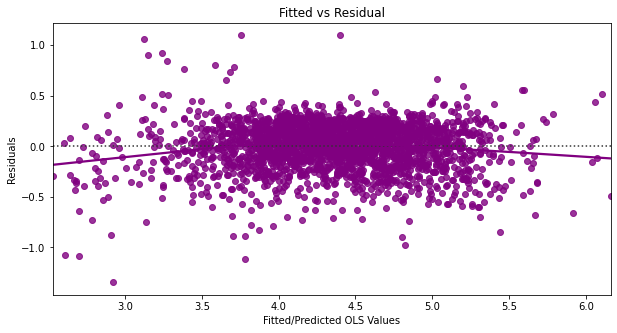

In [197]:
sns.residplot(
    data=df_pred,x='Fitted_Values',y='Residuals',color='purple',lowess=True
)
plt.xlabel('Fitted/Predicted OLS Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual')
plt.gcf().set_size_inches(10,5)

### This one is a tough call, but if the lowess is removed, the scatterplot does not seem to follow any particular patterns.

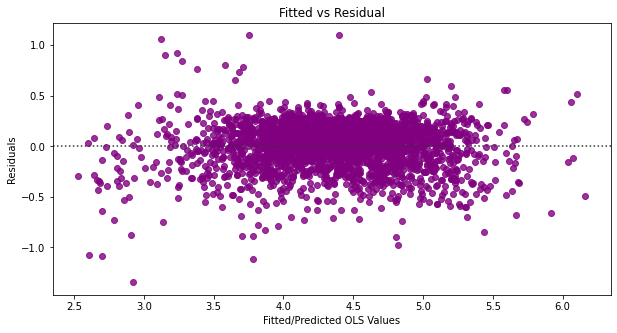

In [198]:
sns.residplot(
    data=df_pred,x='Fitted_Values',y='Residuals',color='purple',lowess=False
)
plt.xlabel('Fitted/Predicted OLS Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual')
plt.gcf().set_size_inches(10,5)

## I'm calling this one random. This passes the test for independence and Linearity.
---
## Test for Normality
    I personally prefer the Q-Q plot.

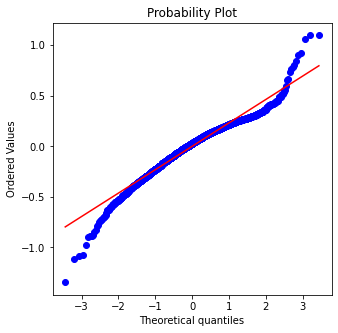

In [199]:
stats.probplot(df_pred['Residuals'],dist='norm',plot=pylab)
plt.gcf().set_size_inches(5,5)


### This one is a little more shaky. Let's take a look at the pairplot.

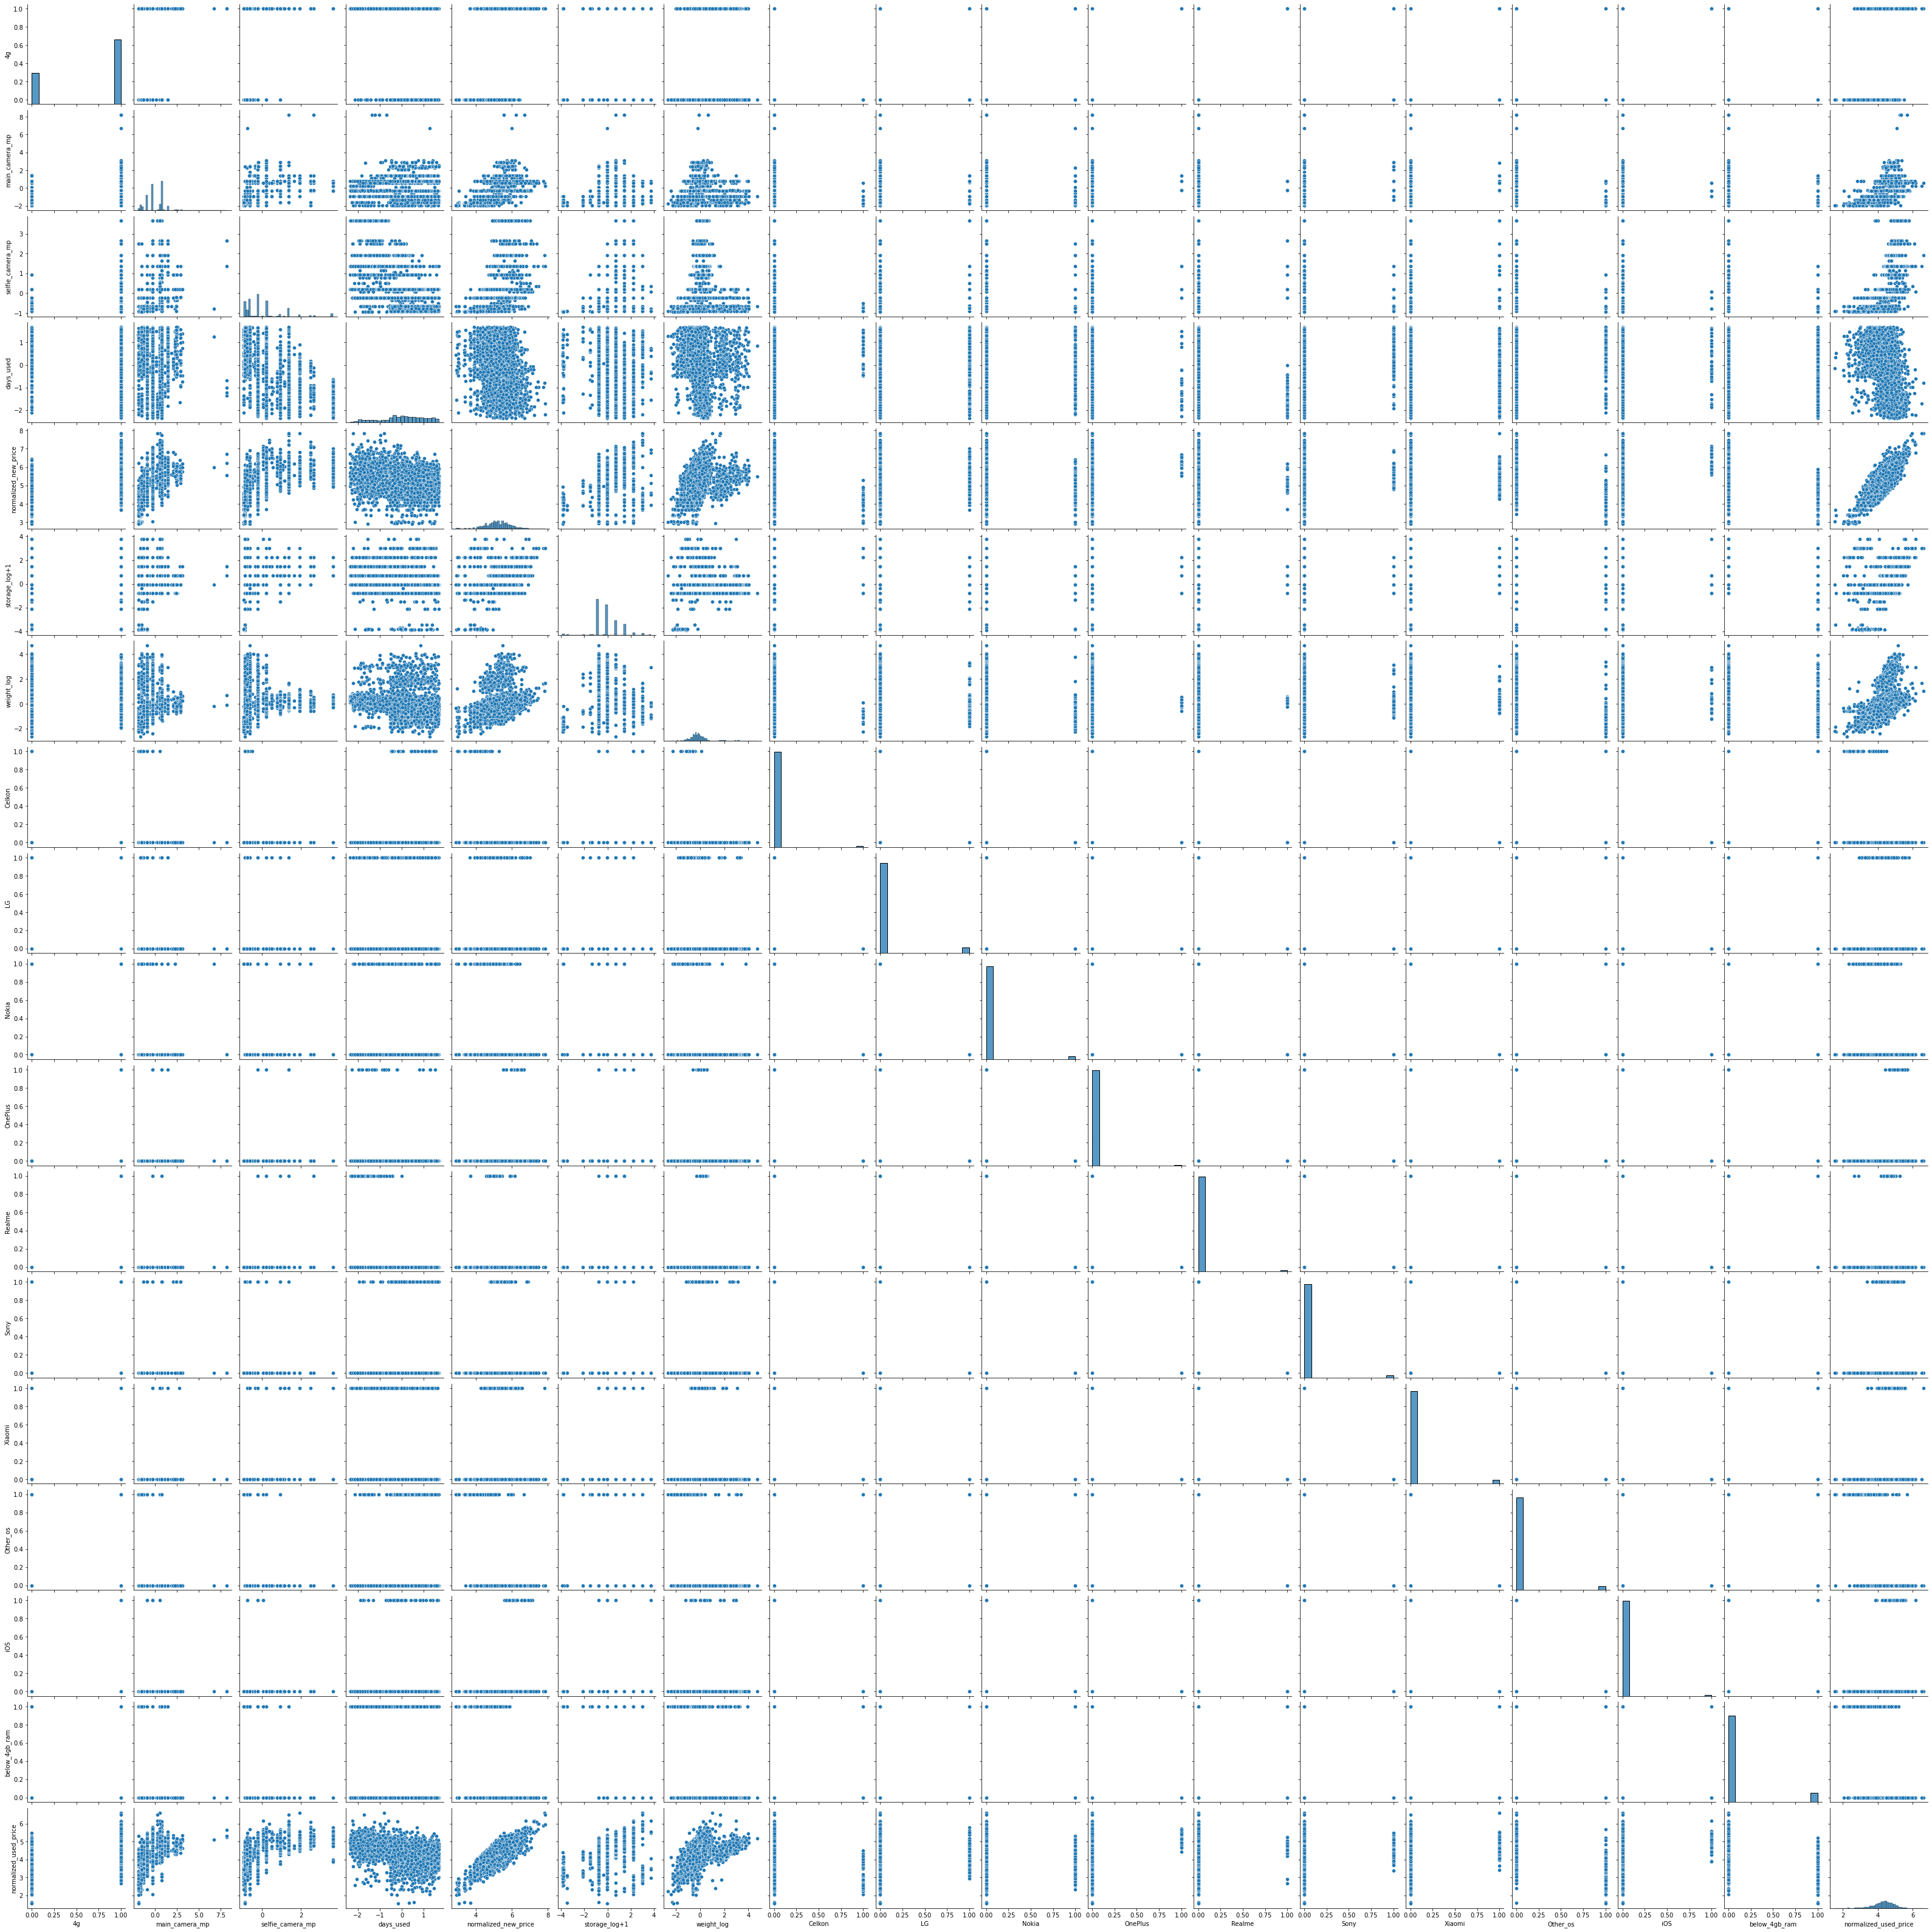

In [200]:
sns.pairplot(cell[list(X_train33.drop(['const'],axis=1).columns)+['normalized_used_price']]);

## There are a few possible variables causing the issues. Let's try squaring selfie cam mp first.

In [201]:
X_train34=X_train33.copy()

X_train34['selfie_camera_mp_sq']=np.square(X_train34['selfie_camera_mp'])
olsmod_34=sm.OLS(y_train,X_train34)
olsres_34=olsmod_34.fit()
print(f"R Squared: {olsres_34.rsquared}")
print(f"Adj R Squared: {olsres_34.rsquared_adj}\n")

df_pred=pd.DataFrame()

df_pred['Actual_Values']=y_train.values.flatten() #actual values
df_pred['Fitted_Values']=olsres_34.fittedvalues.values #predicted OLS values
df_pred['Residuals']=olsres_34.resid.values #residuals

df_pred.head()

R Squared: 0.842390905462462
Adj R Squared: 0.8412043878122422



Actual_Values  Fitted_Values  Residuals
0        3.04357        3.27279   -0.22922
1        3.91582        4.15034   -0.23453
2        4.48706        4.75674   -0.26968
3        4.23178        4.28444   -0.05266
4        3.96632        4.05575   -0.08943

## Quick check to make sure we didn't mess up our independence/linearity.

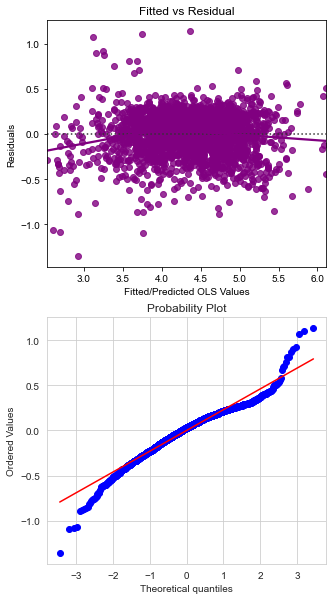

In [202]:
fig=plt.figure()

fig.add_subplot(2,1,1)
sns.set_style('whitegrid')
sns.residplot(
    data=df_pred,x='Fitted_Values',y='Residuals',color='purple',lowess=True
)
plt.xlabel('Fitted/Predicted OLS Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual')


fig.add_subplot(2,1,2)
stats.probplot(df_pred['Residuals'],dist='norm',plot=pylab)

plt.gcf().set_size_inches(5,10)

## Let's square main camera MP next.

R Squared: 0.8445880698067301
Adj R Squared: 0.8433525774746496



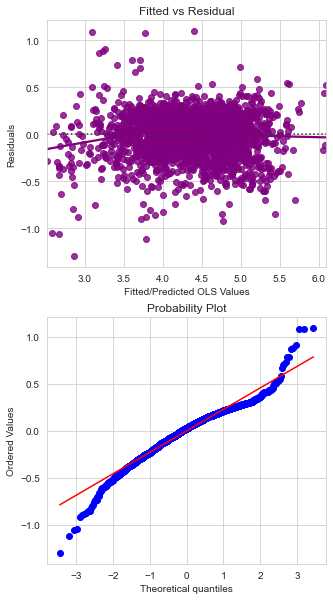

In [203]:
X_train35=X_train34.copy()

X_train35['main_camera_mp_sq']=np.square(X_train35['main_camera_mp'])
olsmod_35=sm.OLS(y_train,X_train35)
olsres_35=olsmod_35.fit()
print(f"R Squared: {olsres_35.rsquared}")
print(f"Adj R Squared: {olsres_35.rsquared_adj}\n")

df_pred=pd.DataFrame()

df_pred['Actual_Values']=y_train.values.flatten() #actual values
df_pred['Fitted_Values']=olsres_35.fittedvalues.values #predicted OLS values
df_pred['Residuals']=olsres_35.resid.values #residuals

fig=plt.figure()

fig.add_subplot(2,1,1)
sns.set_style('whitegrid')
sns.residplot(
    data=df_pred,x='Fitted_Values',y='Residuals',color='purple',lowess=True
)
plt.xlabel('Fitted/Predicted OLS Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual')


fig.add_subplot(2,1,2)
stats.probplot(df_pred['Residuals'],dist='norm',plot=pylab)

plt.gcf().set_size_inches(5,10)

## Storage log next:

R Squared: 0.8453861349557502
Adj R Squared: 0.8440917534987034



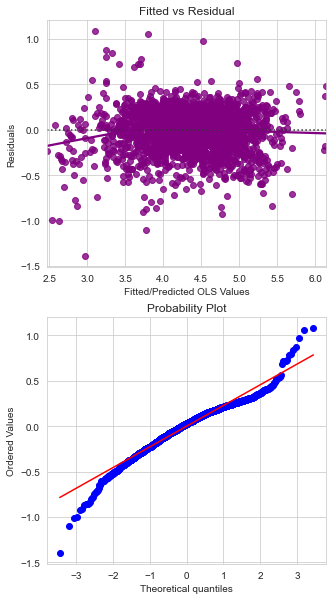

In [204]:
X_train36=X_train35.copy()

X_train36['storage_log+1_sq']=np.square(X_train36['storage_log+1'])
olsmod_36=sm.OLS(y_train,X_train36)
olsres_36=olsmod_36.fit()
print(f"R Squared: {olsres_36.rsquared}")
print(f"Adj R Squared: {olsres_36.rsquared_adj}\n")

df_pred=pd.DataFrame()

df_pred['Actual_Values']=y_train.values.flatten() #actual values
df_pred['Fitted_Values']=olsres_36.fittedvalues.values #predicted OLS values
df_pred['Residuals']=olsres_36.resid.values #residuals

fig=plt.figure()

fig.add_subplot(2,1,1)
sns.set_style('whitegrid')
sns.residplot(
    data=df_pred,x='Fitted_Values',y='Residuals',color='purple',lowess=True
)
plt.xlabel('Fitted/Predicted OLS Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual')


fig.add_subplot(2,1,2)
stats.probplot(df_pred['Residuals'],dist='norm',plot=pylab)

plt.gcf().set_size_inches(5,10)

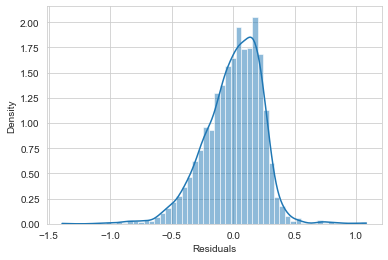

In [205]:
sns.histplot(data=df_pred,x="Residuals",kde='True',stat='density');

## This is getting me nowhere! I'm going to restart and try to manipulate a different variable.

R Squared: 0.8445833467971295
Adj R Squared: 0.8434133343514367



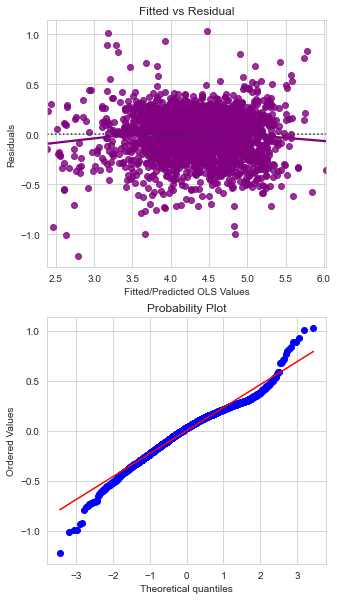

In [206]:
X_train33=X_train32.drop(['Infinix'],axis=1)
olsmod_33=sm.OLS(y_train,X_train33)
olsres_33=olsmod_33.fit()

df_pred=pd.DataFrame()

df_pred['Actual_Values']=y_train.values.flatten() #actual values
df_pred['Fitted_Values']=olsres_33.fittedvalues.values #predicted OLS values
df_pred['Residuals']=olsres_33.resid.values #residuals

X_train37=X_train33.copy()

X_train37['normalized_new_price_sq']=np.square(X_train37['normalized_new_price'])
olsmod_37=sm.OLS(y_train,X_train37)
olsres_37=olsmod_37.fit()
print(f"R Squared: {olsres_37.rsquared}")
print(f"Adj R Squared: {olsres_37.rsquared_adj}\n")

df_pred=pd.DataFrame()

df_pred['Actual_Values']=y_train.values.flatten() #actual values
df_pred['Fitted_Values']=olsres_37.fittedvalues.values #predicted OLS values
df_pred['Residuals']=olsres_37.resid.values #residuals

fig=plt.figure()

fig.add_subplot(2,1,1)
sns.set_style('whitegrid')
sns.residplot(
    data=df_pred,x='Fitted_Values',y='Residuals',color='purple',lowess=True
)
plt.xlabel('Fitted/Predicted OLS Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual')


fig.add_subplot(2,1,2)
stats.probplot(df_pred['Residuals'],dist='norm',plot=pylab)

plt.gcf().set_size_inches(5,10)

## That looks a little better. Let's try to manipulate this a little more.

R Squared: 0.8426292217538106
Adj R Squared: 0.8414444982036511



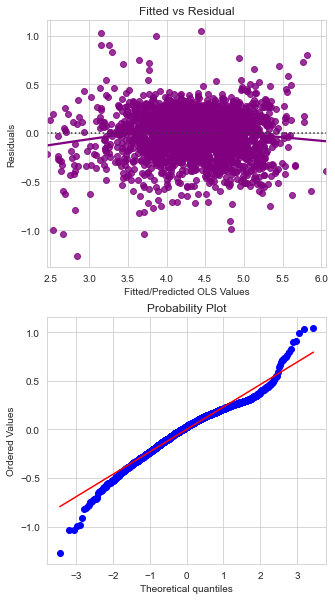

In [207]:
X_train38=X_train33.copy()

X_train38['normalized_new_price_sq_sq']=np.square(np.square(X_train38['normalized_new_price']))
olsmod_38=sm.OLS(y_train,X_train38)
olsres_38=olsmod_38.fit()
print(f"R Squared: {olsres_38.rsquared}")
print(f"Adj R Squared: {olsres_38.rsquared_adj}\n")

df_pred=pd.DataFrame()

df_pred['Actual_Values']=y_train.values.flatten() #actual values
df_pred['Fitted_Values']=olsres_38.fittedvalues.values #predicted OLS values
df_pred['Residuals']=olsres_38.resid.values #residuals

fig=plt.figure()

fig.add_subplot(2,1,1)
sns.set_style('whitegrid')
sns.residplot(
    data=df_pred,x='Fitted_Values',y='Residuals',color='purple',lowess=True
)
plt.xlabel('Fitted/Predicted OLS Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual')


fig.add_subplot(2,1,2)
stats.probplot(df_pred['Residuals'],dist='norm',plot=pylab)

plt.gcf().set_size_inches(5,10)

## With my limited knowledge on variable transformation, this is probably as good as it's getting.
    I took out most of my attempts with np.exp, np.arcsinh, and np.arctan because they only made it worse
---
## goldfeldquandt for Homoscedasticity

In [208]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name=['F statistic','p-value']
test=sms.het_goldfeldquandt(df_pred["Residuals"],X_train38)
lzip(name,test)

[('F statistic', 0.977244391882071), ('p-value', 0.6540477718012714)]

## This 0.65 pvalue is far above the 5% level of significance, so we fail to reject the null hypothesis. Our residuals are Homoscedastic.

## Finally, Multicollinearity was already proven when we removed all of the high VIF variables.

## Model performance evaluation
    Print out the full linear equation, then repeat the drops and adds on X_test.

In [209]:
Equation = "Used Device Prices="  
print(Equation, end=" ")  
for i in range (len (X_train38.columns)):  
        if i == 0:  
            print(olsres_38.params[i], "+", end=" ")  
        elif i != len(X_train38.columns) - 1:  
            print(  
                olsres_38.params [i],  
                "* (",  
                X_train38.columns[i],  
                ")",
                "+",
                end=" ",
             )
        else:
            print(olsres_38.params[i], "* (", X_train38.columns[i], ")")

Used Device Prices= 1.5404568705240251 + 0.07064818267587204 * ( 4g ) + 0.09285676642919105 * ( main_camera_mp ) + 0.10826041708568981 * ( selfie_camera_mp ) + -0.026877558698905284 * ( days_used ) + 0.5699892873527242 * ( normalized_new_price ) + 0.0339958618236719 * ( storage_log+1 ) + 0.15733290517434967 * ( weight_log ) + -0.23316563333099752 * ( Celkon ) + -0.04778262986271356 * ( LG ) + 0.10152776726295312 * ( Nokia ) + 0.16788696383502377 * ( OnePlus ) + 0.09817164020114777 * ( Realme ) + -0.06200942334192483 * ( Sony ) + 0.08563479040431388 * ( Xiaomi ) + -0.04114704850359807 * ( Other_os ) + -0.0735029583617367 * ( iOS ) + -0.056102942712168466 * ( below_4gb_ram ) + -0.0002354481598096131 * ( normalized_new_price_sq_sq )


In [210]:
X_test2=X_test.drop(
    ['Apple','Other_brand','screen_size','release_year','Vivo','Huawei','XOLO','Karbonn','above_4gb_ram','Micromax','ZTE','BlackBerry','Samsung','Lava','Meizu','Alcatel','battery','Motorola','Spice','Gionee','5g_and_4g','HTC','Google','Oppo','Lenovo','Coolpad','Honor','Asus','Windows','Microsoft','Panasonic','Infinix'],axis=1
)
X_test2['normalized_new_price_sq_sq']=np.square(np.square(X_test2['normalized_new_price']))
X_test2

const  4g  main_camera_mp  selfie_camera_mp  days_used  \
1016 1.00000   0         0.76847          -0.22319    1.42884   
321  1.00000   1        -0.27452           1.92968   -1.80600   
2741 1.00000   1         2.40747          -0.65377    1.52540   
3271 1.00000   1        -0.27452           1.35558   -0.55069   
102  1.00000   1        -0.27452           1.92968   -1.37951   
...      ...  ..             ...               ...        ...   
3435 1.00000   1         0.55562           0.20738   -0.57483   
2184 1.00000   1         0.76847          -0.22319    0.46322   
1448 1.00000   0        -0.29581          -0.22319    1.11904   
1244 1.00000   0        -0.29581          -0.71118    0.38275   
3327 1.00000   1        -0.27452           0.20738   -2.18017   

      normalized_new_price  storage_log+1  weight_log  Celkon  LG  Nokia  \
1016               6.08945       -0.04786    -0.27997       0   0      0   
321                6.04292        1.46299    -0.08777       0   0      0   
2741               5.77222       -0.78294    -0.63137       0   0      0   
3271               5.07442        0.70338     0.23083       0   0      0   
102                6.04066        1.46299    -0.08777       0   0      0   
...                    ...            ...         ...     ...  ..    ...   
3435               5.13574       -0.04786    -0.01775       0   0      0   
2184               5.67703       -0.78294    -0.56805       0   0      0   
1448               4.60866       -0.04786    -0.52659       0   0      0   
1244               5.19034       -0.78294    -0.94648       0   0      0   
3327               6.19878        1.46299     0.72648       0   0      0   

      OnePlus  Realme  Sony  Xiaomi  Other_os  iOS  below_4gb_ram  \
1016        0       0     0       0         0    0              0   
321         0       0     0       0         0    0              0   
2741        0       0     1       0         0    0              0   
3271        0       1     0       0         0    0              0   
102         0       0     0       0         0    0              0   
...       ...     ...   ...     ...       ...  ...            ...   
3435        0       0     0       0         0    0              1   
2184        0       0     0       0         0    0              0   
1448        0       0     0       0         0    0              0   
1244        0       0     0       0         0    0              0   
3327        0       0     0       0         0    0              0   

      normalized_new_price_sq_sq  
1016                  1375.03299  
321                   1333.48076  
2741                  1110.12374  
3271                   663.05087  
102                   1331.48842  
...                          ...  
3435                   695.68395  
2184                  1038.68549  
1448                   451.12845  
1244                   725.74493  
3327                  1476.47428  

[1033 rows x 19 columns]

## Create y_pred and define the model performance function

In [211]:
y_pred=olsres_38.predict(X_test2)

In [229]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target.iloc[:,0], pred)
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )
    
    return df_perf

## Try it on the train set:

In [230]:
model_performance_regression(olsres_38,X_train38,y_train)

RMSE     MAE  R-squared  Adj. R-squared    MAPE
0 0.23399 0.18170    0.84263         0.84138 4.38230

## Try it on the test set:

In [231]:
model_performance_regression(olsres_38,X_test2,y_test)

RMSE     MAE  R-squared  Adj. R-squared    MAPE
0 0.23582 0.18437    0.83346         0.83034 4.43541

## Overall, pretty close!

## Final Model Summary

Used Device Prices= 1.54 + 0.07 * ( 4g ) + 0.09 * ( main_camera_mp ) + 0.11 * ( selfie_camera_mp ) + -0.03 * ( days_used ) + 0.57 * ( normalized_new_price ) + 0.03 * ( storage_log+1 ) + 0.16 * ( weight_log ) + -0.23 * ( Celkon ) + -0.05 * ( LG ) + 0.10 * ( Nokia ) + 0.17 * ( OnePlus ) + 0.10 * ( Realme ) + -0.06 * ( Sony ) + 0.09 * ( Xiaomi ) + -0.04 * ( Other_os ) + -0.07 * ( iOS ) + -0.06 * ( below_4gb_ram ) + -0.0002 * ( normalized_new_price_sq_sq )

In [215]:
olsres_38.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     711.2
Date:                   Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                           17:19:08   Log-Likelihood:                 80.865
No. Observations:                   2410   AIC:                            -123.7
Df Residuals:                       2391   BIC:                            -13.77
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.5405      0.124     12.460      0.000       1.298       1.783
4g                             0.0706      0.014      5.181      0.000       0.044       0.097
main_camera_mp                 0.0929      0.006     14.493      0.000       0.080       0.105
selfie_camera_mp               0.1083      0.007     15.102      0.000       0.094       0.122
days_used                     -0.0269      0.006     -4.247      0.000      -0.039      -0.014
normalized_new_price           0.5700      0.030     19.021      0.000       0.511       0.629
storage_log+1                  0.0340      0.007      5.063      0.000       0.021       0.047
weight_log                     0.1573      0.006     27.492      0.000       0.146       0.169
Celkon                        -0.2332      0.054     -4.280      0.000      -0.340      -0.126
LG                            -0.0478      0.021     -2.315      0.021      -0.088      -0.007
Nokia                          0.1015      0.030      3.346      0.001       0.042       0.161
OnePlus                        0.1679      0.064      2.609      0.009       0.042       0.294
Realme                         0.0982      0.048      2.033      0.042       0.003       0.193
Sony                          -0.0620      0.031     -1.994      0.046      -0.123      -0.001
Xiaomi                         0.0856      0.025      3.433      0.001       0.037       0.135
Other_os                      -0.0411      0.030     -1.394      0.163      -0.099       0.017
iOS                           -0.0735      0.047     -1.577      0.115      -0.165       0.018
below_4gb_ram                 -0.0561      0.020     -2.865      0.004      -0.094      -0.018
normalized_new_price_sq_sq    -0.0002   4.37e-05     -5.394      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      168.326   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.705
Skew:                          -0.461   Prob(JB):                     1.15e-76
Kurtosis:                       4.622   Cond. No.                     2.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Actionable Insights and Recommendations

My first conclusion is the most obvious: The higher the retail value of a device, the higher it will sell on the used market! That's obvious, but it's also the strongest relationship of the data given to me to used phone prices.

My first recommendation would be to stay away from Celkon! They rank bottom on almost every phone and tablet metric, and seem to be by far the worst brand of the ones labeled. It underperformed the 'Unknown Brand' category by a long shot!

For less obvious helpful advice, OnePlus devices are the brand with the strongest positive impact on used device profit! Nokia is in second.

Selfie Cameras with higher fidelity sell higher than standard phone cameras, so always prioritize the selfie camera!

Possibly the strangest positive attribute was phone weight. As phone weight increases, so does the price! However, this could be because there are tablets mixed in with this data and tablets are always more expensive, so it's not a clear answer.

The most surprising negative attribute was iOS, apparently just having the operating system on the phone devalues it by a small percentage! However, I personally chock this up to the very small amount of Apple products in the data set, as well as over half of the Apple devices being tablets and likely running macOS.

While it technically does have a positive influence, storage is almost unrelated to the price of used phones and tablets. The only other attribute that influences it less is days_used, which has a tiny negative influence on the price.

I would recommend staying away from phone and tablet models with less than 4gb of RAM. They carry a slight negative influence.

I woud also recommend staying away from all phones that aren't 4G capable. 4G phones tend to be more expensive.

If I could recommend something for next time, please include either the name of the device in the data collected, or preferably even a binary indication whether or not the item is a phone or a tablet. Phones (especially in the foldable space) are becoming tablet sized, it's not easy to determine what device is what based solely on screen size! If I had that information solidly at hand, I could have divided the data into two separate sets and made conclusions about the devices separately. People look for different things in a phone than they do in a tablet.

---
### Figured out why MAPE wasn't working!

In [217]:
olsres_38.predict(X_train38)

103    3.19984
1392   4.18322
2662   4.73898
687    4.29285
1458   4.06665
         ...  
2774   3.48407
909    4.53071
1100   5.09494
235    5.09824
1065   4.16632
Length: 2410, dtype: float64

In [232]:
y_train

#just calling y_train gives a dataframe.

normalized_used_price
103                 3.04357
1392                3.91582
2662                4.48706
687                 4.23178
1458                3.96632
...                     ...
2774                3.54760
909                 4.47255
1100                4.69830
235                 5.18021
1065                4.36068

[2410 rows x 1 columns]

In [227]:
y_train.iloc[:,0]

#you need to .iloc the first column in order to actually get the values for the MAPE equation.

103    3.04357
1392   3.91582
2662   4.48706
687    4.23178
1458   3.96632
         ...  
2774   3.54760
909    4.47255
1100   4.69830
235    5.18021
1065   4.36068
Name: normalized_used_price, Length: 2410, dtype: float64

In [228]:
np.mean(np.abs(y_train.iloc[:,0] - olsres_38.predict(X_train38)) / y_train.iloc[:,0]) * 100

4.382295783203237